# SME Analysis

# BUNDLING AND UNBUNDLING ANALYSIS

In [1]:
#เรียกใช้ Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
transaction = pd.read_csv("/Users/frukkurt/Documents/Business analysis/project/Dashboard  รายงานยอดขายแยกตามรายละเอียดบิล (3).csv")


In [434]:
transaction

,วันที่ชำระเงิน,เวลาที่ชำระเงิน,หมายเลขใบเสร็จ / ID,INV. No,รหัสถาดเก็บเงิน,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,...,ราคาสุทธิ,ประเภทภาษีของรายการ,โต๊ะ,ชื่อลูกค้า,เบอร์โทรศัพท์,ประเภทการชำระเงิน,หมายเหตุ,กลุ่ม,หมวดสินค้า,สาขา
0,03/02/2020,11:19,SFDVJ,NaN,UYF,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45,45.00,...,45.00,VATable,N1,NaN,NaN,Cash,NaN,NaN,Take away,NaN
1,03/02/2020,11:19,SFDVJ,NaN,UYF,(TA)บิงซูโอริโอ้,Dine-In,1,45,45.00,...,45.00,VATable,N1,NaN,NaN,Cash,NaN,NaN,Take away,NaN
2,03/02/2020,14:11,CIOB4,NaN,UYF,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45,45.00,...,45.00,VATable,N2,NaN,NaN,Cash,NaN,NaN,Take away,NaN
3,03/02/2020,14:53,WBSMD,NaN,UYF,บิงซูสตอเบอรี่,Dine-In,1,109,109.00,...,109.00,VATable,N3,NaN,NaN,Cash,NaN,NaN,ถ้วยใหญ่,NaN
4,03/02/2020,16:07,1EI74,NaN,UYF,ชานมไต้หวัน,Dine-In,1,30,30.00,...,25,VATable,N4,NaN,NaN,Cash,Discount per item by Amount5.00 per unit * 55555,NaN,ชา,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,30/09/2020,15:52,AXEJV,NaN,5WG,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,...,35.00,VATable,N15,NaN,NaN,Cash,NaN,NaN,ชา,NaN
1709,30/09/2020,16:43,KES4R,NaN,5WG,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,...,35.00,VATable,N16,NaN,NaN,Cash,NaN,NaN,ชา,NaN
1710,30/09/2020,16:44,FQCFH,NaN,5WG,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,...,35.00,VATable,N17,NaN,NaN,Cash,NaN,NaN,ชา,NaN
1711,30/09/2020,19:42,GCXDK,NaN,5WG,โกโก้,Dine-In,1,45,45.00,...,45.00,VATable,N14,NaN,NaN,Cash,NaN,NaN,ชา,NaN


In [435]:
transaction.dtypes


วันที่ชำระเงิน          object
เวลาที่ชำระเงิน         object
หมายเลขใบเสร็จ / ID     object
INV. No                float64
รหัสถาดเก็บเงิน         object
ชื่อเมนู                object
ประเภทการสั่ง           object
จำนวน                   object
ราคาต่อหน่วย            object
ยอดก่อนลด               object
ส่วนลดทั้งหมด           object
ส่วนลดทั้งหมด %         object
ราคาสุทธิ               object
ประเภทภาษีของรายการ     object
โต๊ะ                    object
ชื่อลูกค้า             float64
เบอร์โทรศัพท์          float64
ประเภทการชำระเงิน       object
หมายเหตุ                object
กลุ่ม                  float64
หมวดสินค้า              object
สาขา                   float64
dtype: object

# Clean Data

In [436]:
#ลบแถวสุดท้าย ออก เพราะเป็นยอดรวม
transaction = transaction.drop(transaction.index[-1])

#หาNaN
transaction.isna().sum()

วันที่ชำระเงิน            0
เวลาที่ชำระเงิน           0
หมายเลขใบเสร็จ / ID       0
INV. No                1712
รหัสถาดเก็บเงิน           0
ชื่อเมนู                  0
ประเภทการสั่ง             0
จำนวน                     0
ราคาต่อหน่วย              0
ยอดก่อนลด                 0
ส่วนลดทั้งหมด             0
ส่วนลดทั้งหมด %           0
ราคาสุทธิ                 0
ประเภทภาษีของรายการ       0
โต๊ะ                      0
ชื่อลูกค้า             1712
เบอร์โทรศัพท์          1712
ประเภทการชำระเงิน         0
หมายเหตุ               1210
กลุ่ม                  1712
หมวดสินค้า                2
สาขา                   1712
dtype: int64

In [437]:
#ลบ INV. No , ชื่อลูกค้า , เบอร์โทรศัพท์ ,กลุ่ม,สาขา ออก
#เติม หมายเหตุที่ว่างด้วย - 
transaction = transaction.drop(columns=['INV. No', 'ชื่อลูกค้า','เบอร์โทรศัพท์','กลุ่ม','สาขา'])
transaction = transaction.fillna('-')
print(transaction.isna().sum())
print(transaction)

วันที่ชำระเงิน         0
เวลาที่ชำระเงิน        0
หมายเลขใบเสร็จ / ID    0
รหัสถาดเก็บเงิน        0
ชื่อเมนู               0
ประเภทการสั่ง          0
จำนวน                  0
ราคาต่อหน่วย           0
ยอดก่อนลด              0
ส่วนลดทั้งหมด          0
ส่วนลดทั้งหมด %        0
ราคาสุทธิ              0
ประเภทภาษีของรายการ    0
โต๊ะ                   0
ประเภทการชำระเงิน      0
หมายเหตุ               0
หมวดสินค้า             0
dtype: int64
     วันที่ชำระเงิน เวลาที่ชำระเงิน หมายเลขใบเสร็จ / ID รหัสถาดเก็บเงิน  \
0        03/02/2020           11:19               SFDVJ             UYF   
1        03/02/2020           11:19               SFDVJ             UYF   
2        03/02/2020           14:11               CIOB4             UYF   
3        03/02/2020           14:53               WBSMD             UYF   
4        03/02/2020           16:07               1EI74             UYF   
...             ...             ...                 ...             ...   
1707     29/09/2020           17:58  

In [438]:
#ลบColumn ที่ไม่ใช้ออก
transaction = transaction.drop(columns=['รหัสถาดเก็บเงิน', 'ประเภทภาษีของรายการ','โต๊ะ'])
transaction


,วันที่ชำระเงิน,เวลาที่ชำระเงิน,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,หมายเหตุ,หมวดสินค้า
0,03/02/2020,11:19,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45,45.00,0,0,45.00,Cash,-,Take away
1,03/02/2020,11:19,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45,45.00,0,0,45.00,Cash,-,Take away
2,03/02/2020,14:11,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45,45.00,0,0,45.00,Cash,-,Take away
3,03/02/2020,14:53,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109,109.00,0,0,109.00,Cash,-,ถ้วยใหญ่
4,03/02/2020,16:07,1EI74,ชานมไต้หวัน,Dine-In,1,30,30.00,5.00,16.67%,25,Cash,Discount per item by Amount5.00 per unit * 55555,ชา
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,29/09/2020,17:58,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา
1708,30/09/2020,15:52,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา
1709,30/09/2020,16:43,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา
1710,30/09/2020,16:44,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา


# Transform Data

In [439]:
#แยกวันเดือนปีออกจากกัน
new = transaction["วันที่ชำระเงิน"].str.split("/", n = 2, expand = True)
new
transaction["Day"]= new[0] 
transaction["Month"]= new[1] 
transaction["Year"]= new[2] 
 
transaction.drop(columns =["วันที่ชำระเงิน"], inplace = True) 
transaction

,เวลาที่ชำระเงิน,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,หมายเหตุ,หมวดสินค้า,Day,Month,Year
0,11:19,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45,45.00,0,0,45.00,Cash,-,Take away,03,02,2020
1,11:19,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45,45.00,0,0,45.00,Cash,-,Take away,03,02,2020
2,14:11,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45,45.00,0,0,45.00,Cash,-,Take away,03,02,2020
3,14:53,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109,109.00,0,0,109.00,Cash,-,ถ้วยใหญ่,03,02,2020
4,16:07,1EI74,ชานมไต้หวัน,Dine-In,1,30,30.00,5.00,16.67%,25,Cash,Discount per item by Amount5.00 per unit * 55555,ชา,03,02,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,17:58,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา,29,09,2020
1708,15:52,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา,30,09,2020
1709,16:43,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา,30,09,2020
1710,16:44,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา,30,09,2020


In [440]:
#จัด Column ใหม่
transaction = transaction[['หมายเลขใบเสร็จ / ID', 'ชื่อเมนู', 'ประเภทการสั่ง',
       'จำนวน', 'ราคาต่อหน่วย', 'ยอดก่อนลด', 'ส่วนลดทั้งหมด',
       'ส่วนลดทั้งหมด %', 'ราคาสุทธิ', 'ประเภทการชำระเงิน', 'หมายเหตุ',
       'หมวดสินค้า', 'Day', 'Month', 'Year','เวลาที่ชำระเงิน']]
transaction

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,หมายเหตุ,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน
0,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45,45.00,0,0,45.00,Cash,-,Take away,03,02,2020,11:19
1,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45,45.00,0,0,45.00,Cash,-,Take away,03,02,2020,11:19
2,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45,45.00,0,0,45.00,Cash,-,Take away,03,02,2020,14:11
3,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109,109.00,0,0,109.00,Cash,-,ถ้วยใหญ่,03,02,2020,14:53
4,1EI74,ชานมไต้หวัน,Dine-In,1,30,30.00,5.00,16.67%,25,Cash,Discount per item by Amount5.00 per unit * 55555,ชา,03,02,2020,16:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา,29,09,2020,17:58
1708,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา,30,09,2020,15:52
1709,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา,30,09,2020,16:43
1710,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35,35.00,0,0,35.00,Cash,-,ชา,30,09,2020,16:44


In [441]:
#ตรวจสอบว่าแต่ feature เป็น ข้อมูลประเภทไหน
transaction.dtypes

หมายเลขใบเสร็จ / ID    object
ชื่อเมนู               object
ประเภทการสั่ง          object
จำนวน                  object
ราคาต่อหน่วย           object
ยอดก่อนลด              object
ส่วนลดทั้งหมด          object
ส่วนลดทั้งหมด %        object
ราคาสุทธิ              object
ประเภทการชำระเงิน      object
หมายเหตุ               object
หมวดสินค้า             object
Day                    object
Month                  object
Year                   object
เวลาที่ชำระเงิน        object
dtype: object

In [442]:
#เปลี่ยนค่าต่างๆ จาก string เป็นตัวเลข
transaction["จำนวน"] = transaction["จำนวน"].astype(int)
transaction["ราคาต่อหน่วย"] = transaction["ราคาต่อหน่วย"].astype(float)
transaction["ยอดก่อนลด"] = transaction["ยอดก่อนลด"].astype(float)
transaction["ส่วนลดทั้งหมด"] = transaction["ส่วนลดทั้งหมด"].astype(float)
transaction["ราคาสุทธิ"] = transaction["ราคาสุทธิ"].astype(float)
transaction["Day"] = transaction["Day"].astype(int)
transaction["Month"] = transaction["Month"].astype(int)
transaction["Year"] = transaction["Year"].astype(int)
transaction

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,หมายเหตุ,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน
0,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0,45.0,Cash,-,Take away,3,2,2020,11:19
1,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45.0,45.0,0.0,0,45.0,Cash,-,Take away,3,2,2020,11:19
2,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0,45.0,Cash,-,Take away,3,2,2020,14:11
3,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109.0,109.0,0.0,0,109.0,Cash,-,ถ้วยใหญ่,3,2,2020,14:53
4,1EI74,ชานมไต้หวัน,Dine-In,1,30.0,30.0,5.0,16.67%,25.0,Cash,Discount per item by Amount5.00 per unit * 55555,ชา,3,2,2020,16:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0,35.0,Cash,-,ชา,29,9,2020,17:58
1708,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0,35.0,Cash,-,ชา,30,9,2020,15:52
1709,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0,35.0,Cash,-,ชา,30,9,2020,16:43
1710,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0,35.0,Cash,-,ชา,30,9,2020,16:44


In [443]:
#ใน Feature ส่วนลดทั้งหมด% และ เวลายัง เปลี่ยนไม่ได้
##เนื่องจาก ส่วนลดทั้งหมด% นั้นมี % อยู่ ต้องตัดออกไป
### และ เวลาต้องใช้เป็น Datetime format
transaction.dtypes

หมายเลขใบเสร็จ / ID     object
ชื่อเมนู                object
ประเภทการสั่ง           object
จำนวน                    int64
ราคาต่อหน่วย           float64
ยอดก่อนลด              float64
ส่วนลดทั้งหมด          float64
ส่วนลดทั้งหมด %         object
ราคาสุทธิ              float64
ประเภทการชำระเงิน       object
หมายเหตุ                object
หมวดสินค้า              object
Day                      int64
Month                    int64
Year                     int64
เวลาที่ชำระเงิน         object
dtype: object

In [444]:
#แปลง ส่วนลดทั้งหมด% เป็น float
new= transaction["ส่วนลดทั้งหมด %"].str.split("%", n = 1, expand = True) 
transaction["ส่วนลดทั้งหมด %"] = new.iloc[:,0].astype(float)
transaction.head(50)

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,หมายเหตุ,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน
0,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,11:19
1,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,11:19
2,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,14:11
3,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109.0,109.0,0.0,0.00,109.0,Cash,-,ถ้วยใหญ่,3,2,2020,14:53
4,1EI74,ชานมไต้หวัน,Dine-In,1,30.0,30.0,5.0,16.67,25.0,Cash,Discount per item by Amount5.00 per unit * 55555,ชา,3,2,2020,16:07
5,93QL7,(TA)บิงซูโอริโอ้,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,19:08
6,WBZLQ,(TA)บิงซูนมสด,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,Take away,3,2,2020,19:16
7,WBZLQ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,19:16
8,WBZLQ,(TA)บิงซูซอสมะม่วง,Dine-In,1,50.0,50.0,0.0,0.00,50.0,Cash,-,Take away,3,2,2020,19:16
9,ONSLL,(TA)บิงซูโอวันตินภูเขาไฟ,Dine-In,1,39.0,39.0,0.0,0.00,39.0,Cash,-,Take away,3,2,2020,19:17


In [445]:
#ในส่วนนี้ขอแยกเอาแค่เวลาออกมาก่อน
DFN = pd.to_datetime(transaction["เวลาที่ชำระเงิน"])
DFN = [time.time() for time in DFN]
DFN=pd.DataFrame(DFN)
DFN

,0
0,11:19:00
1,11:19:00
2,14:11:00
3,14:53:00
4,16:07:00
...,...
1707,17:58:00
1708,15:52:00
1709,16:43:00
1710,16:44:00


In [446]:
#ยัด เวลาเข้าไปใน trnasaction
transaction["เวลาที่ชำระเงิน"]=DFN
print(transaction.dtypes)
print(transaction)

หมายเลขใบเสร็จ / ID     object
ชื่อเมนู                object
ประเภทการสั่ง           object
จำนวน                    int64
ราคาต่อหน่วย           float64
ยอดก่อนลด              float64
ส่วนลดทั้งหมด          float64
ส่วนลดทั้งหมด %        float64
ราคาสุทธิ              float64
ประเภทการชำระเงิน       object
หมายเหตุ                object
หมวดสินค้า              object
Day                      int64
Month                    int64
Year                     int64
เวลาที่ชำระเงิน         object
dtype: object
     หมายเลขใบเสร็จ / ID               ชื่อเมนู ประเภทการสั่ง  จำนวน  \
0                  SFDVJ  (TA)บิงซูซอสสตอเบอรี่       Dine-In      1   
1                  SFDVJ       (TA)บิงซูโอริโอ้       Dine-In      1   
2                  CIOB4  (TA)บิงซูซอสสตอเบอรี่       Dine-In      1   
3                  WBSMD         บิงซูสตอเบอรี่       Dine-In      1   
4                  1EI74            ชานมไต้หวัน       Dine-In      1   
...                  ...                    ...           

In [447]:
#แยก ชั่วโมง และ นาที ออกมา เป็นอีก Column
hr=[]
mi=[]
for i in range (len(transaction)):
    hr.append(transaction["เวลาที่ชำระเงิน"][i].hour)
    mi.append(transaction["เวลาที่ชำระเงิน"][i].minute)
transaction["Hour"]=hr
transaction["Minute"]=mi
transaction

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,หมายเหตุ,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน,Hour,Minute
0,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,11:19:00,11,19
1,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,11:19:00,11,19
2,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,14:11:00,14,11
3,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109.0,109.0,0.0,0.00,109.0,Cash,-,ถ้วยใหญ่,3,2,2020,14:53:00,14,53
4,1EI74,ชานมไต้หวัน,Dine-In,1,30.0,30.0,5.0,16.67,25.0,Cash,Discount per item by Amount5.00 per unit * 55555,ชา,3,2,2020,16:07:00,16,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,29,9,2020,17:58:00,17,58
1708,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,15:52:00,15,52
1709,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,16:43:00,16,43
1710,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,16:44:00,16,44


In [448]:
#บอกว่าวันที่เท่าเท่าไหร่คือวันไหนในสัปดาห์
Numm=[]
WeekDay = ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"]
import calendar  

for i in range(len(transaction)):
    yy=transaction["Year"][i]
    mm=transaction["Month"][i]
    dd=transaction["Day"][i]
    dayy=calendar.weekday(yy,mm,dd)
    Numm.append(WeekDay[dayy])
Numm=pd.DataFrame(Numm)
transaction["WeekDay"]=Numm
transaction

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,หมายเหตุ,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน,Hour,Minute,WeekDay
0,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,11:19:00,11,19,monday
1,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,11:19:00,11,19,monday
2,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,14:11:00,14,11,monday
3,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109.0,109.0,0.0,0.00,109.0,Cash,-,ถ้วยใหญ่,3,2,2020,14:53:00,14,53,monday
4,1EI74,ชานมไต้หวัน,Dine-In,1,30.0,30.0,5.0,16.67,25.0,Cash,Discount per item by Amount5.00 per unit * 55555,ชา,3,2,2020,16:07:00,16,7,monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,29,9,2020,17:58:00,17,58,tuesday
1708,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,15:52:00,15,52,wednesday
1709,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,16:43:00,16,43,wednesday
1710,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,16:44:00,16,44,wednesday


In [449]:
transaction.dtypes

หมายเลขใบเสร็จ / ID     object
ชื่อเมนู                object
ประเภทการสั่ง           object
จำนวน                    int64
ราคาต่อหน่วย           float64
ยอดก่อนลด              float64
ส่วนลดทั้งหมด          float64
ส่วนลดทั้งหมด %        float64
ราคาสุทธิ              float64
ประเภทการชำระเงิน       object
หมายเหตุ                object
หมวดสินค้า              object
Day                      int64
Month                    int64
Year                     int64
เวลาที่ชำระเงิน         object
Hour                     int64
Minute                   int64
WeekDay                 object
dtype: object

In [450]:
transaction.loc[transaction['ราคาสุทธิ'] == 0]


,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,หมายเหตุ,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน,Hour,Minute,WeekDay
127,IF9AR,สายไหมช็อกโกแลต,Dine-In,1,139.0,139.0,0.0,0.0,0.0,Void All,Void*กดผิดวลัยพร ภักดี,สายไหม,12,2,2020,11:35:00,11,35,wednesday


In [451]:
transaction.iloc[127,0]

'IF9AR'

In [452]:
transaction.drop(index=127, inplace=True)

In [453]:
transaction.iloc[127,0]

'E76G5'

In [454]:
transaction.describe()

,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,Day,Month,Year,Hour,Minute
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.0,1711.000000,1711.000000
mean,1.069550,50.931034,53.182934,1.973290,3.949825,51.209643,15.474576,5.591467,2020.0,15.271186,28.639392
std,0.272227,33.709317,34.281973,3.633967,6.919836,33.723808,8.086110,2.774301,0.0,2.356051,17.292707
min,1.000000,5.000000,5.000000,0.000000,0.000000,5.000000,1.000000,2.000000,2020.0,9.000000,0.000000
25%,1.000000,35.000000,35.000000,0.000000,0.000000,35.000000,9.000000,3.000000,2020.0,13.000000,13.000000
50%,1.000000,45.000000,45.000000,0.000000,0.000000,45.000000,15.000000,7.000000,2020.0,15.000000,28.000000
75%,1.000000,50.000000,59.000000,3.900000,10.000000,50.000000,22.000000,8.000000,2020.0,17.000000,44.000000
max,3.000000,159.000000,159.000000,20.000000,33.330000,159.000000,31.000000,9.000000,2020.0,20.000000,59.000000


In [455]:
transaction

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,หมายเหตุ,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน,Hour,Minute,WeekDay
0,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,11:19:00,11,19,monday
1,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,11:19:00,11,19,monday
2,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,14:11:00,14,11,monday
3,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109.0,109.0,0.0,0.00,109.0,Cash,-,ถ้วยใหญ่,3,2,2020,14:53:00,14,53,monday
4,1EI74,ชานมไต้หวัน,Dine-In,1,30.0,30.0,5.0,16.67,25.0,Cash,Discount per item by Amount5.00 per unit * 55555,ชา,3,2,2020,16:07:00,16,7,monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,29,9,2020,17:58:00,17,58,tuesday
1708,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,15:52:00,15,52,wednesday
1709,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,16:43:00,16,43,wednesday
1710,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,16:44:00,16,44,wednesday


In [456]:
#เปลี่ยนไข่มุกเป็น topping
bubble=transaction.index[transaction['ชื่อเมนู'] == "ไข่มุก"].tolist()
transaction.at[bubble,"หมวดสินค้า"]='topping'


In [457]:
transaction.loc[transaction['ชื่อเมนู'] == "ไข่มุก"]["หมวดสินค้า"]

22      topping
26      topping
43      topping
45      topping
48      topping
         ...   
1346    topping
1361    topping
1369    topping
1373    topping
1509    topping
Name: หมวดสินค้า, Length: 119, dtype: object

In [458]:
#เปลี่ยนdกล้วยมุกเป็น topping
banana=transaction.index[transaction['ชื่อเมนู'] == "กล้วย"].tolist()
transaction.at[banana,"หมวดสินค้า"]='topping'

In [459]:
transaction.loc[transaction['ชื่อเมนู'] == "กล้วย"]["หมวดสินค้า"]

612    topping
Name: หมวดสินค้า, dtype: object

In [460]:
#เปลี่ยนน้ำเปล่าเป็น เครื่องดื่ม
water=transaction.index[transaction['ชื่อเมนู'] == "น้ำเปล่า"].tolist()
transaction.at[water,"หมวดสินค้า"]='เครื่องดื่ม'

In [461]:
transaction.loc[transaction['ชื่อเมนู'] == "น้ำเปล่า"]["หมวดสินค้า"]

38      เครื่องดื่ม
223     เครื่องดื่ม
332     เครื่องดื่ม
393     เครื่องดื่ม
399     เครื่องดื่ม
413     เครื่องดื่ม
430     เครื่องดื่ม
449     เครื่องดื่ม
464     เครื่องดื่ม
490     เครื่องดื่ม
539     เครื่องดื่ม
714     เครื่องดื่ม
781     เครื่องดื่ม
926     เครื่องดื่ม
927     เครื่องดื่ม
938     เครื่องดื่ม
946     เครื่องดื่ม
978     เครื่องดื่ม
1148    เครื่องดื่ม
1362    เครื่องดื่ม
1418    เครื่องดื่ม
1449    เครื่องดื่ม
1490    เครื่องดื่ม
1505    เครื่องดื่ม
1516    เครื่องดื่ม
1596    เครื่องดื่ม
1671    เครื่องดื่ม
Name: หมวดสินค้า, dtype: object

In [462]:
#เปลี่ยนโกโก้เปล่าเป็น เครื่องดื่ม
coco=transaction.index[transaction['ชื่อเมนู'] == "โกโก้"].tolist()
transaction.at[coco,"หมวดสินค้า"]='เครื่องดื่ม'
transaction.loc[transaction['ชื่อเมนู'] == "โกโก้"]["หมวดสินค้า"]

24      เครื่องดื่ม
55      เครื่องดื่ม
110     เครื่องดื่ม
120     เครื่องดื่ม
161     เครื่องดื่ม
369     เครื่องดื่ม
372     เครื่องดื่ม
397     เครื่องดื่ม
438     เครื่องดื่ม
602     เครื่องดื่ม
672     เครื่องดื่ม
698     เครื่องดื่ม
727     เครื่องดื่ม
799     เครื่องดื่ม
800     เครื่องดื่ม
827     เครื่องดื่ม
863     เครื่องดื่ม
930     เครื่องดื่ม
936     เครื่องดื่ม
956     เครื่องดื่ม
1075    เครื่องดื่ม
1171    เครื่องดื่ม
1180    เครื่องดื่ม
1248    เครื่องดื่ม
1289    เครื่องดื่ม
1359    เครื่องดื่ม
1404    เครื่องดื่ม
1438    เครื่องดื่ม
1694    เครื่องดื่ม
1711    เครื่องดื่ม
Name: หมวดสินค้า, dtype: object

In [463]:
#เปลี่ยนนมบราวชูก้าเปล่าเป็น เครื่องดื่ม
bsg=transaction.index[transaction['ชื่อเมนู'] == "นมบราวชูก้า"].tolist()
transaction.at[bsg,"หมวดสินค้า"]='เครื่องดื่ม'
transaction.loc[transaction['ชื่อเมนู'] == "นมบราวชูก้า"]["หมวดสินค้า"]

108     เครื่องดื่ม
121     เครื่องดื่ม
137     เครื่องดื่ม
152     เครื่องดื่ม
173     เครื่องดื่ม
228     เครื่องดื่ม
252     เครื่องดื่ม
277     เครื่องดื่ม
281     เครื่องดื่ม
298     เครื่องดื่ม
355     เครื่องดื่ม
376     เครื่องดื่ม
462     เครื่องดื่ม
488     เครื่องดื่ม
532     เครื่องดื่ม
552     เครื่องดื่ม
633     เครื่องดื่ม
783     เครื่องดื่ม
791     เครื่องดื่ม
888     เครื่องดื่ม
917     เครื่องดื่ม
958     เครื่องดื่ม
1010    เครื่องดื่ม
1029    เครื่องดื่ม
1033    เครื่องดื่ม
1144    เครื่องดื่ม
1159    เครื่องดื่ม
1276    เครื่องดื่ม
1412    เครื่องดื่ม
1414    เครื่องดื่ม
1690    เครื่องดื่ม
1700    เครื่องดื่ม
Name: หมวดสินค้า, dtype: object

In [464]:
#เปลี่ยนนมบราวชูก้าไข่มุก x 1เปล่าเป็น เครื่องดื่ม
bsg=transaction.index[transaction['ชื่อเมนู'] == "นมบราวชูก้าไข่มุก x 1"].tolist()
transaction.at[bsg,"หมวดสินค้า"]='เครื่องดื่ม'
transaction.loc[transaction['ชื่อเมนู'] == "นมบราวชูก้าไข่มุก x 1"]["หมวดสินค้า"]

183     เครื่องดื่ม
273     เครื่องดื่ม
327     เครื่องดื่ม
368     เครื่องดื่ม
482     เครื่องดื่ม
507     เครื่องดื่ม
544     เครื่องดื่ม
575     เครื่องดื่ม
647     เครื่องดื่ม
648     เครื่องดื่ม
848     เครื่องดื่ม
850     เครื่องดื่ม
887     เครื่องดื่ม
971     เครื่องดื่ม
1014    เครื่องดื่ม
1015    เครื่องดื่ม
1147    เครื่องดื่ม
1209    เครื่องดื่ม
1293    เครื่องดื่ม
1317    เครื่องดื่ม
1330    เครื่องดื่ม
1388    เครื่องดื่ม
1393    เครื่องดื่ม
1411    เครื่องดื่ม
1452    เครื่องดื่ม
1497    เครื่องดื่ม
1566    เครื่องดื่ม
1693    เครื่องดื่ม
1701    เครื่องดื่ม
Name: หมวดสินค้า, dtype: object

In [465]:
#เปลี่ยนโกโก้ไข่มุก x 1เปล่าเป็น เครื่องดื่ม
coco=transaction.index[transaction['ชื่อเมนู'] == "โกโก้ไข่มุก x 1"].tolist()
transaction.at[coco,"หมวดสินค้า"]='เครื่องดื่ม'
transaction.loc[transaction['ชื่อเมนู'] == "โกโก้ไข่มุก x 1"]["หมวดสินค้า"]

114     เครื่องดื่ม
1130    เครื่องดื่ม
1145    เครื่องดื่ม
1292    เครื่องดื่ม
1400    เครื่องดื่ม
1525    เครื่องดื่ม
1706    เครื่องดื่ม
Name: หมวดสินค้า, dtype: object

In [466]:
#เปลี่ยนนมอัญชันมะลิเปล่าเป็น เครื่องดื่ม
bsg=transaction.index[transaction['ชื่อเมนู'] == "นมอัญชันมะลิ"].tolist()
transaction.at[bsg,"หมวดสินค้า"]='เครื่องดื่ม'
transaction.loc[transaction['ชื่อเมนู'] == "นมอัญชันมะลิ"]["หมวดสินค้า"]

153     เครื่องดื่ม
229     เครื่องดื่ม
248     เครื่องดื่ม
262     เครื่องดื่ม
569     เครื่องดื่ม
810     เครื่องดื่ม
874     เครื่องดื่ม
921     เครื่องดื่ม
998     เครื่องดื่ม
1122    เครื่องดื่ม
1311    เครื่องดื่ม
1408    เครื่องดื่ม
1477    เครื่องดื่ม
1530    เครื่องดื่ม
1545    เครื่องดื่ม
Name: หมวดสินค้า, dtype: object

In [467]:
#เปลี่ยนนมอัญชันวนิลาสตอเบอรี่เป็น เครื่องดื่ม
bsg=transaction.index[transaction['ชื่อเมนู'] == "นมอัญชันวนิลาสตอเบอรี่"].tolist()
transaction.at[bsg,"หมวดสินค้า"]='เครื่องดื่ม'
transaction.loc[transaction['ชื่อเมนู'] == "นมอัญชันวนิลาสตอเบอรี่"]["หมวดสินค้า"]

306     เครื่องดื่ม
745     เครื่องดื่ม
753     เครื่องดื่ม
769     เครื่องดื่ม
821     เครื่องดื่ม
1049    เครื่องดื่ม
1063    เครื่องดื่ม
1087    เครื่องดื่ม
1258    เครื่องดื่ม
1659    เครื่องดื่ม
1704    เครื่องดื่ม
1705    เครื่องดื่ม
Name: หมวดสินค้า, dtype: object

In [468]:
#เปลี่ยนนมอัญชันวนิลาสตอเบอรี่ไข่มุก x 1ป็น เครื่องดื่ม
bsg=transaction.index[transaction['ชื่อเมนู'] == "นมอัญชันวนิลาสตอเบอรี่ไข่มุก x 1"].tolist()
transaction.at[bsg,"หมวดสินค้า"]='เครื่องดื่ม'
transaction.loc[transaction['ชื่อเมนู'] == "นมอัญชันวนิลาสตอเบอรี่ไข่มุก x 1"]["หมวดสินค้า"]

837     เครื่องดื่ม
877     เครื่องดื่ม
993     เครื่องดื่ม
1137    เครื่องดื่ม
1280    เครื่องดื่ม
Name: หมวดสินค้า, dtype: object

In [469]:
#เปลี่ยนบิงซูฝอยทองช็อกโกแลตเป็น Take away
bsg=transaction.index[transaction['ชื่อเมนู'] == "บิงซูฝอยทองช็อกโกแลต"].tolist()
transaction.at[bsg,"หมวดสินค้า"]='Take away'
transaction.loc[transaction['ชื่อเมนู'] == "บิงซูฝอยทองช็อกโกแลต"]["หมวดสินค้า"]

1181    Take away
Name: หมวดสินค้า, dtype: object

In [470]:
#transaction["ชื่อเมนู"].unique().tolist()

In [471]:
#transaction.to_csv('/Users/frukkurt/Documents/Business analysis/project/transaction.csv')

In [472]:
transaction

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,หมายเหตุ,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน,Hour,Minute,WeekDay
0,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,11:19:00,11,19,monday
1,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,11:19:00,11,19,monday
2,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,-,Take away,3,2,2020,14:11:00,14,11,monday
3,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109.0,109.0,0.0,0.00,109.0,Cash,-,ถ้วยใหญ่,3,2,2020,14:53:00,14,53,monday
4,1EI74,ชานมไต้หวัน,Dine-In,1,30.0,30.0,5.0,16.67,25.0,Cash,Discount per item by Amount5.00 per unit * 55555,ชา,3,2,2020,16:07:00,16,7,monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,29,9,2020,17:58:00,17,58,tuesday
1708,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,15:52:00,15,52,wednesday
1709,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,16:43:00,16,43,wednesday
1710,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,-,ชา,30,9,2020,16:44:00,16,44,wednesday


In [473]:
#ไข่มุก
trans=transaction.index[transaction['ชื่อเมนู'] == 'ไข่มุกก'].tolist()
transaction.at[trans,'ชื่อเมนู']='ไข่มุก'


In [474]:
#realmenu
print(transaction["ชื่อเมนู"].unique())

transaction["R_menu"]=transaction["ชื่อเมนู"]
transaction["Ext_menu"]="-"
transaction

['(TA)บิงซูซอสสตอเบอรี่' '(TA)บิงซูโอริโอ้' 'บิงซูสตอเบอรี่' 'ชานมไต้หวัน'
 '(TA)บิงซูนมสด' '(TA)บิงซูซอสมะม่วง' '(TA)บิงซูโอวันตินภูเขาไฟ'
 'บิงซูซอสมะม่วง' 'บิงซูโอวันตินภูเขาไฟ' 'สายไหมชาชีสพ่นไฟ' 'คอนเฟลก'
 'นมชีสพ่นไฟ' 'บิงซูโอริโอ้' '(TA)บิงซูซอสบลูเบอรี่' 'ชาเขียวมัทฉะ'
 'ไข่มุก' '(TA)บิงซูซอสช็อกโกแลต' 'โกโก้' 'ชาไทย' 'สายไหมชาไทย'
 'โรตีสตอเบอรี่' 'น้ำเปล่า' 'โรตีฝอยทองช็อกโกแลต' 'บิงซูซอสบลูเบอรี่'
 'สายไหมอัญชันมะลิ' '(TA)บิงซูบานอฟฟี่' 'สายไหมช็อกโกแลต'
 '(TA)บิงซูโอริโอ้อัพไซส์ x 1' 'นมบราวชูก้า' 'โกโก้ไข่มุก x 1'
 'นมอัญชันมะลิไข่มุก x 1' 'ฝอยทอง' 'นมอัญชันมะลิ' 'โรตีกล้วยช็อกโกแลต'
 '(TA)บิงซูซอสสตอเบอรี่อัพไซส์ x 1' 'นมบราวชูก้าไข่มุก x 1'
 'บิงซูซอสช็อกโกแลต' 'ชาไทยไข่มุก x 1' 'นมอัญชันวนิลาสตอเบอรี่' 'เยลลี่'
 'ชาชีสพ่นไฟ' 'ชาเขียวมัทฉะไข่มุก x 1' 'บิงซูฝอยทองซอสช็อกโกแลต'
 '(TA)บิงซูนมสดอัพไซส์ x 1' 'สายไหมชาเขียว' 'กล้วย'
 '(TA)บิงซูโอวันตินภูเขาไฟอัพไซส์ x 1' '(TA)บิงซูซอสบลูเบอรี่อัพไซส์ x 1'
 '(TA)บิงซูซอสช็อกโกแลตอัพไซส์ x 1' 'มาร์ชเมลโล่'
 'นมอัญชันวนิลาสตอเบอร

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,...,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน,Hour,Minute,WeekDay,R_menu,Ext_menu
0,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,...,Take away,3,2,2020,11:19:00,11,19,monday,(TA)บิงซูซอสสตอเบอรี่,-
1,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,...,Take away,3,2,2020,11:19:00,11,19,monday,(TA)บิงซูโอริโอ้,-
2,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,...,Take away,3,2,2020,14:11:00,14,11,monday,(TA)บิงซูซอสสตอเบอรี่,-
3,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109.0,109.0,0.0,0.00,109.0,Cash,...,ถ้วยใหญ่,3,2,2020,14:53:00,14,53,monday,บิงซูสตอเบอรี่,-
4,1EI74,ชานมไต้หวัน,Dine-In,1,30.0,30.0,5.0,16.67,25.0,Cash,...,ชา,3,2,2020,16:07:00,16,7,monday,ชานมไต้หวัน,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,29,9,2020,17:58:00,17,58,tuesday,ชานมไต้หวันไข่มุก x 1,-
1708,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,30,9,2020,15:52:00,15,52,wednesday,ชานมไต้หวันไข่มุก x 1,-
1709,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,30,9,2020,16:43:00,16,43,wednesday,ชานมไต้หวันไข่มุก x 1,-
1710,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,30,9,2020,16:44:00,16,44,wednesday,ชานมไต้หวันไข่มุก x 1,-


In [475]:
#'บิงซูสตอเบอรี่'
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูซอสสตอเบอรี่'].tolist()
transaction.at[trans,"R_menu"]='บิงซูสตอเบอรี่'

In [476]:
#บิงซูโอริโอ้
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูโอริโอ้'].tolist()
transaction.at[trans,"R_menu"]='บิงซูโอริโอ้'

In [477]:
#(TA)บิงซูนมสด
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูนมสด'].tolist()
transaction.at[trans,"R_menu"]='บิงซูนมสด'

In [478]:
#(TA)บิงซูซอสมะม่วง
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูซอสมะม่วง'].tolist()
transaction.at[trans,"R_menu"]='บิงซูซอสมะม่วง'

In [479]:
#(TA)บิงซูโอวันตินภูเขาไฟ
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูโอวันตินภูเขาไฟ'].tolist()
transaction.at[trans,"R_menu"]='บิงซูโอวันตินภูเขาไฟ'

In [480]:
#(TA)บิงซูซอสบลูเบอรี่
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูซอสบลูเบอรี่'].tolist()
transaction.at[trans,"R_menu"]='บิงซูซอสบลูเบอรี่'

In [481]:
#(TA)บิงซูซอสช็อกโกแลต
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูซอสช็อกโกแลต'].tolist()
transaction.at[trans,"R_menu"]='บิงซูซอสช็อกโกแลต'

In [482]:
#(TA)บิงซูบานอฟฟี่
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูบานอฟฟี่'].tolist()
transaction.at[trans,"R_menu"]='บิงซูบานอฟฟี่'

In [483]:
#(TA)บิงซูโอริโอ้อัพไซส์ x 1
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูโอริโอ้อัพไซส์ x 1'].tolist()
transaction.at[trans,"R_menu"]='บิงซูโอริโอ้'
transaction.at[trans,"Ext_menu"]='อัพไซส์'

In [484]:
#โกโก้ไข่มุก x 1
trans=transaction.index[transaction['ชื่อเมนู'] == 'โกโก้ไข่มุก x 1'].tolist()
transaction.at[trans,"R_menu"]='โกโก้'
transaction.at[trans,"Ext_menu"]='ไข่มุก'

In [485]:
#นมอัญชันมะลิไข่มุก x 1
trans=transaction.index[transaction['ชื่อเมนู'] == 'นมอัญชันมะลิไข่มุก x 1'].tolist()
transaction.at[trans,"R_menu"]='นมอัญชันมะลิ'
transaction.at[trans,"Ext_menu"]='ไข่มุก'

In [486]:
#(TA)บิงซูซอสสตอเบอรี่อัพไซส์ x 1 
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูซอสสตอเบอรี่อัพไซส์ x 1'].tolist()
transaction.at[trans,"R_menu"]='บิงซูสตอเบอรี่'
transaction.at[trans,"Ext_menu"]='อัพไซส์'

In [487]:
#นมบราวชูก้าไข่มุก x 1
trans=transaction.index[transaction['ชื่อเมนู'] == 'นมบราวชูก้าไข่มุก x 1'].tolist()
transaction.at[trans,"R_menu"]='นมบราวชูก้า'
transaction.at[trans,"Ext_menu"]='ไข่มุก'

In [488]:
#ชาไทยไข่มุก x 1
trans=transaction.index[transaction['ชื่อเมนู'] == 'ชาไทยไข่มุก x 1'].tolist()
transaction.at[trans,"R_menu"]='ชาไทย'
transaction.at[trans,"Ext_menu"]='ไข่มุก'

In [489]:
#ชาเขียวมัทฉะไข่มุก x 1
trans=transaction.index[transaction['ชื่อเมนู'] == 'ชาเขียวมัทฉะไข่มุก x 1'].tolist()
transaction.at[trans,"R_menu"]='ชาเขียวมัทฉะ'
transaction.at[trans,"Ext_menu"]='ไข่มุก'

In [490]:
#(TA)บิงซูนมสดอัพไซส์ x 1 
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูนมสดอัพไซส์ x 1'].tolist()
transaction.at[trans,"R_menu"]='บิงซูนมสด'
transaction.at[trans,"Ext_menu"]='อัพไซส์'

In [491]:
#(TA)บิงซูโอวันตินภูเขาไฟอัพไซส์ x 1
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูโอวันตินภูเขาไฟอัพไซส์ x 1'].tolist()
transaction.at[trans,"R_menu"]='บิงซูโอวันตินภูเขาไฟ'
transaction.at[trans,"Ext_menu"]='อัพไซส์'

In [492]:
#(TA)บิงซูซอสบลูเบอรี่อัพไซส์ x 1
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูซอสบลูเบอรี่อัพไซส์ x 1'].tolist()
transaction.at[trans,"R_menu"]='บิงซูซอสบลูเบอรี่'
transaction.at[trans,"Ext_menu"]='อัพไซส์'

In [493]:
#(TA)บิงซูซอสช็อกโกแลตอัพไซส์ x 1
trans=transaction.index[transaction['ชื่อเมนู'] == '(TA)บิงซูซอสช็อกโกแลตอัพไซส์ x 1'].tolist()
transaction.at[trans,"R_menu"]='บิงซูซอสช็อกโกแลต'
transaction.at[trans,"Ext_menu"]='อัพไซส์'

In [494]:
#นมอัญชันวนิลาสตอเบอรี่ไข่มุก x 1
trans=transaction.index[transaction['ชื่อเมนู'] == 'นมอัญชันวนิลาสตอเบอรี่ไข่มุก x 1'].tolist()
transaction.at[trans,"R_menu"]='นมอัญชันวนิลาสตอเบอรี่'
transaction.at[trans,"Ext_menu"]='ไข่มุก'

In [495]:
#ชาเขียวมัทฉะชีสพ่นไฟ x 1
trans=transaction.index[transaction['ชื่อเมนู'] == 'ชาเขียวมัทฉะชีสพ่นไฟ x 1'].tolist()
transaction.at[trans,"R_menu"]='ชาเขียวมัทฉะชีสพ่นไฟ'

In [496]:
#ชานมไต้หวันไข่มุก x 1
trans=transaction.index[transaction['ชื่อเมนู'] == 'ชานมไต้หวันไข่มุก x 1'].tolist()
transaction.at[trans,"R_menu"]='ชานมไต้'
transaction.at[trans,"Ext_menu"]='ไข่มุก'

In [497]:
print(transaction["R_menu"].unique())

['บิงซูสตอเบอรี่' 'บิงซูโอริโอ้' 'ชานมไต้หวัน' 'บิงซูนมสด'
 'บิงซูซอสมะม่วง' 'บิงซูโอวันตินภูเขาไฟ' 'สายไหมชาชีสพ่นไฟ' 'คอนเฟลก'
 'นมชีสพ่นไฟ' 'บิงซูซอสบลูเบอรี่' 'ชาเขียวมัทฉะ' 'ไข่มุก'
 'บิงซูซอสช็อกโกแลต' 'โกโก้' 'ชาไทย' 'สายไหมชาไทย' 'โรตีสตอเบอรี่'
 'น้ำเปล่า' 'โรตีฝอยทองช็อกโกแลต' 'สายไหมอัญชันมะลิ' 'บิงซูบานอฟฟี่'
 'สายไหมช็อกโกแลต' 'นมบราวชูก้า' 'นมอัญชันมะลิ' 'ฝอยทอง'
 'โรตีกล้วยช็อกโกแลต' 'นมอัญชันวนิลาสตอเบอรี่' 'เยลลี่' 'ชาชีสพ่นไฟ'
 'บิงซูฝอยทองซอสช็อกโกแลต' 'สายไหมชาเขียว' 'กล้วย' 'มาร์ชเมลโล่'
 'ชาเขียวมัทฉะชีสพ่นไฟ' 'บิงซูฝอยทองช็อกโกแลต' 'ชานมไต้'
 'สายไหมชานมไต้หวัน']


# EDA

In [498]:
#ในส่วนนี้เนื่องจากอยากให้มีการแสดงรายละเอียดในกราฟเป็นภาษาไทยจึง import front เป็น TH Sarabun New

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.font_manager.fontManager.addfont('/Users/frukkurt/Documents/Business analysis/thsarabunnew-webfont.ttf')
mpl.rc('font',family='TH Sarabun New',size=20)

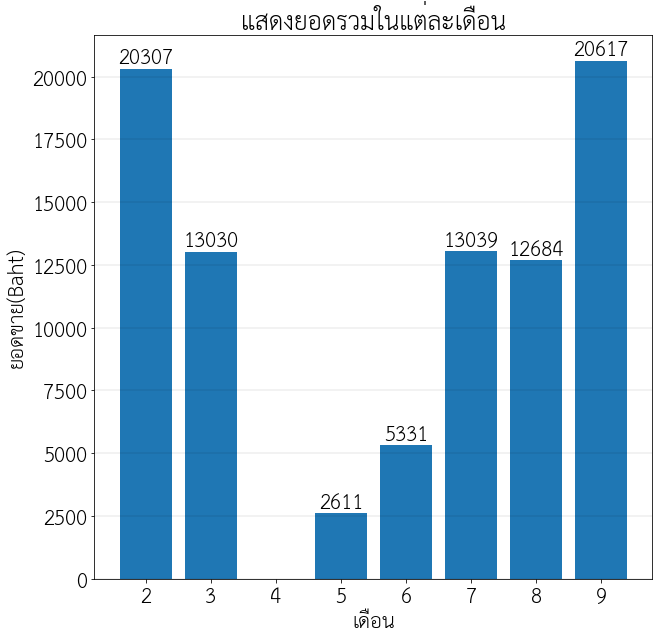

In [499]:
#แสดงยอดขายในแต่ละเดือน
dt_ms=pd.DataFrame(transaction.groupby(['Month'], as_index=False)['ราคาสุทธิ'].sum())
plt.figure(figsize=(10,10)) 
month = dt_ms["Month"]
unit = dt_ms["ราคาสุทธิ"]
 
# Plot the bar graph
plot = plt.bar(month, unit)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงยอดรวมในแต่ละเดือน")
plt.xlabel("เดือน")
plt.ylabel("ยอดขาย(Baht)")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y')
# Display the graph on the screen
plt.show()

In [500]:
dt_mds=pd.DataFrame(transaction.groupby(by=['Month','Day'] ,as_index=False)['ราคาสุทธิ'].sum())
dt_mds

,Month,Day,ราคาสุทธิ
0,2,3,691.0
1,2,4,561.0
2,2,5,566.0
3,2,6,656.0
4,2,7,801.0
...,...,...,...
184,9,25,278.0
185,9,26,115.0
186,9,27,219.0
187,9,29,305.0


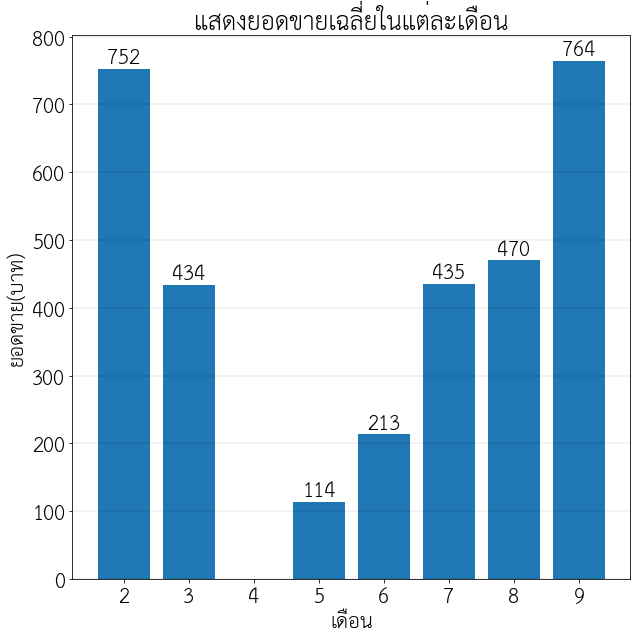

In [501]:
#แสดงยอดขายเฉลี่ยรายวันในแต่ละเดือน
dt_mmr=pd.DataFrame(dt_mds.groupby(by=['Month'] ,as_index=False)['ราคาสุทธิ'].mean().round())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) 
month = dt_mmr["Month"]
unit = dt_mmr["ราคาสุทธิ"]
 
# Plot the bar graph
plot = plt.bar(month, unit)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงยอดขายเฉลี่ยในแต่ละเดือน")
plt.xlabel("เดือน")
plt.ylabel("ยอดขาย(บาท)")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y') 
# Display the graph on the screen
plt.show()

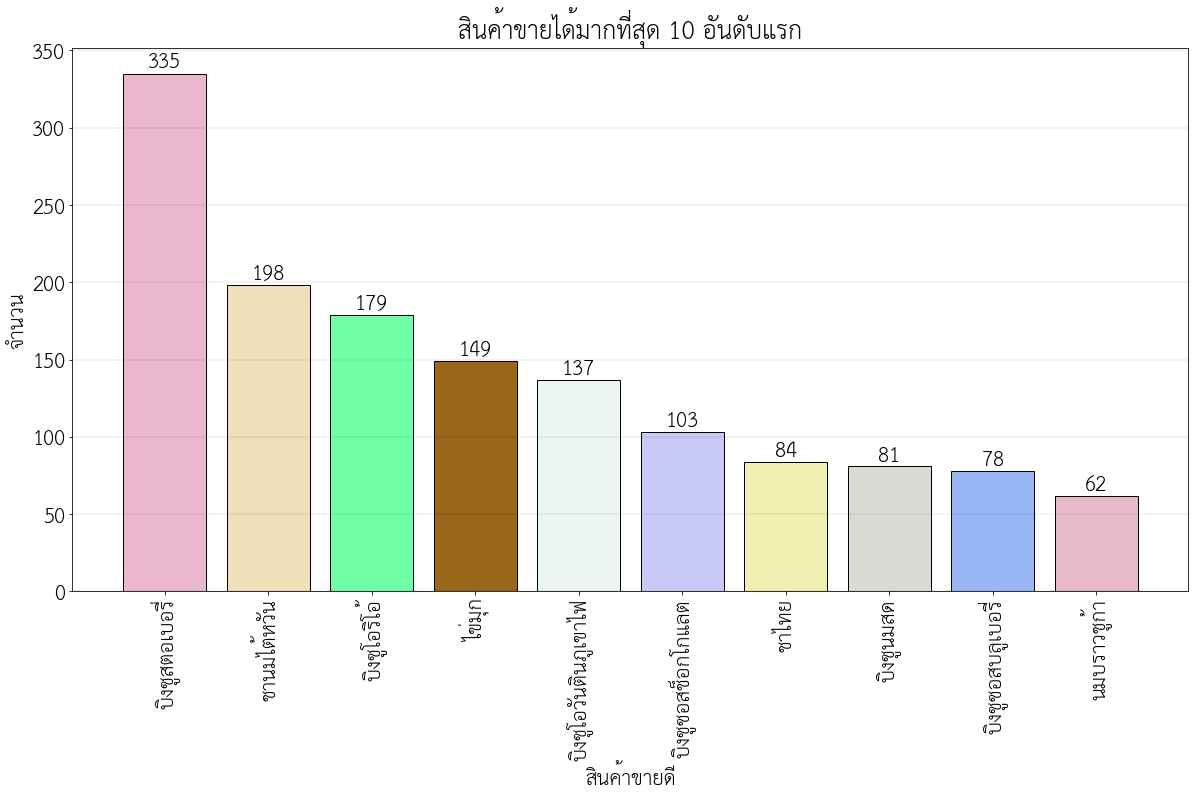

In [502]:
#แสดงสินค้าขายดี 10 อันดับแรก ตั้งแต่เดือนที่ 2 ถึงเดือนที่ 9

import matplotlib.ticker as ticker
import seaborn as sns
menupop=transaction.groupby(by=['R_menu'] ,as_index=False)['จำนวน'].sum().sort_values(by='จำนวน', ascending=False)

plt.figure(figsize=(20,10)) 
month = menupop["R_menu"][0:10]
unit = menupop["จำนวน"][0:10]
 

#color
color=[[None for _ in range(4)] for _ in range(len(month))]
import random
for i in range(len(month)):
    for j in range (4):
        color[i][j]=(round(random.random(), 1))
        
        
     
# Plot the bar graph
 
plot = plt.bar(month, unit,color=(color),edgecolor='k')
plt.xticks(rotation='vertical')
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("สินค้าขายได้มากที่สุด 10 อันดับแรก")
plt.xlabel("สินค้าขายดี")
plt.ylabel("จำนวน")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y')
# Display the graph on the screen
plt.show()

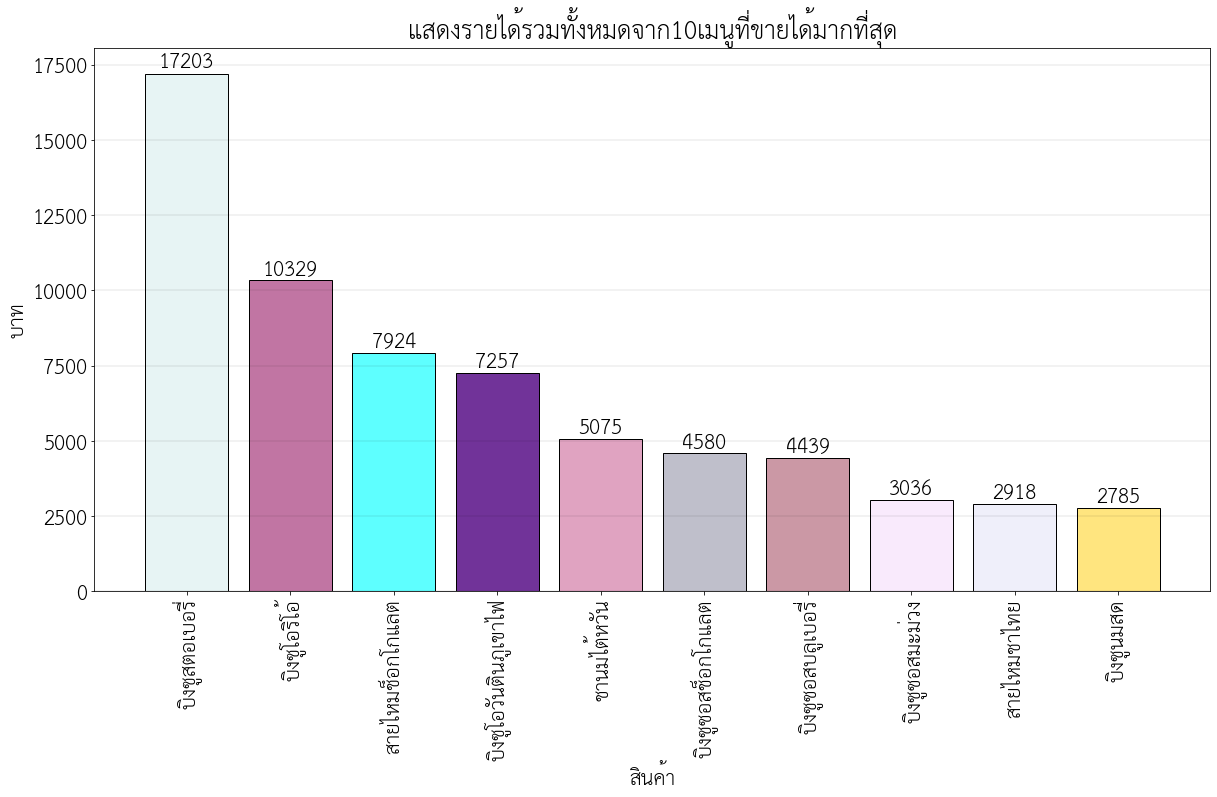

In [503]:
#แสดงยอดขายรวมทั้งหมดจาก10เมนูที่ขายได้มากที่สุด

menupop=transaction.groupby(by=['R_menu'] ,as_index=False)['ราคาสุทธิ'].sum().sort_values(by='ราคาสุทธิ', ascending=False)

plt.figure(figsize=(20,10)) 
month = menupop["R_menu"][0:10]
unit = menupop["ราคาสุทธิ"][0:10]

#color
color=[[None for _ in range(4)] for _ in range(len(month))]
import random
for i in range(len(month)):
    for j in range (4):
        color[i][j]=(round(random.random(), 1))
        
# Plot the bar graph

plot = plt.bar(month, unit,color=(color),edgecolor='k')
plt.xticks(rotation='vertical')
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงรายได้รวมทั้งหมดจาก10เมนูที่ขายได้มากที่สุด")
plt.xlabel("สินค้า")
plt.ylabel("บาท")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y') 
# Display the graph on the screen
plt.show()

In [504]:
#สินค้าขายดีที่สุดในแต่ละเดือน

def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list
menupop=transaction.groupby(by=['Month','ชื่อเมนู'] ,as_index=False)['จำนวน'].sum()
menupop

,Month,ชื่อเมนู,จำนวน
0,2,(TA)บิงซูซอสช็อกโกแลต,14
1,2,(TA)บิงซูซอสบลูเบอรี่,10
2,2,(TA)บิงซูซอสมะม่วง,11
3,2,(TA)บิงซูซอสสตอเบอรี่,49
4,2,(TA)บิงซูซอสสตอเบอรี่อัพไซส์ x 1,2
...,...,...,...
245,9,โกโก้,4
246,9,โกโก้ไข่มุก x 1,3
247,9,โรตีฝอยทองช็อกโกแลต,2
248,9,โรตีสตอเบอรี่,3


In [505]:

monthuq=unique(menupop["Month"])



popmonth=pd.DataFrame(menupop.loc[menupop['Month'] == 1].sort_values(by='จำนวน', ascending=False).reset_index(drop=True))
for i in monthuq :
    popmonth2=pd.DataFrame(menupop.loc[menupop['Month'] == i].sort_values(by='จำนวน', ascending=False).reset_index(drop=True))
    popmonth2=popmonth2.head(1)
    popmonth=popmonth.append(popmonth2, ignore_index=True)
popmonth


,Month,ชื่อเมนู,จำนวน
0,2,ไข่มุก,56
1,3,ชานมไต้หวัน,50
2,5,ชานมไต้หวัน,22
3,6,(TA)บิงซูซอสสตอเบอรี่,14
4,7,(TA)บิงซูซอสสตอเบอรี่,34
5,8,(TA)บิงซูซอสสตอเบอรี่,55
6,9,(TA)บิงซูซอสสตอเบอรี่,88


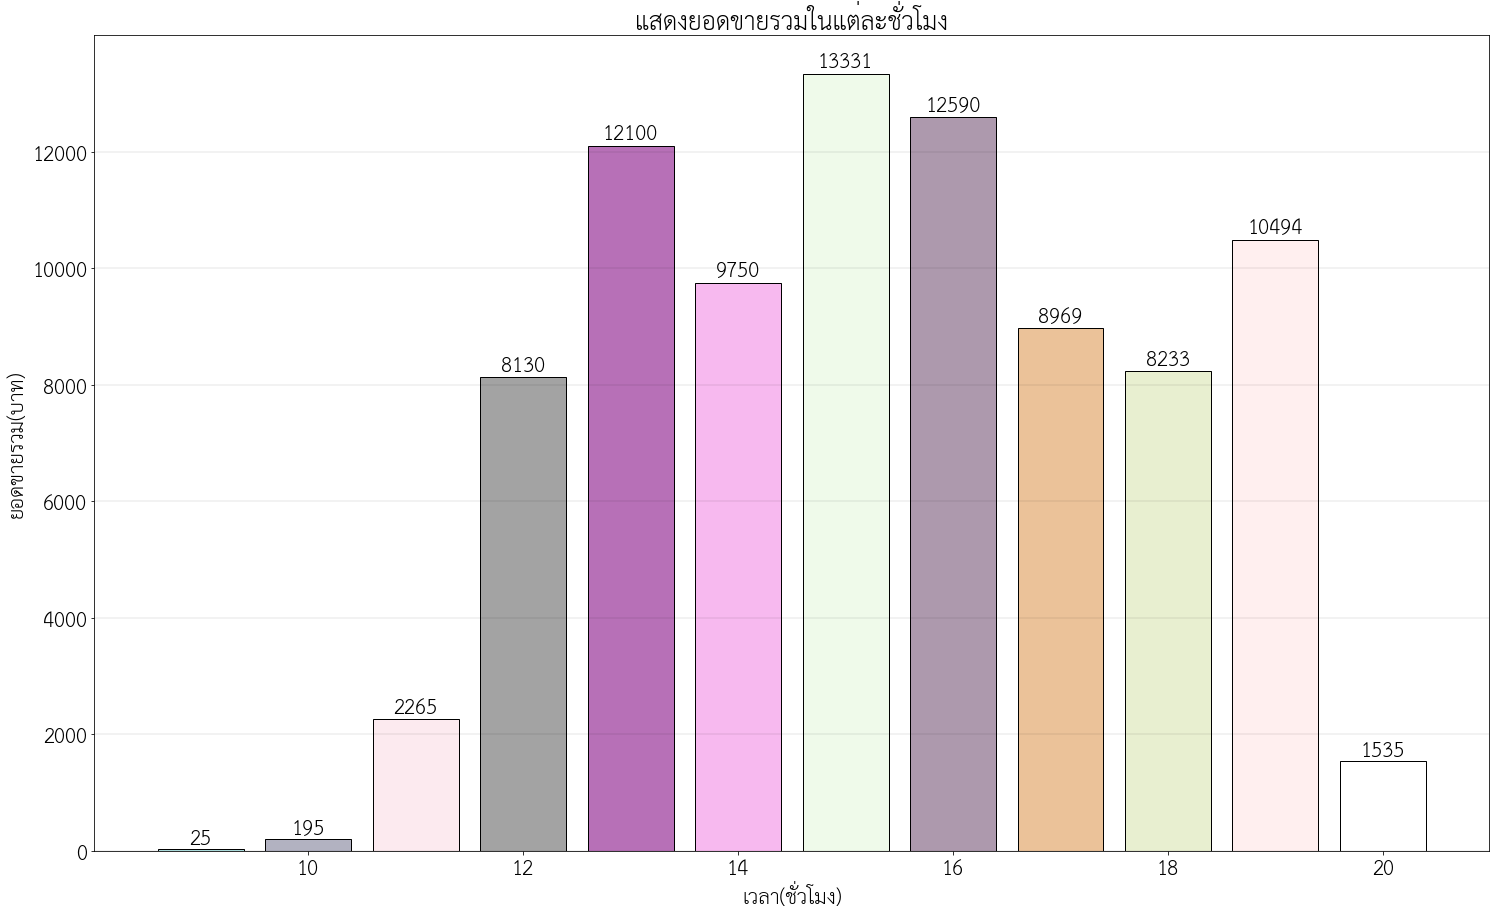

In [506]:
Besttime=transaction.groupby(by=['Hour'] ,as_index=False)['ราคาสุทธิ'].sum()
plt.figure(figsize=(25,15)) 
Hour = Besttime["Hour"]
Sale = Besttime["ราคาสุทธิ"]

#color
color=[[None for _ in range(4)] for _ in range(len(Hour))]
import random
for i in range(len(Hour)):
    for j in range (4):
        color[i][j]=(round(random.random(), 1))
        
    

# Plot the bar graph
plot = plt.bar(Hour, Sale,color=(color),edgecolor='k')
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงยอดขายรวมในแต่ละชั่วโมง")
plt.xlabel("เวลา(ชั่วโมง)")
plt.ylabel("ยอดขายรวม(บาท)")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y')
# Display the graph on the screen
plt.show()

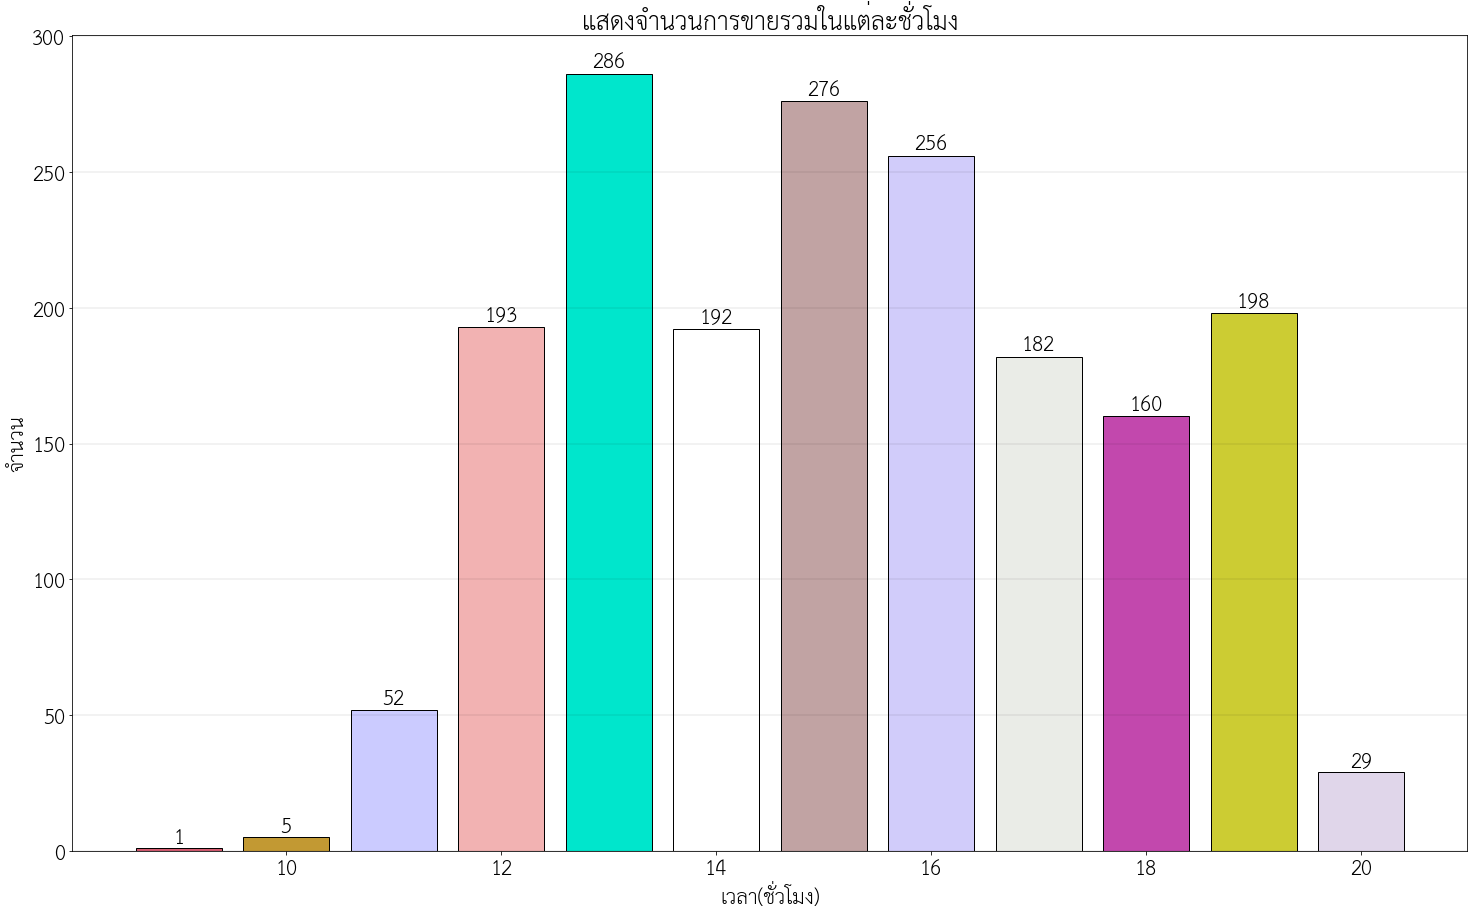

In [507]:
Besttime=transaction.groupby(by=['Hour'] ,as_index=False)['จำนวน'].sum()


plt.figure(figsize=(25,15)) 
Hour = Besttime["Hour"]
Sale = Besttime["จำนวน"]

#color
color=[[None for _ in range(4)] for _ in range(len(Hour))]
import random
for i in range(len(Hour)):
    for j in range (4):
        color[i][j]=(round(random.random(), 1))
        
    

# Plot the bar graph
plot = plt.bar(Hour, Sale,edgecolor='k',color=(color))
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงจำนวนการขายรวมในแต่ละชั่วโมง")
plt.xlabel("เวลา(ชั่วโมง)")
plt.ylabel("จำนวน")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y')
# Display the graph on the screen
plt.show()

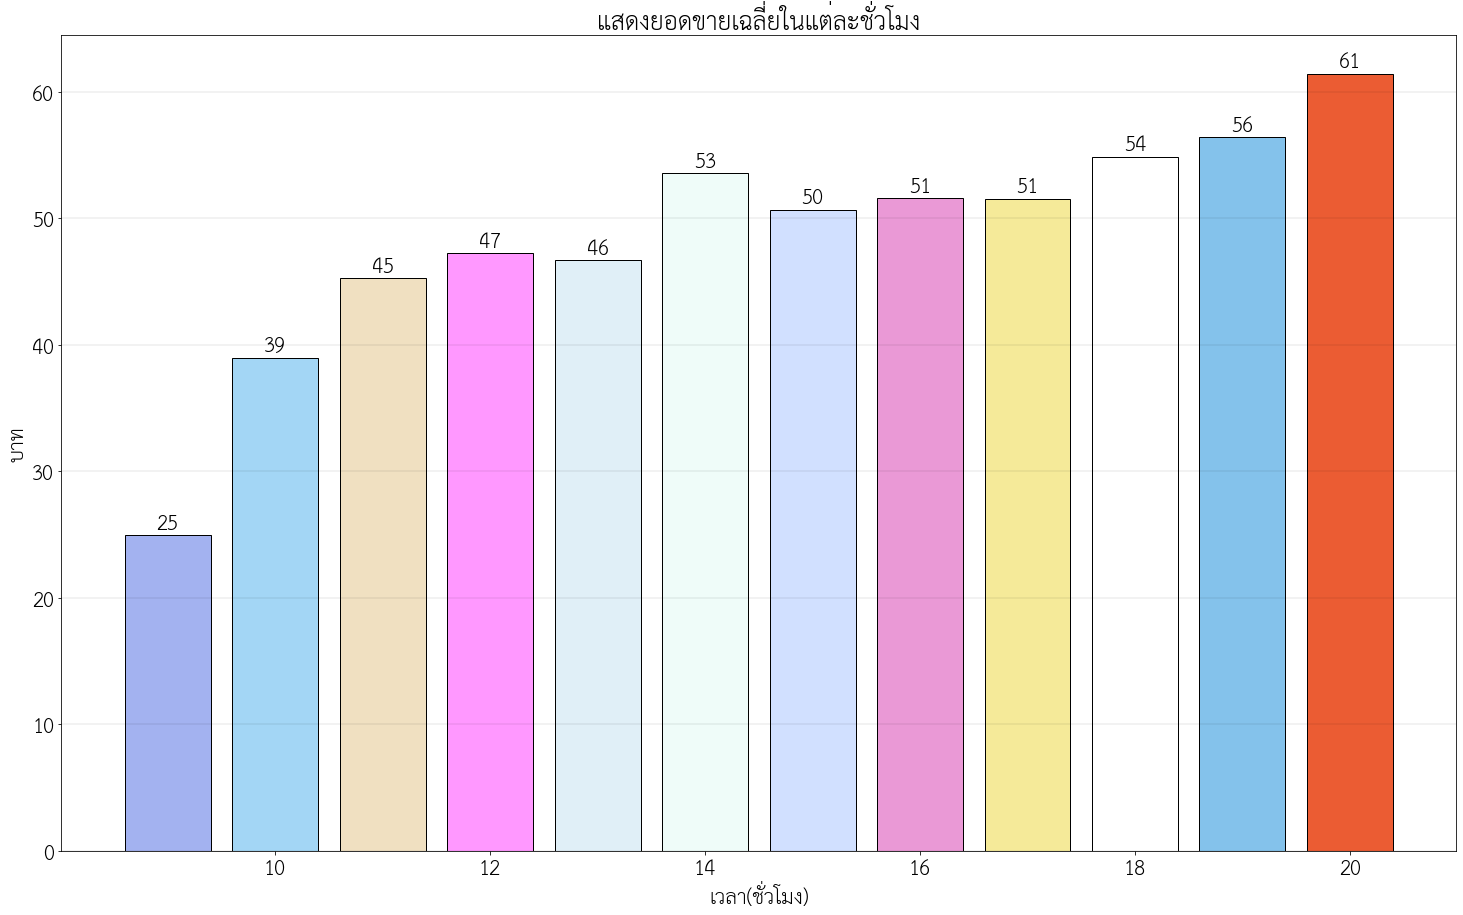

In [508]:
Besttime=transaction.groupby(by=['Hour'] ,as_index=False)['ราคาสุทธิ'].mean()

plt.figure(figsize=(25,15)) 
Hour = Besttime["Hour"]
Sale = Besttime["ราคาสุทธิ"]

#color
color=[[None for _ in range(4)] for _ in range(len(Hour))]
import random
for i in range(len(Hour)):
    for j in range (4):
        color[i][j]=(round(random.random(), 1))
        
    

# Plot the bar graph
plot = plt.bar(Hour, Sale,edgecolor='k',color=(color))
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงยอดขายเฉลี่ยในแต่ละชั่วโมง")
plt.xlabel("เวลา(ชั่วโมง)")
plt.ylabel("บาท")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y')
# Display the graph on the screen
plt.show()

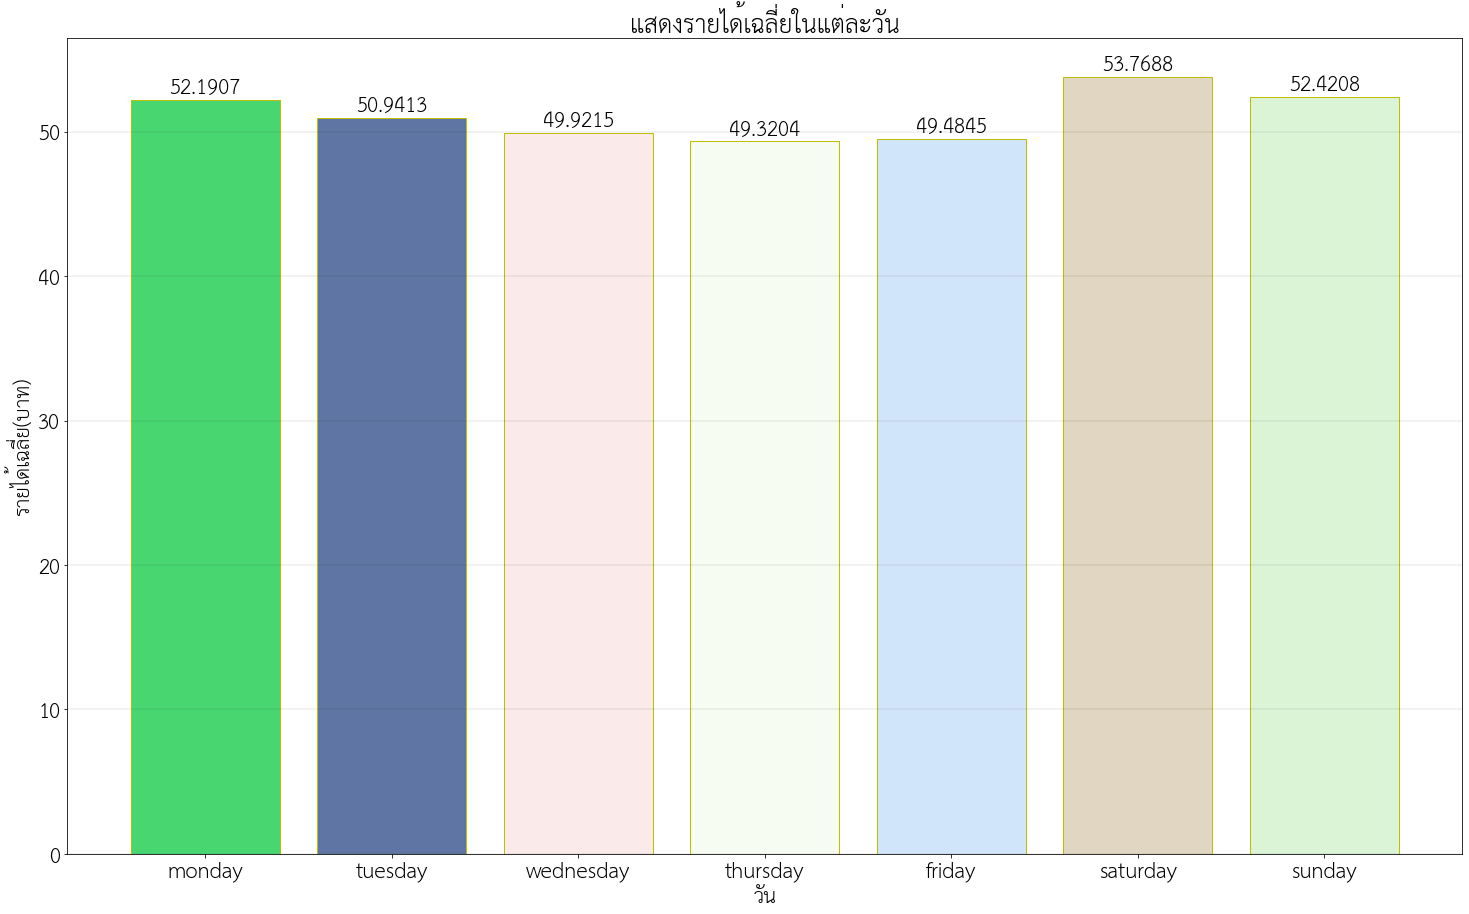

In [509]:
BestDay=transaction.groupby(by=['WeekDay'] ,as_index=False)['ราคาสุทธิ'].mean()
WeekDay = ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"]
Day1=BestDay
Day1["WeekDay"]=WeekDay
BestDay=transaction.groupby(by=['WeekDay'] ,as_index=False)['ราคาสุทธิ'].mean()
for i in range (len(Day1)):
    for j in range (len(Day1)):
        if Day1["WeekDay"][i]==BestDay["WeekDay"][j]:
            Day1["ราคาสุทธิ"][i]=BestDay["ราคาสุทธิ"][j]
        else:
            pass
            
BestDay=Day1
plt.figure(figsize=(25,15)) 
Day = BestDay["WeekDay"]
Sale = BestDay["ราคาสุทธิ"]

#color
color=[[None for _ in range(4)] for _ in range(len(Day))]
import random
for i in range(len(Day)):
    for j in range (4):
        color[i][j]=(round(random.random(), 1))
        
    

# Plot the bar graph
plot = plt.bar(Day,Sale,edgecolor='y',color=(color))
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%g' % height, ha='center', va='bottom')

 
# Add labels and title
plt.title("แสดงรายได้เฉลี่ยในแต่ละวัน")
plt.xlabel("วัน")
plt.ylabel("รายได้เฉลี่ย(บาท)")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y')
# Display the graph on the screen
plt.show()

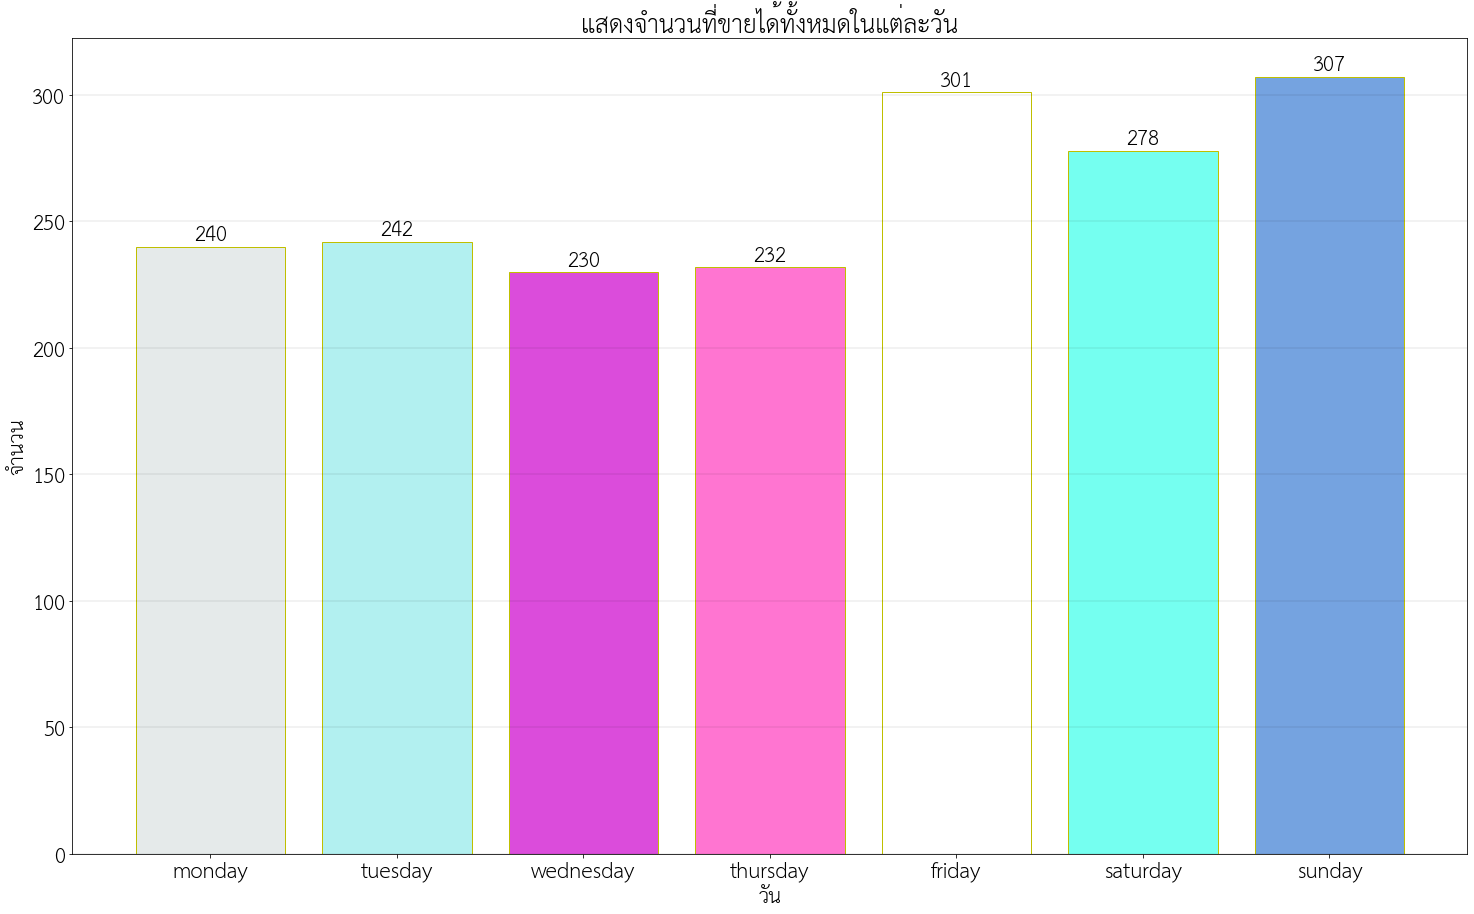

In [510]:
BestDay=transaction.groupby(by=['WeekDay'] ,as_index=False)['จำนวน'].sum()
WeekDay = ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"]
Day1=BestDay
Day1["WeekDay"]=WeekDay
BestDay=transaction.groupby(by=['WeekDay'] ,as_index=False)['จำนวน'].sum()
for i in range (len(Day1)):
    for j in range (len(Day1)):
        if Day1["WeekDay"][i]==BestDay["WeekDay"][j]:
            Day1["จำนวน"][i]=BestDay["จำนวน"][j]
        else:
            pass
            
BestDay=Day1
plt.figure(figsize=(25,15)) 
Day = BestDay["WeekDay"]
Sale = BestDay["จำนวน"]

#color
color=[[None for _ in range(4)] for _ in range(len(Day))]
import random
for i in range(len(Day)):
    for j in range (4):
        color[i][j]=(round(random.random(), 1))
        
    

# Plot the bar graph
plot = plt.bar(Day,Sale,edgecolor='y',color=(color))
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%g' % height, ha='center', va='bottom')

 
# Add labels and title
plt.title("แสดงจำนวนที่ขายได้ทั้งหมดในแต่ละวัน")
plt.xlabel("วัน")
plt.ylabel("จำนวน")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y')
# Display the graph on the screen
plt.show()

In [511]:
menupop=transaction.groupby(by=['Hour','ชื่อเมนู'] ,as_index=False)['จำนวน'].sum()
menupop

,Hour,ชื่อเมนู,จำนวน
0,9,ชานมไต้หวัน,1
1,10,(TA)บิงซูซอสสตอเบอรี่,3
2,10,ชานมไต้หวัน,1
3,10,ชาไทย,1
4,11,(TA)บิงซูซอสช็อกโกแลต,5
...,...,...,...
348,20,สายไหมชาไทย,1
349,20,สายไหมช็อกโกแลต,2
350,20,เยลลี่,1
351,20,โกโก้ไข่มุก x 1,1


In [512]:
#เมนูใดขายดีที่สุดในแต่ละช่วงเวลา
monthuq=unique(menupop["Hour"])



popmonth=pd.DataFrame(menupop.loc[menupop['Hour'] == 1].sort_values(by='จำนวน', ascending=False).reset_index(drop=True))
for i in monthuq :
    popmonth2=pd.DataFrame(menupop.loc[menupop['Hour'] == i].sort_values(by='จำนวน', ascending=False).reset_index(drop=True))
    popmonth2=popmonth2.head(1)
    popmonth=popmonth.append(popmonth2, ignore_index=True)
popmonth

,Hour,ชื่อเมนู,จำนวน
0,9,ชานมไต้หวัน,1
1,10,(TA)บิงซูซอสสตอเบอรี่,3
2,11,ชานมไต้หวัน,7
3,12,(TA)บิงซูซอสสตอเบอรี่,35
4,13,ชานมไต้หวัน,55
5,14,(TA)บิงซูซอสสตอเบอรี่,40
6,15,(TA)บิงซูซอสสตอเบอรี่,41
7,16,(TA)บิงซูซอสสตอเบอรี่,35
8,17,(TA)บิงซูซอสสตอเบอรี่,27
9,18,(TA)บิงซูซอสสตอเบอรี่,31


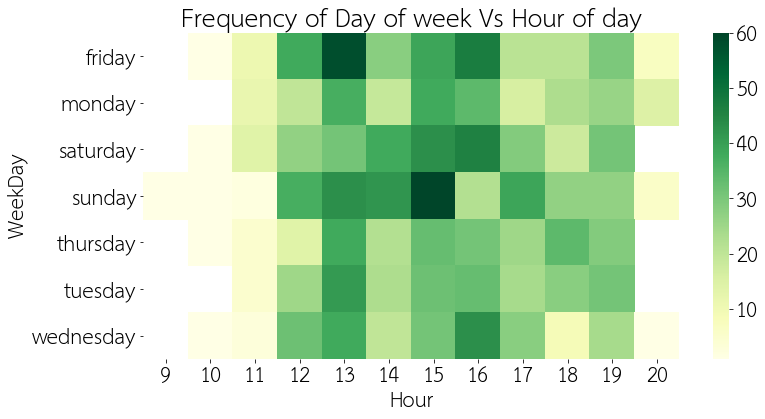

In [513]:
#ช่วงเวลาไหนที่มีจำนวนการขายได้เยอะที่สุด
import seaborn as sns

grouped_df=transaction.groupby(by=["WeekDay",'Hour'] ,as_index=False)['จำนวน'].sum()

grouped_df = grouped_df.pivot("WeekDay", "Hour","จำนวน")

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df,cmap="YlGn")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

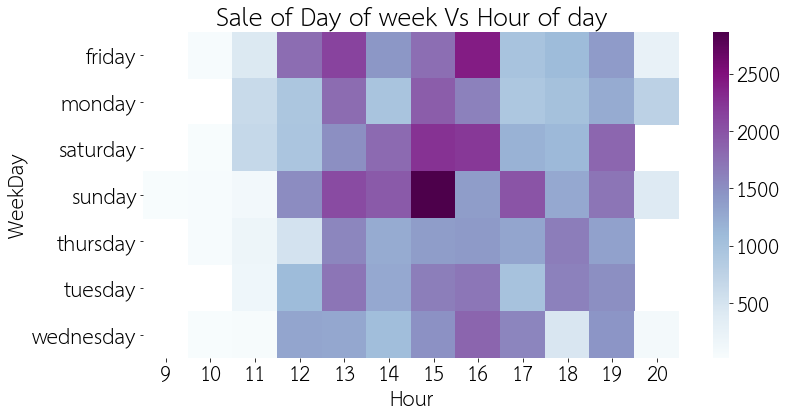

In [514]:
#ช่วงเวลาไหนที่มีจำนวนการรายได้เยอะที่สุด
import seaborn as sns

grouped_df=transaction.groupby(by=["WeekDay",'Hour'] ,as_index=False)['ราคาสุทธิ'].sum()

grouped_df = grouped_df.pivot("WeekDay", "Hour","ราคาสุทธิ")

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df,cmap="BuPu")
plt.title("Sale of Day of week Vs Hour of day")
plt.show()

In [515]:
mtsalePro=transaction.groupby(by=['Month','R_menu'] ,as_index=False)['จำนวน'].sum().sort_values(by=['จำนวน'], ascending=False)
mtsalePro
menupop=transaction.groupby(by=['R_menu'] ,as_index=False)['จำนวน'].sum().sort_values(by='จำนวน', ascending=False)
menupop

,R_menu,จำนวน
20,บิงซูสตอเบอรี่,335
4,ชานมไต้หวัน,198
21,บิงซูโอริโอ้,179
36,ไข่มุก,149
22,บิงซูโอวันตินภูเขาไฟ,137
13,บิงซูซอสช็อกโกแลต,103
7,ชาไทย,84
16,บิงซูนมสด,81
14,บิงซูซอสบลูเบอรี่,78
9,นมบราวชูก้า,62


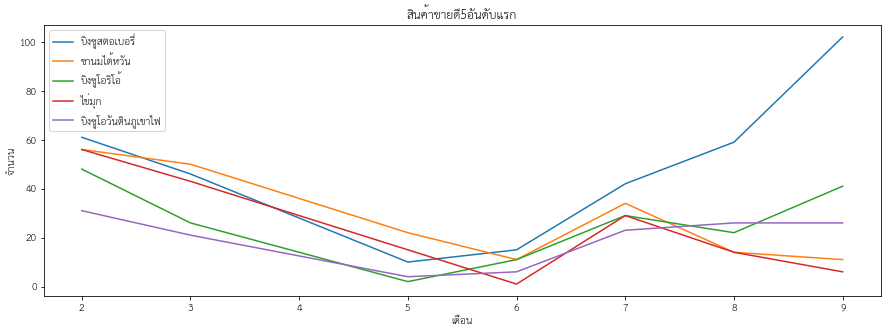

In [516]:
mtsalePro=transaction.groupby(by=['Month','R_menu'] ,as_index=False)['จำนวน'].sum().sort_values(by=['จำนวน'], ascending=False)
mtsalePro
menupop=transaction.groupby(by=['R_menu'] ,as_index=False)['จำนวน'].sum().sort_values(by='จำนวน', ascending=False)

mpl.rc('font',family='TH Sarabun New',size=10)

plt.figure(figsize=(15,5))
m1=pd.DataFrame(mtsalePro.loc[mtsalePro['R_menu'] == "บิงซูสตอเบอรี่"]).sort_values(by='Month', ascending=False)
m2=pd.DataFrame(mtsalePro.loc[mtsalePro['R_menu'] == "ชานมไต้หวัน"]).sort_values(by='Month', ascending=False)
m3=pd.DataFrame(mtsalePro.loc[mtsalePro['R_menu'] == "บิงซูโอริโอ้"]).sort_values(by='Month', ascending=False)
m4=pd.DataFrame(mtsalePro.loc[mtsalePro['R_menu'] == "ไข่มุก"]).sort_values(by='Month', ascending=False)
m5=pd.DataFrame(mtsalePro.loc[mtsalePro['R_menu'] == "บิงซูโอวันตินภูเขาไฟ"]).sort_values(by='Month', ascending=False)

plt.plot(m1["Month"],m1["จำนวน"], label = "บิงซูสตอเบอรี่") 
plt.plot(m2["Month"],m2["จำนวน"], label = "ชานมไต้หวัน") 
plt.plot(m3["Month"],m3["จำนวน"], label = "บิงซูโอริโอ้") 
plt.plot(m4["Month"],m4["จำนวน"], label = "ไข่มุก") 
plt.plot(m5["Month"],m5["จำนวน"], label = "บิงซูโอวันตินภูเขาไฟ") 

# naming the x axis 
plt.xlabel('เดือน') 
# naming the y axis 
plt.ylabel('จำนวน') 
# giving a title to my graph 
plt.title('สินค้าขายดี5อันดับแรก') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

# Split single and group transaction

In [517]:
#transaction.loc[transaction["หมายเลขใบเสร็จ / ID"]==""]
Split=transaction["หมายเลขใบเสร็จ / ID"].tolist()
Split=np.unique(Split)
single=transaction.loc[transaction["หมายเลขใบเสร็จ / ID"]==""]
group=transaction.loc[transaction["หมายเลขใบเสร็จ / ID"]==""]

for i in range (len(Split)):
    if (len(transaction.loc[transaction["หมายเลขใบเสร็จ / ID"]==Split[i]]))>=2:
        group=group.append(transaction.loc[transaction["หมายเลขใบเสร็จ / ID"]==Split[i]])

    if (len(transaction.loc[transaction["หมายเลขใบเสร็จ / ID"]==Split[i]]))==1:
        single=single.append(transaction.loc[transaction["หมายเลขใบเสร็จ / ID"]==Split[i]])


In [518]:
single

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,...,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน,Hour,Minute,WeekDay,R_menu,Ext_menu
917,00UFA,นมบราวชูก้า,Dine-In,1,35.0,35.0,3.5,10.0,31.5,Cash,...,เครื่องดื่ม,11,7,2020,19:35:00,19,35,saturday,นมบราวชูก้า,-
1702,02W9S,ชานมไต้หวัน,Dine-In,2,30.0,60.0,0.0,0.0,60.0,Cash,...,ชา,29,9,2020,13:09:00,13,9,tuesday,ชานมไต้หวัน,-
1005,038JB,(TA)บิงซูโอวันตินภูเขาไฟ,Dine-In,1,39.0,39.0,3.9,10.0,35.1,Cash,...,Take away,20,7,2020,15:25:00,15,25,monday,บิงซูโอวันตินภูเขาไฟ,-
1012,045YR,บิงซูโอวันตินภูเขาไฟ,Dine-In,1,99.0,99.0,9.9,10.0,89.1,Cash,...,ถ้วยใหญ่,20,7,2020,19:49:00,19,49,monday,บิงซูโอวันตินภูเขาไฟ,-
647,08QG8,นมบราวชูก้าไข่มุก x 1,Dine-In,1,40.0,40.0,0.0,0.0,40.0,Cash,...,เครื่องดื่ม,21,3,2020,17:21:00,17,21,saturday,นมบราวชูก้า,ไข่มุก
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,ZPOO6,(TA)บิงซูโอริโอ้อัพไซส์ x 1,Dine-In,1,65.0,65.0,0.0,0.0,65.0,Cash,...,Take away,25,2,2020,18:30:00,18,30,tuesday,บิงซูโอริโอ้,อัพไซส์
1243,ZRLCL,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.0,45.0,Cash,...,Take away,20,8,2020,12:31:00,12,31,thursday,บิงซูสตอเบอรี่,-
825,ZSY44,(TA)บิงซูซอสบลูเบอรี่อัพไซส์ x 1,Dine-In,1,70.0,70.0,7.0,10.0,63.0,Cash,...,Take away,28,6,2020,17:36:00,17,36,sunday,บิงซูซอสบลูเบอรี่,อัพไซส์
990,ZV6I7,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,4.5,10.0,40.5,Cash,...,Take away,19,7,2020,14:02:00,14,2,sunday,บิงซูสตอเบอรี่,-


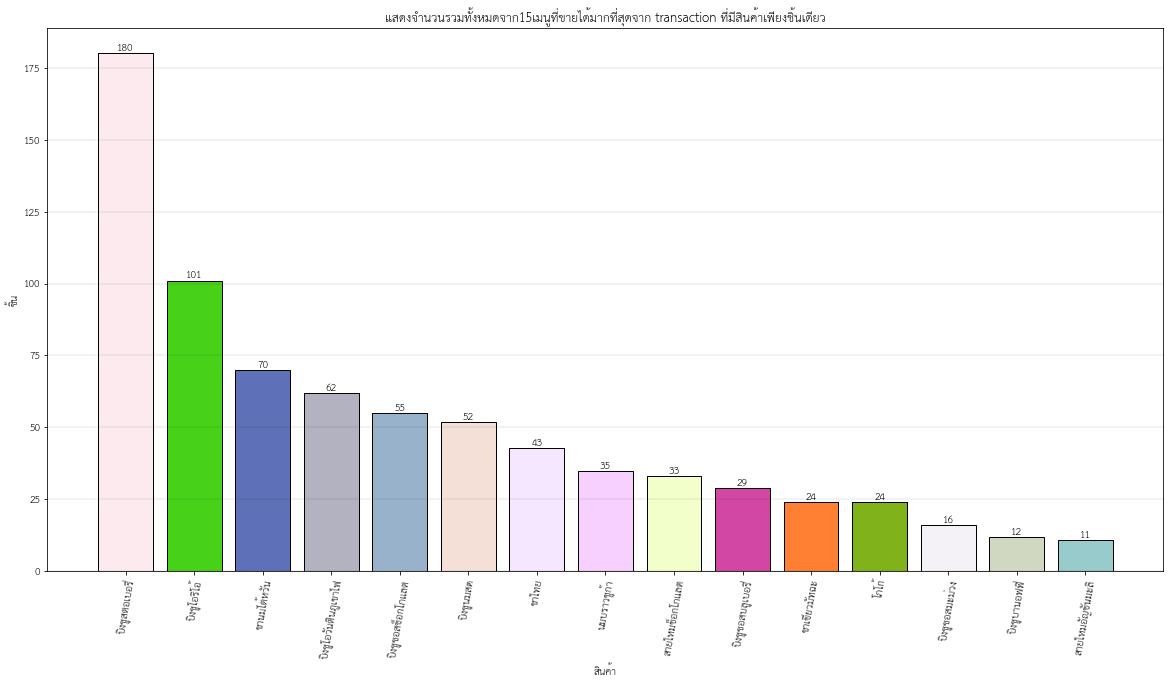

In [519]:
#แสดงยอดขายรวมทั้งหมดจาก15เมนูที่ขายได้มากที่สุด จาก transaction ที่มีสินค้าเพียงชิ้นเดียว

menupop=single.groupby(by=['R_menu'] ,as_index=False)['จำนวน'].sum().sort_values(by='จำนวน', ascending=False)

plt.figure(figsize=(20,10)) 
month = menupop["R_menu"][0:15]
unit = menupop["จำนวน"][0:15]

#color
color=[[None for _ in range(4)] for _ in range(len(month))]
import random
for i in range(len(month)):
    for j in range (4):
        color[i][j]=(round(random.random(), 1))
        
# Plot the bar graph

plot = plt.bar(month, unit,color=(color),edgecolor='k')
plt.xticks(rotation=80)
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงจำนวนรวมทั้งหมดจาก15เมนูที่ขายได้มากที่สุดจาก transaction ที่มีสินค้าเพียงชิ้นเดียว")
plt.xlabel("สินค้า")
plt.ylabel("ชิ้น")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y') 
# Display the graph on the screen
plt.show()

In [520]:
group

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,...,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน,Hour,Minute,WeekDay,R_menu,Ext_menu
899,0016J,บิงซูซอสมะม่วง,Dine-In,1,109.0,109.0,10.9,10.00,98.1,Cash,...,ถ้วยใหญ่,9,7,2020,19:39:00,19,39,thursday,บิงซูซอสมะม่วง,-
900,0016J,ไข่มุก,Dine-In,1,5.0,5.0,0.0,0.00,5.0,Cash,...,topping,9,7,2020,19:39:00,19,39,thursday,ไข่มุก,-
778,01ZEX,(TA)บิงซูโอวันตินภูเขาไฟ,Dine-In,1,39.0,39.0,3.9,10.00,35.1,Cash,...,Take away,13,6,2020,13:06:00,13,6,saturday,บิงซูโอวันตินภูเขาไฟ,-
779,01ZEX,มาร์ชเมลโล่,Dine-In,1,10.0,10.0,0.0,0.00,10.0,Cash,...,topping,13,6,2020,13:06:00,13,6,saturday,มาร์ชเมลโล่,-
1216,034E5,สายไหมชาไทย,Dine-In,1,129.0,129.0,0.0,0.00,129.0,Cash,...,สายไหม,16,8,2020,14:09:00,14,9,sunday,สายไหมชาไทย,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,ZSQMX,บิงซูโอวันตินภูเขาไฟ,Dine-In,1,99.0,99.0,0.0,0.00,99.0,Cash,...,ถ้วยใหญ่,16,2,2020,17:16:00,17,16,sunday,บิงซูโอวันตินภูเขาไฟ,-
298,ZTPRG,นมบราวชูก้า,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,เครื่องดื่ม,22,2,2020,16:09:00,16,9,saturday,นมบราวชูก้า,-
299,ZTPRG,ชาไทย,Dine-In,1,30.0,30.0,5.0,16.67,25.0,Cash,...,ชา,22,2,2020,16:09:00,16,9,saturday,ชาไทย,-
1251,ZTUNR,(TA)บิงซูซอสสตอเบอรี่,Dine-In,2,45.0,90.0,0.0,0.00,90.0,Cash,...,Take away,21,8,2020,12:14:00,12,14,friday,บิงซูสตอเบอรี่,-


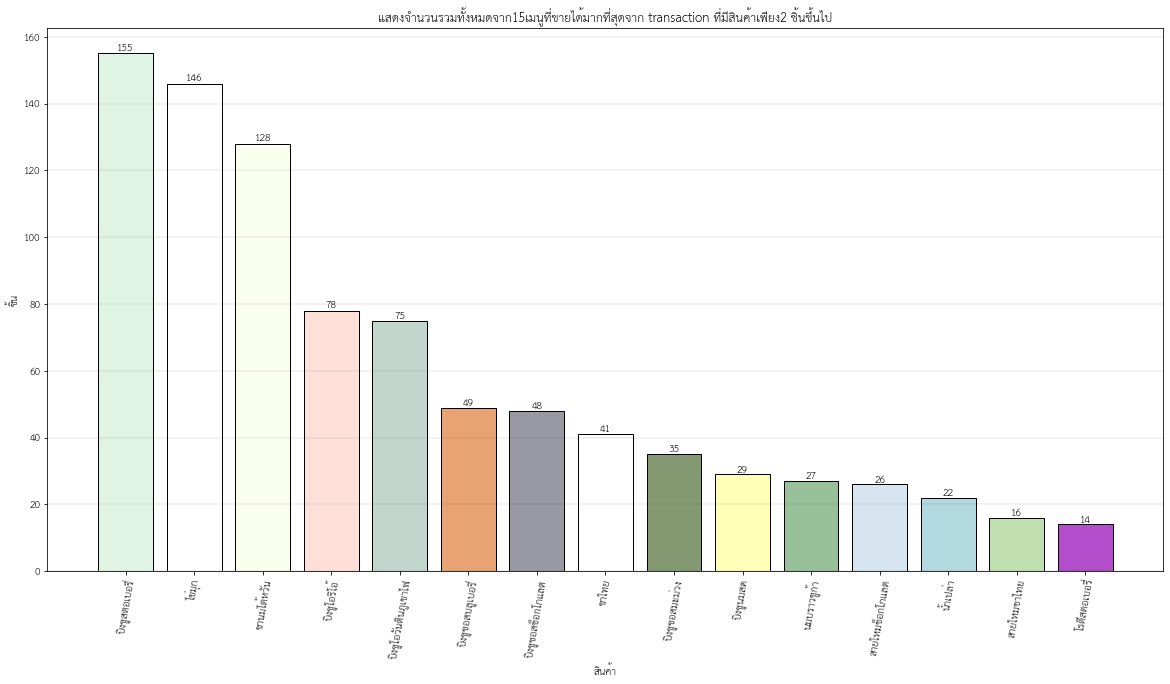

In [521]:
#แสดงยอดขายรวมทั้งหมดจาก15เมนูที่ขายได้มากที่สุด จาก transaction ที่มีสินค้าเพียง2 ชิ้นขึ้นไป

menupop1=group.groupby(by=['R_menu'] ,as_index=False)['จำนวน'].sum().sort_values(by='จำนวน', ascending=False)

plt.figure(figsize=(20,10)) 
month1 = menupop1["R_menu"][0:15]
unit1 = menupop1["จำนวน"][0:15]

#color
color1=[[None for _ in range(4)] for _ in range(len(month1))]
import random
for i in range(len(month1)):
    for j in range (4):
        color1[i][j]=(round(random.random(), 1))
        
# Plot the bar graph

plot1 = plt.bar(month1, unit1,color=(color1),edgecolor='k')
plt.xticks(rotation=80)
# Add the data value on head of the bar
for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงจำนวนรวมทั้งหมดจาก15เมนูที่ขายได้มากที่สุดจาก transaction ที่มีสินค้าเพียง2 ชิ้นขึ้นไป")
plt.xlabel("สินค้า")
plt.ylabel("ชิ้น")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y') 
# Display the graph on the screen
plt.show()

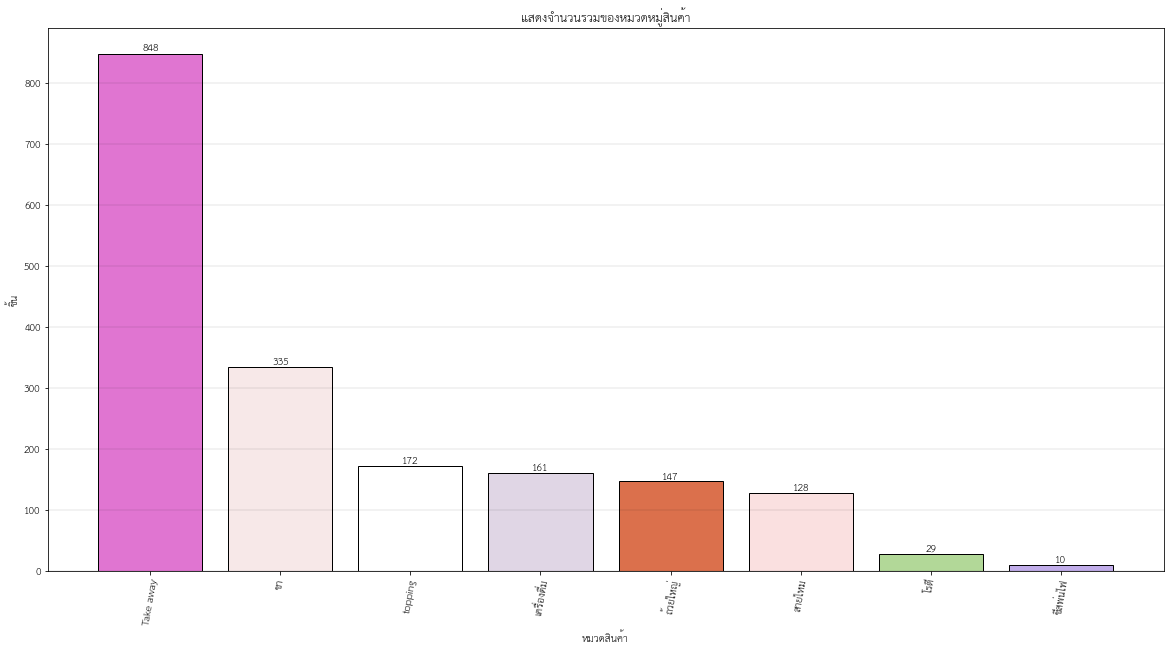

In [522]:
menupop1=transaction.groupby(by=['หมวดสินค้า'] ,as_index=False)['จำนวน'].sum().sort_values(by='จำนวน', ascending=False)

plt.figure(figsize=(20,10)) 
month1 = menupop1["หมวดสินค้า"][0:15]
unit1 = menupop1["จำนวน"][0:15]

#color
color1=[[None for _ in range(4)] for _ in range(len(month1))]
import random
for i in range(len(month1)):
    for j in range (4):
        color1[i][j]=(round(random.random(), 1))
        
# Plot the bar graph

plot1 = plt.bar(month1, unit1,color=(color1),edgecolor='k')
plt.xticks(rotation=80)
# Add the data value on head of the bar
for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงจำนวนรวมของหมวดหมู่สินค้า")
plt.xlabel("หมวดสินค้า")
plt.ylabel("ชิ้น")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y') 
# Display the graph on the screen
plt.show()

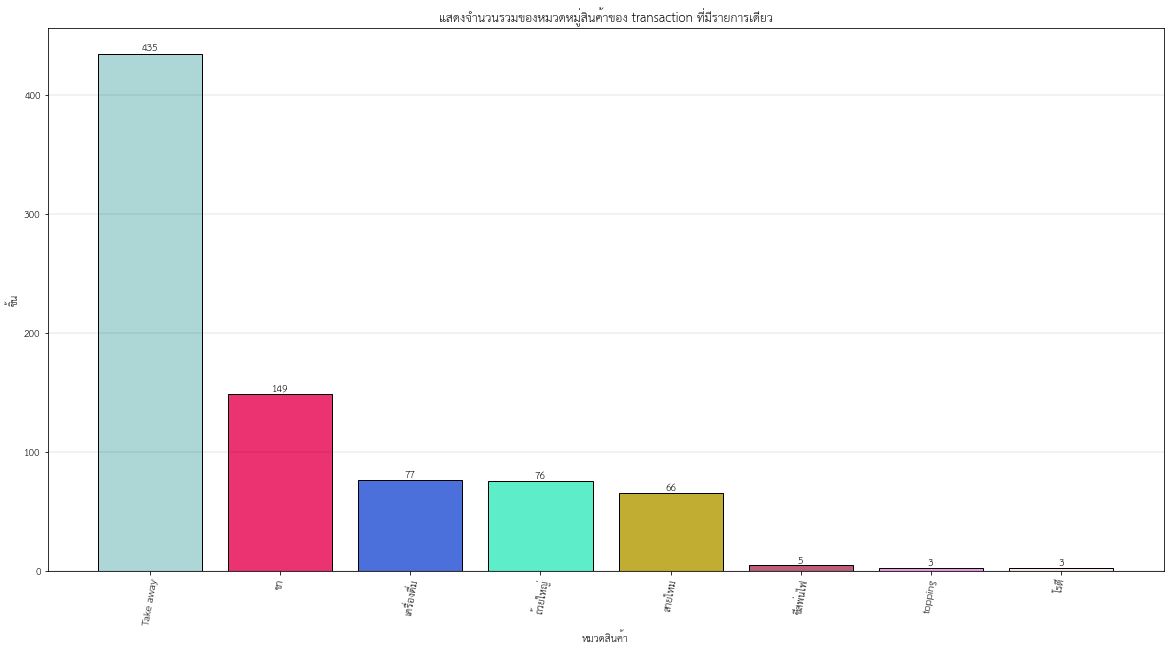

In [523]:
menupop1=single.groupby(by=['หมวดสินค้า'] ,as_index=False)['จำนวน'].sum().sort_values(by='จำนวน', ascending=False)

plt.figure(figsize=(20,10)) 
month1 = menupop1["หมวดสินค้า"][0:15]
unit1 = menupop1["จำนวน"][0:15]

#color
color1=[[None for _ in range(4)] for _ in range(len(month1))]
import random
for i in range(len(month1)):
    for j in range (4):
        color1[i][j]=(round(random.random(), 1))
        
# Plot the bar graph

plot1 = plt.bar(month1, unit1,color=(color1),edgecolor='k')
plt.xticks(rotation=80)
# Add the data value on head of the bar
for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงจำนวนรวมของหมวดหมู่สินค้าของ transaction ที่มีรายการเดียว")
plt.xlabel("หมวดสินค้า")
plt.ylabel("ชิ้น")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y') 
# Display the graph on the screen
plt.show()

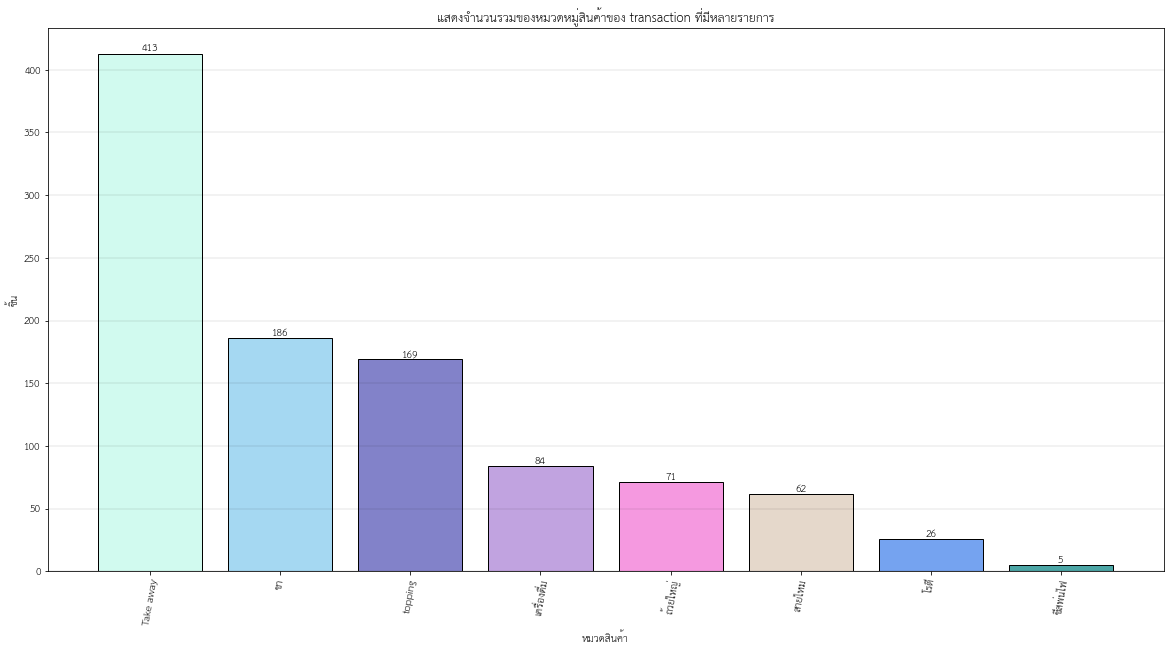

In [524]:
menupop1=group.groupby(by=['หมวดสินค้า'] ,as_index=False)['จำนวน'].sum().sort_values(by='จำนวน', ascending=False)

plt.figure(figsize=(20,10)) 
month1 = menupop1["หมวดสินค้า"][0:15]
unit1 = menupop1["จำนวน"][0:15]

#color
color1=[[None for _ in range(4)] for _ in range(len(month1))]
import random
for i in range(len(month1)):
    for j in range (4):
        color1[i][j]=(round(random.random(), 1))
        
# Plot the bar graph

plot1 = plt.bar(month1, unit1,color=(color1),edgecolor='k')
plt.xticks(rotation=80)
# Add the data value on head of the bar
for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("แสดงจำนวนรวมของหมวดหมู่สินค้าของ transaction ที่มีหลายรายการ")
plt.xlabel("หมวดสินค้า")
plt.ylabel("ชิ้น")
plt.grid(color='k', linestyle='-', linewidth=0.1,axis='y') 
# Display the graph on the screen
plt.show()

In [525]:
transaction

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,...,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน,Hour,Minute,WeekDay,R_menu,Ext_menu
0,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,...,Take away,3,2,2020,11:19:00,11,19,monday,บิงซูสตอเบอรี่,-
1,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,...,Take away,3,2,2020,11:19:00,11,19,monday,บิงซูโอริโอ้,-
2,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,...,Take away,3,2,2020,14:11:00,14,11,monday,บิงซูสตอเบอรี่,-
3,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109.0,109.0,0.0,0.00,109.0,Cash,...,ถ้วยใหญ่,3,2,2020,14:53:00,14,53,monday,บิงซูสตอเบอรี่,-
4,1EI74,ชานมไต้หวัน,Dine-In,1,30.0,30.0,5.0,16.67,25.0,Cash,...,ชา,3,2,2020,16:07:00,16,7,monday,ชานมไต้หวัน,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,29,9,2020,17:58:00,17,58,tuesday,ชานมไต้,ไข่มุก
1708,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,30,9,2020,15:52:00,15,52,wednesday,ชานมไต้,ไข่มุก
1709,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,30,9,2020,16:43:00,16,43,wednesday,ชานมไต้,ไข่มุก
1710,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,30,9,2020,16:44:00,16,44,wednesday,ชานมไต้,ไข่มุก


In [526]:
transaction.describe()

,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,Day,Month,Year,Hour,Minute
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.0,1711.000000,1711.000000
mean,1.069550,50.931034,53.182934,1.973290,3.949825,51.209643,15.474576,5.591467,2020.0,15.271186,28.639392
std,0.272227,33.709317,34.281973,3.633967,6.919836,33.723808,8.086110,2.774301,0.0,2.356051,17.292707
min,1.000000,5.000000,5.000000,0.000000,0.000000,5.000000,1.000000,2.000000,2020.0,9.000000,0.000000
25%,1.000000,35.000000,35.000000,0.000000,0.000000,35.000000,9.000000,3.000000,2020.0,13.000000,13.000000
50%,1.000000,45.000000,45.000000,0.000000,0.000000,45.000000,15.000000,7.000000,2020.0,15.000000,28.000000
75%,1.000000,50.000000,59.000000,3.900000,10.000000,50.000000,22.000000,8.000000,2020.0,17.000000,44.000000
max,3.000000,159.000000,159.000000,20.000000,33.330000,159.000000,31.000000,9.000000,2020.0,20.000000,59.000000


# Market Basket analysis

Association ของ ข้อมูลทั้งหมด

In [802]:
#Create Transaction Matrix
from tqdm import tqdm 
import time 

UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
#NameOfProduct="ชื่อเมนู"#NameOfProduct
NameOfProduct="R_menu"#NameOfProduct

def transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction):
    #May be Change
    NameInvoiceNo=UserNumber
    Count=Quantity
    Menu=NameOfProduct
    InvoiceNo = transaction[NameInvoiceNo].unique() #
    Description = transaction[Menu].unique()
    
    #create empty Zeros Dataframe
    df = pd.DataFrame(np.nan, index=InvoiceNo, columns=Description)
    df.insert(0,NameInvoiceNo,InvoiceNo, True)
    df.reset_index()
    df1=df.iloc[:,1:]
    where_are_NaNs = np.isnan(df1)
    df1[where_are_NaNs] = 0
    #create Transaction Matrix
    Transaction_matrix = df1
    bill=transaction
    Transaction_matrix=Transaction_matrix.reset_index()
    Transaction_matrix=Transaction_matrix.rename(columns={"index":NameInvoiceNo})
    
    #create Bill
    for i in range(len(Transaction_matrix)):
        billtest=bill.loc[bill[NameInvoiceNo]==Transaction_matrix.iloc[i,0]]
        billDe=[]
        for j in range(len(billtest)):
            col=billtest.columns.get_loc(Menu)
            billDe.append(billtest.iloc[j,col]) 
        bills=[] 
        for k in range (len(billDe)):
            bills.append(Transaction_matrix.columns.get_loc(billDe[k]))
        cc=billtest.columns.get_loc(Count)    
        for L in range (len(bills)):
            Transaction_matrix.iloc[i,bills[L]]=billtest.iloc[L,cc]
    
        
    Transaction_matrix_df=Transaction_matrix.drop(columns=[NameInvoiceNo])

     #Transaction Matrix with 1  
    for i in range (len(Transaction_matrix_df)):
        for j in range(len(Transaction_matrix_df.columns)):
            if (Transaction_matrix_df.iloc[i,j])>0:
                Transaction_matrix_df.iloc[i,j]=1
            else :
                Transaction_matrix_df.iloc[i,j]=0
        
    return Transaction_matrix_df
                         
                                                            

Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction)
Transaction_matrix_df

,บิงซูสตอเบอรี่,บิงซูโอริโอ้,ชานมไต้หวัน,บิงซูนมสด,บิงซูซอสมะม่วง,บิงซูโอวันตินภูเขาไฟ,สายไหมชาชีสพ่นไฟ,คอนเฟลก,นมชีสพ่นไฟ,บิงซูซอสบลูเบอรี่,...,เยลลี่,ชาชีสพ่นไฟ,บิงซูฝอยทองซอสช็อกโกแลต,สายไหมชาเขียว,กล้วย,มาร์ชเมลโล่,ชาเขียวมัทฉะชีสพ่นไฟ,บิงซูฝอยทองช็อกโกแลต,ชานมไต้,สายไหมชานมไต้หวัน
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [803]:
#Assosiation rules
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

   

frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.01,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.01)
print("FOR ALL TRANSACTION (Apriori)")
rules.sort_values(by='support', ascending=False)

FOR ALL TRANSACTION (Apriori)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(ชานมไต้หวัน),(ไข่มุก),0.146299,0.111876,0.071429,0.488235,4.364072,0.055061,1.735415
18,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299
1,(บิงซูสตอเบอรี่),(บิงซูโอริโอ้),0.264200,0.150602,0.030120,0.114007,0.757003,-0.009669,0.958695
0,(บิงซูโอริโอ้),(บิงซูสตอเบอรี่),0.150602,0.264200,0.030120,0.200000,0.757003,-0.009669,0.919750
4,(บิงซูโอวันตินภูเขาไฟ),(บิงซูสตอเบอรี่),0.112737,0.264200,0.022375,0.198473,0.751225,-0.007410,0.917999
5,(บิงซูสตอเบอรี่),(บิงซูโอวันตินภูเขาไฟ),0.264200,0.112737,0.022375,0.084691,0.751225,-0.007410,0.969359
11,(บิงซูสตอเบอรี่),(บิงซูซอสช็อกโกแลต),0.264200,0.083477,0.016351,0.061889,0.741395,-0.005703,0.976988
10,(บิงซูซอสช็อกโกแลต),(บิงซูสตอเบอรี่),0.083477,0.264200,0.016351,0.195876,0.741395,-0.005703,0.915034
6,(บิงซูซอสบลูเบอรี่),(บิงซูสตอเบอรี่),0.062823,0.264200,0.015491,0.246575,0.933292,-0.001107,0.976608
7,(บิงซูสตอเบอรี่),(บิงซูซอสบลูเบอรี่),0.264200,0.062823,0.015491,0.058632,0.933292,-0.001107,0.995548


In [804]:

frequent_itemsets = fpgrowth(Transaction_matrix_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.01)
print("FOR ALL TRANSACTION (Fp-Growth)")
rules.sort_values(by='support', ascending=False)

FOR ALL TRANSACTION (Fp-Growth)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299
11,(ชานมไต้หวัน),(ไข่มุก),0.146299,0.111876,0.071429,0.488235,4.364072,0.055061,1.735415
1,(บิงซูสตอเบอรี่),(บิงซูโอริโอ้),0.264200,0.150602,0.030120,0.114007,0.757003,-0.009669,0.958695
0,(บิงซูโอริโอ้),(บิงซูสตอเบอรี่),0.150602,0.264200,0.030120,0.200000,0.757003,-0.009669,0.919750
6,(บิงซูโอวันตินภูเขาไฟ),(บิงซูสตอเบอรี่),0.112737,0.264200,0.022375,0.198473,0.751225,-0.007410,0.917999
7,(บิงซูสตอเบอรี่),(บิงซูโอวันตินภูเขาไฟ),0.264200,0.112737,0.022375,0.084691,0.751225,-0.007410,0.969359
16,(บิงซูซอสช็อกโกแลต),(บิงซูสตอเบอรี่),0.083477,0.264200,0.016351,0.195876,0.741395,-0.005703,0.915034
17,(บิงซูสตอเบอรี่),(บิงซูซอสช็อกโกแลต),0.264200,0.083477,0.016351,0.061889,0.741395,-0.005703,0.976988
4,(บิงซูซอสมะม่วง),(บิงซูสตอเบอรี่),0.043890,0.264200,0.015491,0.352941,1.335888,0.003895,1.137146
5,(บิงซูสตอเบอรี่),(บิงซูซอสมะม่วง),0.264200,0.043890,0.015491,0.058632,1.335888,0.003895,1.015660


In [805]:
frequent_itemsets

,support,itemsets
0,0.264200,(บิงซูสตอเบอรี่)
1,0.150602,(บิงซูโอริโอ้)
2,0.146299,(ชานมไต้หวัน)
3,0.061102,(บิงซูนมสด)
4,0.043890,(บิงซูซอสมะม่วง)
5,0.112737,(บิงซูโอวันตินภูเขาไฟ)
6,0.062823,(บิงซูซอสบลูเบอรี่)
7,0.111876,(ไข่มุก)
8,0.027539,(ชาเขียวมัทฉะ)
9,0.083477,(บิงซูซอสช็อกโกแลต)


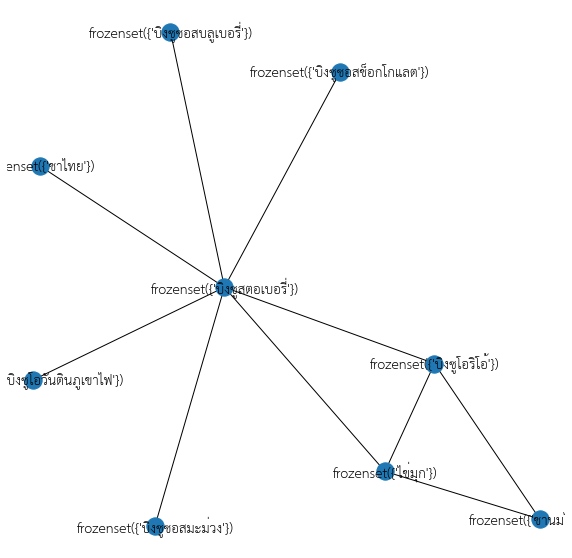

In [806]:
import networkx as nx 
import matplotlib.pyplot as plt 
import pandas as pd
fig, ax=plt.subplots(figsize=(10,10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New',font_size=13)
plt.show()

In [807]:
#SingleITEM
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct
Transaction_matrix_df1=transaction_matrix (UserNumber,Quantity,NameOfProduct,single)
frequent_itemsets1 = apriori(Transaction_matrix_df1,min_support=0.01,use_colnames=True)
rules = association_rules(frequent_itemsets1,metric="confidence",min_threshold=0.001)
print("FOR Single TRANSACTION")
rules.sort_values(by='support', ascending=False)

FOR Single TRANSACTION


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [808]:
#GroupITEM
Transaction_matrix_df2=transaction_matrix (UserNumber,Quantity,NameOfProduct,group)
frequent_itemsets2 = apriori(Transaction_matrix_df2,min_support=0.01,use_colnames=True)
rules = association_rules(frequent_itemsets2,metric="confidence",min_threshold=0.1)
print("FOR Group TRANSACTION")
rules.sort_values(by='support', ascending=False)



FOR Group TRANSACTION


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(ชานมไต้หวัน),(ไข่มุก),0.278894,0.319095,0.208543,0.747748,2.343335,0.119549,2.699300
14,(ไข่มุก),(ชานมไต้หวัน),0.319095,0.278894,0.208543,0.653543,2.343335,0.119549,2.081373
31,(บิงซูโอริโอ้),(บิงซูสตอเบอรี่),0.190955,0.359296,0.087940,0.460526,1.281745,0.019330,1.187646
32,(บิงซูสตอเบอรี่),(บิงซูโอริโอ้),0.359296,0.190955,0.087940,0.244755,1.281745,0.019330,1.071236
21,(บิงซูโอวันตินภูเขาไฟ),(บิงซูสตอเบอรี่),0.178392,0.359296,0.065327,0.366197,1.019206,0.001231,1.010888
...,...,...,...,...,...,...,...,...,...
45,(โรตีฝอยทองช็อกโกแลต),(บิงซูสตอเบอรี่),0.025126,0.359296,0.010050,0.400000,1.113287,0.001023,1.067839
44,(นมอัญชันมะลิ),(บิงซูสตอเบอรี่),0.032663,0.359296,0.010050,0.307692,0.856374,-0.001686,0.925461
20,(นมอัญชันมะลิ),(ไข่มุก),0.032663,0.319095,0.010050,0.307692,0.964264,-0.000372,0.983529
19,(โกโก้),(ไข่มุก),0.035176,0.319095,0.010050,0.285714,0.895388,-0.001174,0.953266


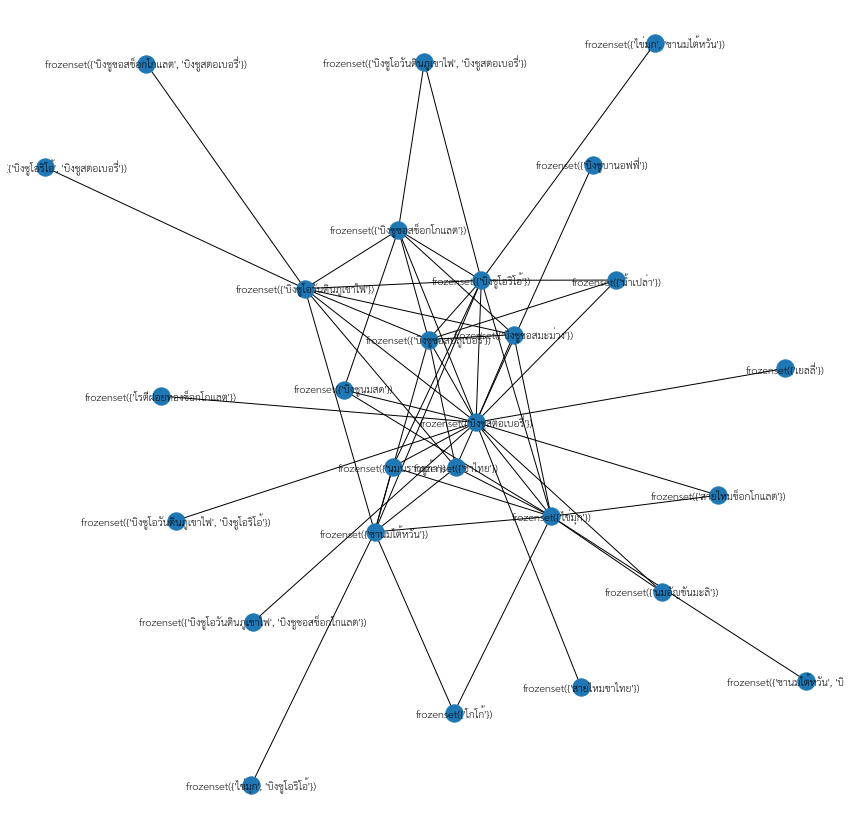

In [809]:

fig, ax=plt.subplots(figsize=(15,15))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New',font_size=10)
plt.show()

In [810]:
#alltransaction
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="หมวดสินค้า"#NameOfProduct
Transaction_matrix_df_type=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction)
frequent_itemsets_type = fpgrowth(Transaction_matrix_df_type,min_support=0.05,use_colnames=True)

rules = association_rules(frequent_itemsets_type,metric="confidence",min_threshold=0.01)
print("FOR ALL TRANSACTION")
rules.sort_values(by='support', ascending=False)



FOR ALL TRANSACTION


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ชา),(topping),0.244406,0.127367,0.079174,0.323944,2.543396,0.048045,1.290770
1,(topping),(ชา),0.127367,0.244406,0.079174,0.621622,2.543396,0.048045,1.996926


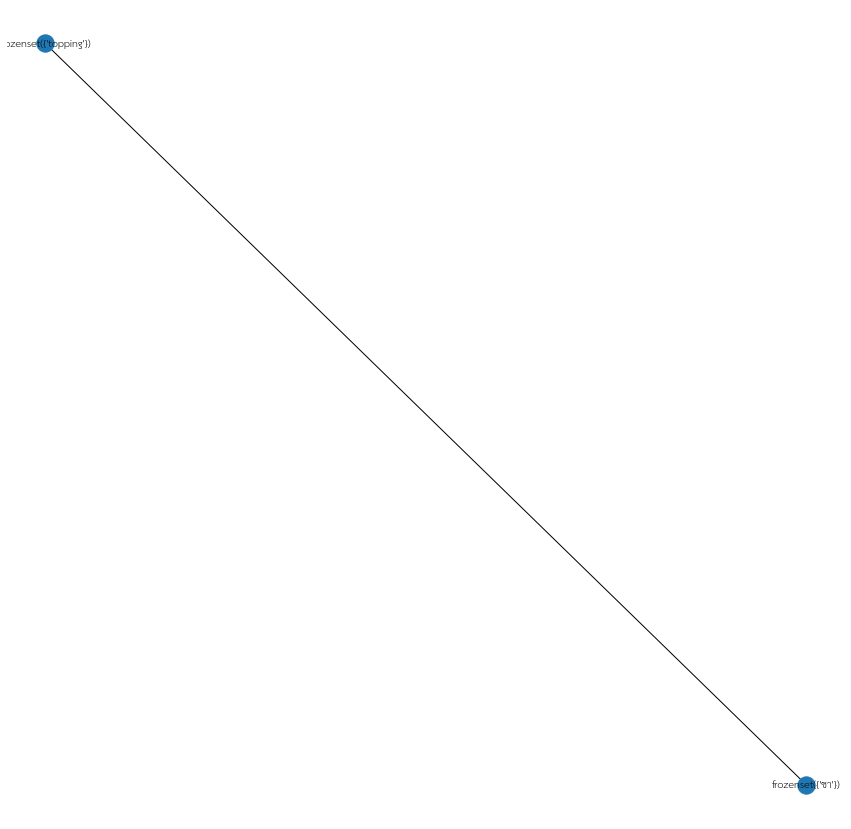

0.0


In [811]:
fig, ax=plt.subplots(figsize=(15,15))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New',font_size=10)
plt.show()
print(nx.average_clustering(GA))

In [812]:
#group transaction
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="หมวดสินค้า"#NameOfProduct
Transaction_matrix_df_type=transaction_matrix (UserNumber,Quantity,NameOfProduct,group)
frequent_itemsets_type = fpgrowth(Transaction_matrix_df_type,min_support=0.05,use_colnames=True)

rules = association_rules(frequent_itemsets_type,metric="confidence",min_threshold=0.01)
print("FOR group TRANSACTION")
rules.sort_values(by='support', ascending=False)


FOR group TRANSACTION


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ชา),(topping),0.376884,0.364322,0.231156,0.613333,1.683494,0.093849,1.643996
3,(topping),(ชา),0.364322,0.376884,0.231156,0.634483,1.683494,0.093849,1.704750
4,(Take away),(ชา),0.557789,0.376884,0.120603,0.216216,0.573694,-0.089619,0.795010
5,(ชา),(Take away),0.376884,0.557789,0.120603,0.320000,0.573694,-0.089619,0.650310
0,(Take away),(topping),0.557789,0.364322,0.103015,0.184685,0.506928,-0.100199,0.779672
1,(topping),(Take away),0.364322,0.557789,0.103015,0.282759,0.506928,-0.100199,0.616544
6,(ชา),(เครื่องดื่ม),0.376884,0.198492,0.070352,0.186667,0.940422,-0.004457,0.985460
7,(เครื่องดื่ม),(ชา),0.198492,0.376884,0.070352,0.354430,0.940422,-0.004457,0.965218
8,(Take away),(เครื่องดื่ม),0.557789,0.198492,0.067839,0.121622,0.612727,-0.042878,0.912486
9,(เครื่องดื่ม),(Take away),0.198492,0.557789,0.067839,0.341772,0.612727,-0.042878,0.671821


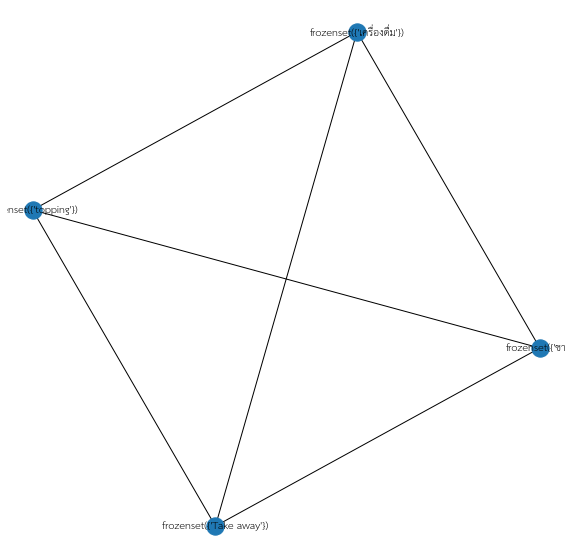

In [813]:
fig, ax=plt.subplots(figsize=(10,10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New',font_size=10)
plt.show()

In [814]:
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction)

frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.01,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.01)
print("FOR ALL TRANSACTION")
rules.sort_values(by='support', ascending=False)

FOR ALL TRANSACTION


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(ชานมไต้หวัน),(ไข่มุก),0.146299,0.111876,0.071429,0.488235,4.364072,0.055061,1.735415
18,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299
1,(บิงซูสตอเบอรี่),(บิงซูโอริโอ้),0.264200,0.150602,0.030120,0.114007,0.757003,-0.009669,0.958695
0,(บิงซูโอริโอ้),(บิงซูสตอเบอรี่),0.150602,0.264200,0.030120,0.200000,0.757003,-0.009669,0.919750
4,(บิงซูโอวันตินภูเขาไฟ),(บิงซูสตอเบอรี่),0.112737,0.264200,0.022375,0.198473,0.751225,-0.007410,0.917999
5,(บิงซูสตอเบอรี่),(บิงซูโอวันตินภูเขาไฟ),0.264200,0.112737,0.022375,0.084691,0.751225,-0.007410,0.969359
11,(บิงซูสตอเบอรี่),(บิงซูซอสช็อกโกแลต),0.264200,0.083477,0.016351,0.061889,0.741395,-0.005703,0.976988
10,(บิงซูซอสช็อกโกแลต),(บิงซูสตอเบอรี่),0.083477,0.264200,0.016351,0.195876,0.741395,-0.005703,0.915034
6,(บิงซูซอสบลูเบอรี่),(บิงซูสตอเบอรี่),0.062823,0.264200,0.015491,0.246575,0.933292,-0.001107,0.976608
7,(บิงซูสตอเบอรี่),(บิงซูซอสบลูเบอรี่),0.264200,0.062823,0.015491,0.058632,0.933292,-0.001107,0.995548


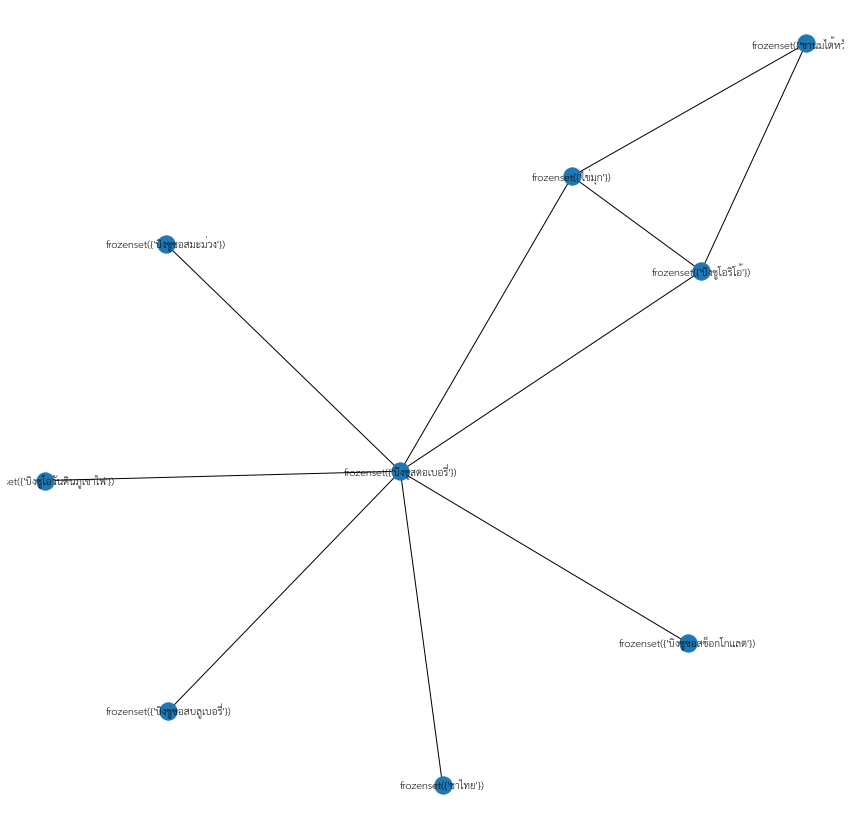

0.26455026455026454


In [815]:
fig, ax=plt.subplots(figsize=(15,15))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New',font_size=10)
plt.show()
print(nx.average_clustering(GA))

# ADVANCE ASSOCIATION RULES

In [820]:
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.000000001,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.00000001)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
115,(ชานมไต้หวัน),(ไข่มุก),0.146299,0.111876,0.071429,0.488235,4.364072,0.055061,1.735415
114,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299
1,(บิงซูสตอเบอรี่),(บิงซูโอริโอ้),0.264200,0.150602,0.030120,0.114007,0.757003,-0.009669,0.958695
0,(บิงซูโอริโอ้),(บิงซูสตอเบอรี่),0.150602,0.264200,0.030120,0.200000,0.757003,-0.009669,0.919750
8,(บิงซูโอวันตินภูเขาไฟ),(บิงซูสตอเบอรี่),0.112737,0.264200,0.022375,0.198473,0.751225,-0.007410,0.917999
...,...,...,...,...,...,...,...,...,...
1061,(ชานมไต้หวัน),"(บิงซูนมสด, บิงซูซอสมะม่วง)",0.146299,0.001721,0.000861,0.005882,3.417647,0.000609,1.004186
1060,"(บิงซูนมสด, บิงซูซอสมะม่วง)",(ชานมไต้หวัน),0.001721,0.146299,0.000861,0.500000,3.417647,0.000609,1.707401
1059,"(ชานมไต้หวัน, บิงซูซอสมะม่วง)",(บิงซูนมสด),0.002582,0.061102,0.000861,0.333333,5.455399,0.000703,1.408348
1058,"(ชานมไต้หวัน, บิงซูนมสด)",(บิงซูซอสมะม่วง),0.001721,0.043890,0.000861,0.500000,11.392157,0.000785,1.912220


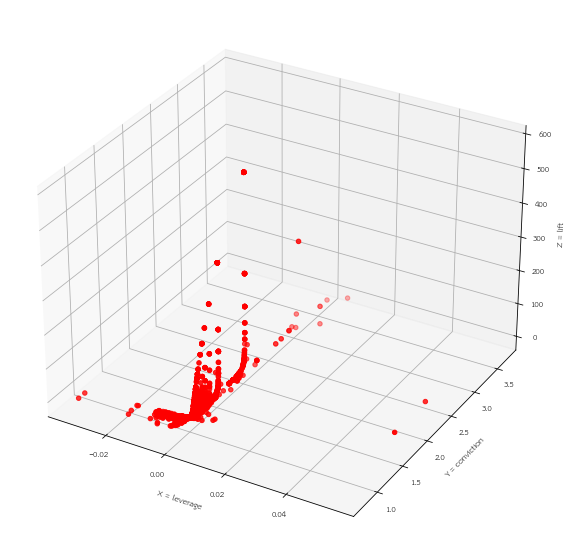

In [821]:
from mpl_toolkits.mplot3d import Axes3D
x=rules["leverage"]
y=rules["conviction"]
z=rules["lift"]
#plt.scatter(x, y)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')




ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X = leverage ')
ax.set_ylabel('Y = conviction')
ax.set_zlabel('Z = lift')

plt.show()

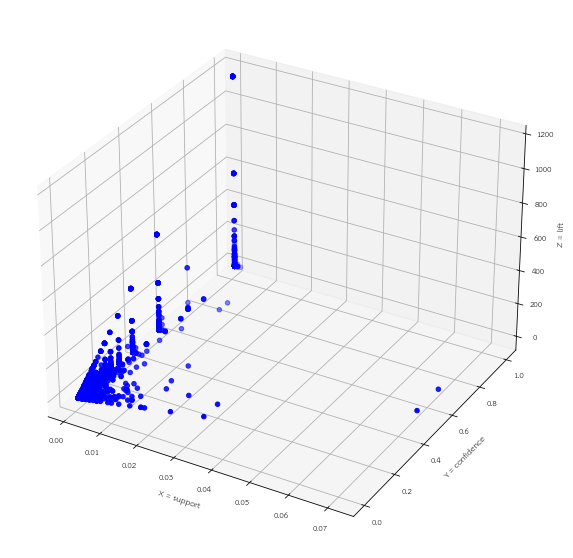

In [822]:
from mpl_toolkits.mplot3d import Axes3D
x=rules["support"]
y=rules["confidence"]
z=rules["lift"]
#plt.scatter(x, y)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')




ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('X = support ')
ax.set_ylabel('Y = confidence')
ax.set_zlabel('Z = lift')

plt.show()

In [823]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000
mean,0.047065,0.047065,0.001345,0.279967,49.187422,0.000393,inf
std,0.069473,0.069473,0.002568,0.353546,152.121320,0.002360,NaN
min,0.000861,0.000861,0.000861,0.003257,0.115852,-0.033489,0.759536
25%,0.002582,0.002582,0.000861,0.017269,1.900249,0.000516,1.005958
50%,0.012048,0.012048,0.000861,0.090909,6.315217,0.000747,1.057912
75%,0.067986,0.067986,0.000861,0.500000,21.518519,0.000841,1.698795
max,0.264200,0.264200,0.071429,1.000000,1162.000000,0.055061,inf


In [824]:
lev0=rules["leverage"]
lev0=lev0.loc[lev0<=0.0000003]
lev0=lev0.loc[lev0>=(-0.00003)]
lev0

182    -0.000008
183    -0.000008
320    -0.000001
321    -0.000001
544    -0.000013
545    -0.000013
556    -0.000006
557    -0.000006
574    -0.000025
575    -0.000025
628    -0.000025
629    -0.000025
964    -0.000006
965    -0.000006
1190    0.000000
1195    0.000000
Name: leverage, dtype: float64

In [825]:
z1=(z.loc[z>=1])
z1= pd.DataFrame(z1)
z1

,lift
6,1.335888
7,1.335888
28,1.261672
29,1.261672
32,1.103963
...,...
2569,14.708861
2570,64.555556
2571,68.352941
2572,83.000000


In [826]:
z2=z.drop(z1.index) 
y2=y.drop(z1.index) 


Text(0, 0.5, 'lift')

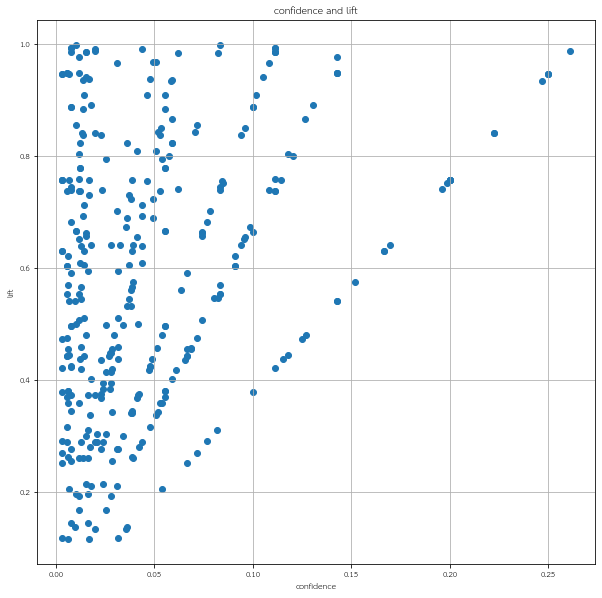

In [827]:
plt.figure(figsize=(10,10))
plt.scatter((y2),(z2))
plt.grid()
plt.title('confidence and lift') 
plt.xlabel('confidence')
plt.ylabel('lift')

Text(0, 0.5, 'lift')

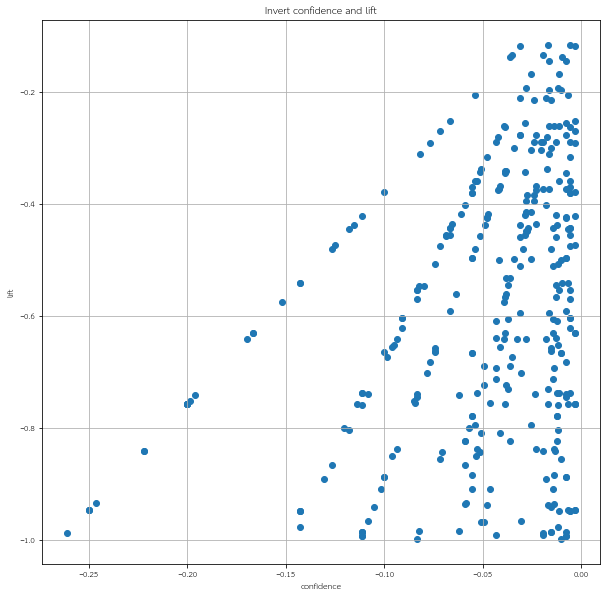

In [828]:
plt.figure(figsize=(10,10))
plt.scatter((-1*y2),(-1*z2))
plt.grid()
plt.title('Invert confidence and lift') 
plt.xlabel('confidence')
plt.ylabel('lift')

In [829]:
def pareto_frontier_multi(myArray):
    # Sort on first dimension
    myArray = myArray[myArray[:,0].argsort()]
    # Add first row to pareto_frontier
    pareto_frontier = myArray[0:1,:]
    # Test next row against the last row in pareto_frontier
    for row in myArray[1:,:]:
        if sum([row[x] >= pareto_frontier[-1][x]
                for x in range(len(row))]) == len(row):
            # If it is better on all features add the row to pareto_frontier
            pareto_frontier = np.concatenate((pareto_frontier, [row]))
    return pareto_frontier

def simple_cull(inputPoints, dominates):
    paretoPoints = set()
    candidateRowNr = 0
    dominatedPoints = set()
    while True:
        candidateRow = inputPoints[candidateRowNr]
        inputPoints.remove(candidateRow)
        rowNr = 0
        nonDominated = True
        while len(inputPoints) != 0 and rowNr < len(inputPoints):
            row = inputPoints[rowNr]
            if dominates(candidateRow, row):
                # If it is worse on all features remove the row from the array
                inputPoints.remove(row)
                dominatedPoints.add(tuple(row))
            elif dominates(row, candidateRow):
                nonDominated = False
                dominatedPoints.add(tuple(candidateRow))
                rowNr += 1
            else:
                rowNr += 1

        if nonDominated:
            # add the non-dominated point to the Pareto frontier
            paretoPoints.add(tuple(candidateRow))

        if len(inputPoints) == 0:
            break
    return paretoPoints, dominatedPoints

def dominates(row, candidateRow):
    return sum([row[x] >= candidateRow[x] for x in range(len(row))]) == len(row)  

In [837]:
inputPoint=np.zeros(shape=(len(z2),2))
ii=0
for i in z2.index :
    xxx=y2[i]*(-1)
    zzz=z2[i]*(-1)
    inputPoint[ii]=[xxx,zzz]
    ii=ii+1
    
inputPoints=inputPoint.tolist()
#print(inputPoints)
    
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates)

print ("*"*8 + " non-dominated answers " + ("*"*8))
for p in paretoPoints:
    print (p)
print("_____________________________________________")
print("_____________________________________________")
print("_____________________________________________")
print ("*"*8 + " dominated answers " + ("*"*8))
for p in dominatedPoints:
    print (p)
    
print("Pareto Front")
print(paretoPoints)
print(len(paretoPoints))
print(len(dominatedPoints))

******** non-dominated answers ********
(-0.0032573289902280136, -0.11828175895765473)
(-0.01694915254237288, -0.11585244267198405)
(-0.005882352941176471, -0.11585244267198407)
_____________________________________________
_____________________________________________
_____________________________________________
******** dominated answers ********
(-0.1518987341772152, -0.5749391827815117)
(-0.14285714285714288, -0.5407166123778503)
(-0.09090909090909091, -0.6213903743315509)
(-0.030769230769230767, -0.7010558069381598)
(-0.006514657980456027, -0.7570032573289904)
(-0.08333333333333333, -0.5533333333333332)
(-0.11111111111111112, -0.7377777777777778)
(-0.11111111111111112, -0.7594771241830066)
(-0.01639344262295082, -0.3735133397621344)
(-0.01639344262295082, -0.5952868852459017)
(-0.046153846153846156, -0.9089960886571057)
(-0.022900763358778626, -0.37479840877325016)
(-0.08, -0.5468235294117647)
(-0.0411764705882353, -0.6554391619661564)
(-0.038167938931297704, -0.34116265413975333

In [838]:
idxx=[]
for i in y.index:
    xxx1=y[i]*(-1)
    xxx2=z[i]*(-1)
    xxx3=(xxx1,xxx2)in paretoPoints
    print(xxx3,i)
    if xxx3 == True :
        idxx.append(i)

    


False 0
False 1
False 2
False 3
False 4
False 5
False 6
False 7
False 8
False 9
False 10
False 11
False 12
True 13
False 14
False 15
False 16
False 17
False 18
False 19
False 20
False 21
False 22
False 23
False 24
False 25
False 26
False 27
False 28
False 29
False 30
False 31
False 32
False 33
False 34
False 35
False 36
False 37
False 38
False 39
False 40
False 41
False 42
False 43
False 44
False 45
False 46
False 47
False 48
False 49
False 50
False 51
False 52
False 53
False 54
False 55
False 56
False 57
False 58
False 59
False 60
False 61
False 62
False 63
False 64
False 65
False 66
False 67
False 68
False 69
False 70
False 71
False 72
False 73
False 74
False 75
False 76
False 77
False 78
False 79
False 80
False 81
False 82
False 83
False 84
False 85
False 86
False 87
False 88
False 89
False 90
False 91
False 92
False 93
False 94
False 95
False 96
False 97
False 98
False 99
False 100
False 101
False 102
False 103
False 104
False 105
False 106
False 107
False 108
False 109
False 110
F

False 923
False 924
False 925
False 926
False 927
False 928
False 929
False 930
False 931
False 932
False 933
False 934
False 935
False 936
False 937
False 938
False 939
False 940
False 941
False 942
False 943
False 944
False 945
False 946
False 947
False 948
False 949
False 950
False 951
False 952
False 953
False 954
False 955
False 956
False 957
False 958
False 959
False 960
False 961
False 962
False 963
False 964
False 965
False 966
False 967
False 968
False 969
False 970
False 971
False 972
False 973
False 974
False 975
False 976
False 977
False 978
False 979
False 980
False 981
False 982
False 983
False 984
False 985
False 986
False 987
False 988
False 989
False 990
False 991
False 992
False 993
False 994
False 995
False 996
False 997
False 998
False 999
False 1000
False 1001
False 1002
False 1003
False 1004
False 1005
False 1006
False 1007
False 1008
False 1009
False 1010
False 1011
False 1012
False 1013
False 1014
False 1015
False 1016
False 1017
False 1018
False 1019
False 1020

False 2543
False 2544
False 2545
False 2546
False 2547
False 2548
False 2549
False 2550
False 2551
False 2552
False 2553
False 2554
False 2555
False 2556
False 2557
False 2558
False 2559
False 2560
False 2561
False 2562
False 2563
False 2564
False 2565
False 2566
False 2567
False 2568
False 2569
False 2570
False 2571
False 2572
False 2573


In [839]:
print(idxx)
print("len",len(idxx))

[13, 132, 133]
len 3


In [842]:
print("Unbundle")
rules.iloc[idxx][:]


Unbundle


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(บิงซูสตอเบอรี่),(ชาเขียวมัทฉะ),0.264200,0.027539,0.000861,0.003257,0.118282,-0.006415,0.975639
132,(ชานมไต้หวัน),(สายไหมช็อกโกแลต),0.146299,0.050775,0.000861,0.005882,0.115852,-0.006568,0.954842
133,(สายไหมช็อกโกแลต),(ชานมไต้หวัน),0.050775,0.146299,0.000861,0.016949,0.115852,-0.006568,0.868419


In [841]:
rules.iloc[242][:]

antecedents           (นมชีสพ่นไฟ)
consequents             (น้ำเปล่า)
antecedent support      0.00688468
consequent support       0.0232358
support                0.000860585
confidence                   0.125
lift                       5.37963
leverage               0.000700614
conviction                  1.1163
Name: 242, dtype: object

In [957]:
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.01,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.01)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(ชานมไต้หวัน),(ไข่มุก),0.146299,0.111876,0.071429,0.488235,4.364072,0.055061,1.735415
18,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299
1,(บิงซูสตอเบอรี่),(บิงซูโอริโอ้),0.264200,0.150602,0.030120,0.114007,0.757003,-0.009669,0.958695
0,(บิงซูโอริโอ้),(บิงซูสตอเบอรี่),0.150602,0.264200,0.030120,0.200000,0.757003,-0.009669,0.919750
4,(บิงซูโอวันตินภูเขาไฟ),(บิงซูสตอเบอรี่),0.112737,0.264200,0.022375,0.198473,0.751225,-0.007410,0.917999
5,(บิงซูสตอเบอรี่),(บิงซูโอวันตินภูเขาไฟ),0.264200,0.112737,0.022375,0.084691,0.751225,-0.007410,0.969359
11,(บิงซูสตอเบอรี่),(บิงซูซอสช็อกโกแลต),0.264200,0.083477,0.016351,0.061889,0.741395,-0.005703,0.976988
10,(บิงซูซอสช็อกโกแลต),(บิงซูสตอเบอรี่),0.083477,0.264200,0.016351,0.195876,0.741395,-0.005703,0.915034
6,(บิงซูซอสบลูเบอรี่),(บิงซูสตอเบอรี่),0.062823,0.264200,0.015491,0.246575,0.933292,-0.001107,0.976608
7,(บิงซูสตอเบอรี่),(บิงซูซอสบลูเบอรี่),0.264200,0.062823,0.015491,0.058632,0.933292,-0.001107,0.995548


In [958]:

x=rules["support"]
y=rules["confidence"]
z=rules["lift"]

z1=(z.loc[z<=1])
z1= pd.DataFrame(z1)

z2=z.drop(z1.index) 
y2=y.drop(z1.index) 

inputPoint=np.zeros(shape=(len(z2),2))
ii=0
for i in z2.index :
    xxx=y2[i]
    zzz=z2[i]
    inputPoint[ii]=[xxx,zzz]
    ii=ii+1
    
inputPoints=inputPoint.tolist()
#print(inputPoints)
    
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates)

print ("*"*8 + " non-dominated answers " + ("*"*8))
for p in paretoPoints:
    print (p)
print("_____________________________________________")
print("_____________________________________________")
print("_____________________________________________")
print ("*"*8 + " dominated answers " + ("*"*8))
for p in dominatedPoints:
    print (p)
    
print("Pareto Front")
print(paretoPoints)
print(len(paretoPoints))
print(len(dominatedPoints))

idxx=[]
for i in y.index:
    xxx1=y[i]
    xxx2=z[i]
    xxx3=(xxx1,xxx2)in paretoPoints
    print(xxx3,i)
    if xxx3 == True :
        idxx.append(i)
        
print(idxx)
print("len",len(idxx))

print("Bundle")
rules.iloc[idxx][:]

******** non-dominated answers ********
(0.6384615384615384, 4.364072398190045)
_____________________________________________
_____________________________________________
_____________________________________________
******** dominated answers ********
(0.05863192182410424, 1.3358881011688064)
(0.35294117647058826, 1.3358881011688064)
(0.48823529411764705, 4.364072398190045)
Pareto Front
{(0.6384615384615384, 4.364072398190045)}
1
3
False 0
False 1
False 2
False 3
False 4
False 5
False 6
False 7
False 8
False 9
False 10
False 11
False 12
False 13
False 14
False 15
False 16
False 17
True 18
False 19
[18]
len 1
Bundle


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299


Text(0, 0.5, 'lift')

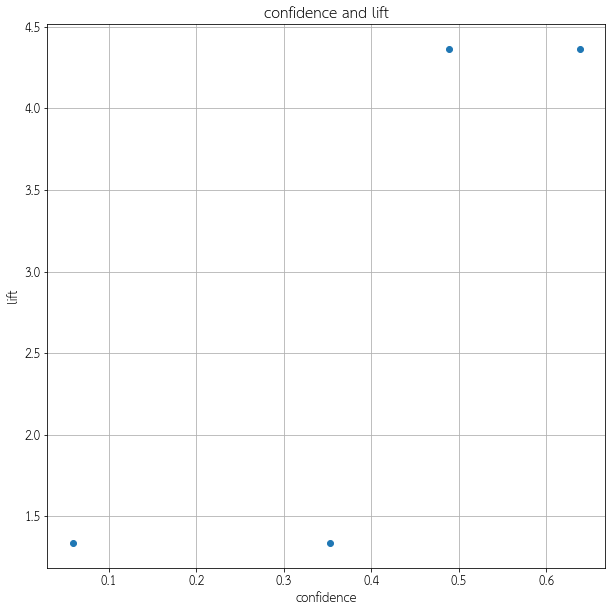

In [959]:
plt.figure(figsize=(10,10))
plt.scatter((y2),(z2))
plt.grid()
plt.title('confidence and lift') 
plt.xlabel('confidence')
plt.ylabel('lift')

# Association แยกตามช่วงเวลา

In [960]:
transaction

,หมายเลขใบเสร็จ / ID,ชื่อเมนู,ประเภทการสั่ง,จำนวน,ราคาต่อหน่วย,ยอดก่อนลด,ส่วนลดทั้งหมด,ส่วนลดทั้งหมด %,ราคาสุทธิ,ประเภทการชำระเงิน,...,หมวดสินค้า,Day,Month,Year,เวลาที่ชำระเงิน,Hour,Minute,WeekDay,R_menu,Ext_menu
0,SFDVJ,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,...,Take away,3,2,2020,11:19:00,11,19,monday,บิงซูสตอเบอรี่,-
1,SFDVJ,(TA)บิงซูโอริโอ้,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,...,Take away,3,2,2020,11:19:00,11,19,monday,บิงซูโอริโอ้,-
2,CIOB4,(TA)บิงซูซอสสตอเบอรี่,Dine-In,1,45.0,45.0,0.0,0.00,45.0,Cash,...,Take away,3,2,2020,14:11:00,14,11,monday,บิงซูสตอเบอรี่,-
3,WBSMD,บิงซูสตอเบอรี่,Dine-In,1,109.0,109.0,0.0,0.00,109.0,Cash,...,ถ้วยใหญ่,3,2,2020,14:53:00,14,53,monday,บิงซูสตอเบอรี่,-
4,1EI74,ชานมไต้หวัน,Dine-In,1,30.0,30.0,5.0,16.67,25.0,Cash,...,ชา,3,2,2020,16:07:00,16,7,monday,ชานมไต้หวัน,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,S3TRM,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,29,9,2020,17:58:00,17,58,tuesday,ชานมไต้,ไข่มุก
1708,AXEJV,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,30,9,2020,15:52:00,15,52,wednesday,ชานมไต้,ไข่มุก
1709,KES4R,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,30,9,2020,16:43:00,16,43,wednesday,ชานมไต้,ไข่มุก
1710,FQCFH,ชานมไต้หวันไข่มุก x 1,Dine-In,1,35.0,35.0,0.0,0.00,35.0,Cash,...,ชา,30,9,2020,16:44:00,16,44,wednesday,ชานมไต้,ไข่มุก


In [961]:
transaction_Hour=transaction.groupby(by=["หมายเลขใบเสร็จ / ID",'Hour',"R_menu"] ,as_index=False)["จำนวน"].sum()
transaction_Hour

,หมายเลขใบเสร็จ / ID,Hour,R_menu,จำนวน
0,0016J,19,บิงซูซอสมะม่วง,1
1,0016J,19,ไข่มุก,1
2,00UFA,19,นมบราวชูก้า,1
3,01ZEX,13,บิงซูโอวันตินภูเขาไฟ,1
4,01ZEX,13,มาร์ชเมลโล่,1
...,...,...,...,...
1705,ZTPRG,16,นมบราวชูก้า,1
1706,ZTUNR,12,บิงซูสตอเบอรี่,2
1707,ZTUNR,12,โรตีฝอยทองช็อกโกแลต,1
1708,ZV6I7,14,บิงซูสตอเบอรี่,1


In [962]:
transaction1=transaction_Hour.loc[transaction_Hour["Hour"]==11]
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#Assosiation rules
Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction1)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.03,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ไข่มุก),(ชานมไต้หวัน),0.078947,0.184211,0.052632,0.666667,3.619048,0.038089,2.447368
1,(ชานมไต้หวัน),(ไข่มุก),0.184211,0.078947,0.052632,0.285714,3.619048,0.038089,1.289474


In [963]:
transaction1=transaction_Hour.loc[transaction_Hour["Hour"]==12]
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#Assosiation rules
Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction1)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.03,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ไข่มุก),(ชานมไต้หวัน),0.093220,0.194915,0.076271,0.818182,4.197628,0.058101,4.427966
1,(ชานมไต้หวัน),(ไข่มุก),0.194915,0.093220,0.076271,0.391304,4.197628,0.058101,1.489709
2,(บิงซูนมสด),(บิงซูสตอเบอรี่),0.110169,0.262712,0.033898,0.307692,1.171216,0.004955,1.064972
3,(บิงซูสตอเบอรี่),(บิงซูนมสด),0.262712,0.110169,0.033898,0.129032,1.171216,0.004955,1.021657


In [964]:
transaction1=transaction_Hour.loc[transaction_Hour["Hour"]==13]
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#Assosiation rules
Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction1)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.03,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ไข่มุก),(ชานมไต้หวัน),0.154762,0.267857,0.125000,0.807692,3.015385,0.083546,3.807143
3,(ชานมไต้หวัน),(ไข่มุก),0.267857,0.154762,0.125000,0.466667,3.015385,0.083546,1.584821
0,(ชานมไต้หวัน),(ชาไทย),0.267857,0.119048,0.035714,0.133333,1.120000,0.003827,1.016484
1,(ชาไทย),(ชานมไต้หวัน),0.119048,0.267857,0.035714,0.300000,1.120000,0.003827,1.045918


In [965]:
transaction1=transaction_Hour.loc[transaction_Hour["Hour"]==14]
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#Assosiation rules
Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction1)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.025,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ไข่มุก),(ชานมไต้หวัน),0.056738,0.092199,0.028369,0.500000,5.423077,0.023138,1.815603
1,(ชานมไต้หวัน),(ไข่มุก),0.092199,0.056738,0.028369,0.307692,5.423077,0.023138,1.362490


In [966]:
transaction1=transaction_Hour.loc[transaction_Hour["Hour"]==15]
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#Assosiation rules
Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction1)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.03,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ไข่มุก),(ชานมไต้หวัน),0.136905,0.172619,0.083333,0.608696,3.526237,0.059701,2.114418
3,(ชานมไต้หวัน),(ไข่มุก),0.172619,0.136905,0.083333,0.482759,3.526237,0.059701,1.668651
0,(ไข่มุก),(บิงซูสตอเบอรี่),0.136905,0.255952,0.041667,0.304348,1.189080,0.006626,1.069568
1,(บิงซูสตอเบอรี่),(ไข่มุก),0.255952,0.136905,0.041667,0.162791,1.189080,0.006626,1.030919


In [967]:
transaction1=transaction_Hour.loc[transaction_Hour["Hour"]==16]
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#Assosiation rules
Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction1)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.03,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(บิงซูโอริโอ้),(บิงซูสตอเบอรี่),0.172840,0.246914,0.061728,0.357143,1.446429,0.019052,1.171468
1,(บิงซูสตอเบอรี่),(บิงซูโอริโอ้),0.246914,0.172840,0.061728,0.250000,1.446429,0.019052,1.102881
4,(ไข่มุก),(ชานมไต้หวัน),0.111111,0.104938,0.055556,0.500000,4.764706,0.043896,1.790123
5,(ชานมไต้หวัน),(ไข่มุก),0.104938,0.111111,0.055556,0.529412,4.764706,0.043896,1.888889
2,(บิงซูซอสบลูเบอรี่),(บิงซูสตอเบอรี่),0.117284,0.246914,0.030864,0.263158,1.065789,0.001905,1.022046
3,(บิงซูสตอเบอรี่),(บิงซูซอสบลูเบอรี่),0.246914,0.117284,0.030864,0.125000,1.065789,0.001905,1.008818


In [968]:
transaction1=transaction_Hour.loc[transaction_Hour["Hour"]==17]
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#Assosiation rules
Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction1)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.03,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(บิงซูโอริโอ้),(บิงซูสตอเบอรี่),0.224138,0.258621,0.060345,0.269231,1.041026,0.002378,1.014519
3,(บิงซูสตอเบอรี่),(บิงซูโอริโอ้),0.258621,0.224138,0.060345,0.233333,1.041026,0.002378,1.011994
0,(ไข่มุก),(ชานมไต้หวัน),0.103448,0.068966,0.034483,0.333333,4.833333,0.027348,1.396552
1,(ชานมไต้หวัน),(ไข่มุก),0.068966,0.103448,0.034483,0.500000,4.833333,0.027348,1.793103


In [969]:
transaction1=transaction_Hour.loc[transaction_Hour["Hour"]==18]
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#Assosiation rules
Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction1)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.03,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ไข่มุก),(ชานมไต้หวัน),0.129630,0.111111,0.083333,0.642857,5.785714,0.068930,2.488889
1,(ชานมไต้หวัน),(ไข่มุก),0.111111,0.129630,0.083333,0.750000,5.785714,0.068930,3.481481
2,(ไข่มุก),(บิงซูโอริโอ้),0.129630,0.138889,0.037037,0.285714,2.057143,0.019033,1.205556
3,(บิงซูโอริโอ้),(ไข่มุก),0.138889,0.129630,0.037037,0.266667,2.057143,0.019033,1.186869


In [970]:
transaction1=transaction_Hour.loc[transaction_Hour["Hour"]==19]
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#Assosiation rules
Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction1)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.03,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ไข่มุก),(ชานมไต้หวัน),0.088710,0.088710,0.064516,0.727273,8.198347,0.056647,3.341398
1,(ชานมไต้หวัน),(ไข่มุก),0.088710,0.088710,0.064516,0.727273,8.198347,0.056647,3.341398
2,(บิงซูซอสช็อกโกแลต),(บิงซูสตอเบอรี่),0.088710,0.298387,0.048387,0.545455,1.828010,0.021917,1.543548
3,(บิงซูสตอเบอรี่),(บิงซูซอสช็อกโกแลต),0.298387,0.088710,0.048387,0.162162,1.828010,0.021917,1.087669


In [971]:
transaction1=transaction_Hour.loc[transaction_Hour["Hour"]==20]
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#Assosiation rules
Transaction_matrix_df=transaction_matrix (UserNumber,Quantity,NameOfProduct,transaction1)
frequent_itemsets = apriori(Transaction_matrix_df,min_support=0.2,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ไข่มุก),(ชานมไต้หวัน),0.307692,0.230769,0.230769,0.75,3.25,0.159763,3.076923
1,(ชานมไต้หวัน),(ไข่มุก),0.230769,0.307692,0.230769,1.00,3.25,0.159763,inf


# Correlation 

In [972]:
def transaction_count (UserNumber,Quantity,NameOfProduct,transaction):
    #May be Change
    NameInvoiceNo=UserNumber
    Count=Quantity
    Menu=NameOfProduct
    InvoiceNo = transaction[NameInvoiceNo].unique() #
    Description = transaction[Menu].unique()
    
    #create empty Zeros Dataframe
    df = pd.DataFrame(np.nan, index=InvoiceNo, columns=Description)
    df.insert(0,NameInvoiceNo,InvoiceNo, True)
    df.reset_index()
    df1=df.iloc[:,1:]
    where_are_NaNs = np.isnan(df1)
    df1[where_are_NaNs] = 0
    #create Transaction Matrix
    Transaction_matrix = df1
    bill=transaction
    Transaction_matrix=Transaction_matrix.reset_index()
    Transaction_matrix=Transaction_matrix.rename(columns={"index":NameInvoiceNo})
    
    #create Bill
    for i in range(len(Transaction_matrix)):
        billtest=bill.loc[bill[NameInvoiceNo]==Transaction_matrix.iloc[i,0]]
        billDe=[]
        for j in range(len(billtest)):
            col=billtest.columns.get_loc(Menu)
            billDe.append(billtest.iloc[j,col]) 
        bills=[] 
        for k in range (len(billDe)):
            bills.append(Transaction_matrix.columns.get_loc(billDe[k]))
        cc=billtest.columns.get_loc(Count)    
        for L in range (len(bills)):
            Transaction_matrix.iloc[i,bills[L]]=billtest.iloc[L,cc]
    
        
    Transaction_count=Transaction_matrix.drop(columns=[NameInvoiceNo])
    
    return Transaction_count

In [973]:
#ALL transaction 
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct

#transaction_count_df=transaction_count(UserNumber,Quantity,NameOfProduct,transaction)
transaction_count_df=transaction_matrix(UserNumber,Quantity,NameOfProduct,transaction)
corrMatrix=transaction_count_df.corr()
corrMatrix

,บิงซูสตอเบอรี่,บิงซูโอริโอ้,ชานมไต้หวัน,บิงซูนมสด,บิงซูซอสมะม่วง,บิงซูโอวันตินภูเขาไฟ,สายไหมชาชีสพ่นไฟ,คอนเฟลก,นมชีสพ่นไฟ,บิงซูซอสบลูเบอรี่,...,เยลลี่,ชาชีสพ่นไฟ,บิงซูฝอยทองซอสช็อกโกแลต,สายไหมชาเขียว,กล้วย,มาร์ชเมลโล่,ชาเขียวมัทฉะชีสพ่นไฟ,บิงซูฝอยทองช็อกโกแลต,ชานมไต้,สายไหมชานมไต้หวัน
บิงซูสตอเบอรี่,1.000000,-0.061312,-0.214921,-0.079521,0.043123,-0.053137,-0.052941,-0.024881,-0.049892,-0.010349,...,0.062361,0.022207,-0.035218,-0.030392,-0.017586,0.022207,-0.017586,-0.017586,-0.051234,-0.024881
บิงซูโอริโอ้,-0.061312,1.000000,-0.078994,-0.077280,-0.066725,-0.081624,-0.037202,0.040563,0.023139,-0.059439,...,-0.016316,-0.017484,-0.024748,-0.002391,-0.012358,0.040563,-0.012358,-0.012358,-0.026837,-0.017484
ชานมไต้หวัน,-0.214921,-0.078994,1.000000,-0.085272,-0.053033,-0.085966,-0.036574,-0.017189,-0.034468,-0.036930,...,-0.015322,-0.017189,-0.024330,-0.045715,-0.012149,-0.017189,-0.012149,-0.012149,-0.025768,-0.017189
บิงซูนมสด,-0.079521,-0.077280,-0.085272,1.000000,-0.019577,-0.056852,-0.022538,-0.010593,-0.021240,-0.036433,...,0.049271,-0.010593,-0.014993,-0.028171,-0.007487,-0.010593,-0.007487,-0.007487,-0.029173,-0.010593
บิงซูซอสมะม่วง,0.043123,-0.066725,-0.053033,-0.019577,1.000000,0.029893,0.076913,0.092453,-0.017839,0.031096,...,0.022439,-0.008896,-0.012592,-0.023660,-0.006288,-0.008896,-0.006288,-0.006288,-0.024501,-0.008896
บิงซูโอวันตินภูเขาไฟ,-0.053137,-0.081624,-0.085966,-0.056852,0.029893,1.000000,-0.031493,-0.014801,-0.029679,-0.013791,...,-0.034847,0.050843,-0.020950,-0.039364,-0.010461,0.050843,-0.010461,-0.010461,-0.040763,-0.014801
สายไหมชาชีสพ่นไฟ,-0.052941,-0.037202,-0.036574,-0.022538,0.076913,-0.031493,1.000000,0.233156,-0.007356,-0.022875,...,-0.008637,-0.003669,-0.005193,-0.009757,-0.002593,-0.003669,-0.002593,-0.002593,-0.010103,-0.003669
คอนเฟลก,-0.024881,0.040563,-0.017189,-0.010593,0.092453,-0.014801,0.233156,1.000000,-0.003457,-0.010751,...,-0.004059,-0.001724,-0.002440,-0.004585,-0.001219,-0.001724,-0.001219,-0.001219,-0.004748,-0.001724
นมชีสพ่นไฟ,-0.049892,0.023139,-0.034468,-0.021240,-0.017839,-0.029679,-0.007356,-0.003457,1.000000,-0.021557,...,-0.008140,-0.003457,-0.004893,-0.009195,-0.002444,-0.003457,-0.002444,-0.002444,-0.009522,-0.003457
บิงซูซอสบลูเบอรี่,-0.010349,-0.059439,-0.036930,-0.036433,0.031096,-0.013791,-0.022875,-0.010751,-0.021557,1.000000,...,0.011316,-0.010751,-0.015217,-0.028592,-0.007599,-0.010751,-0.007599,-0.007599,0.001812,-0.010751


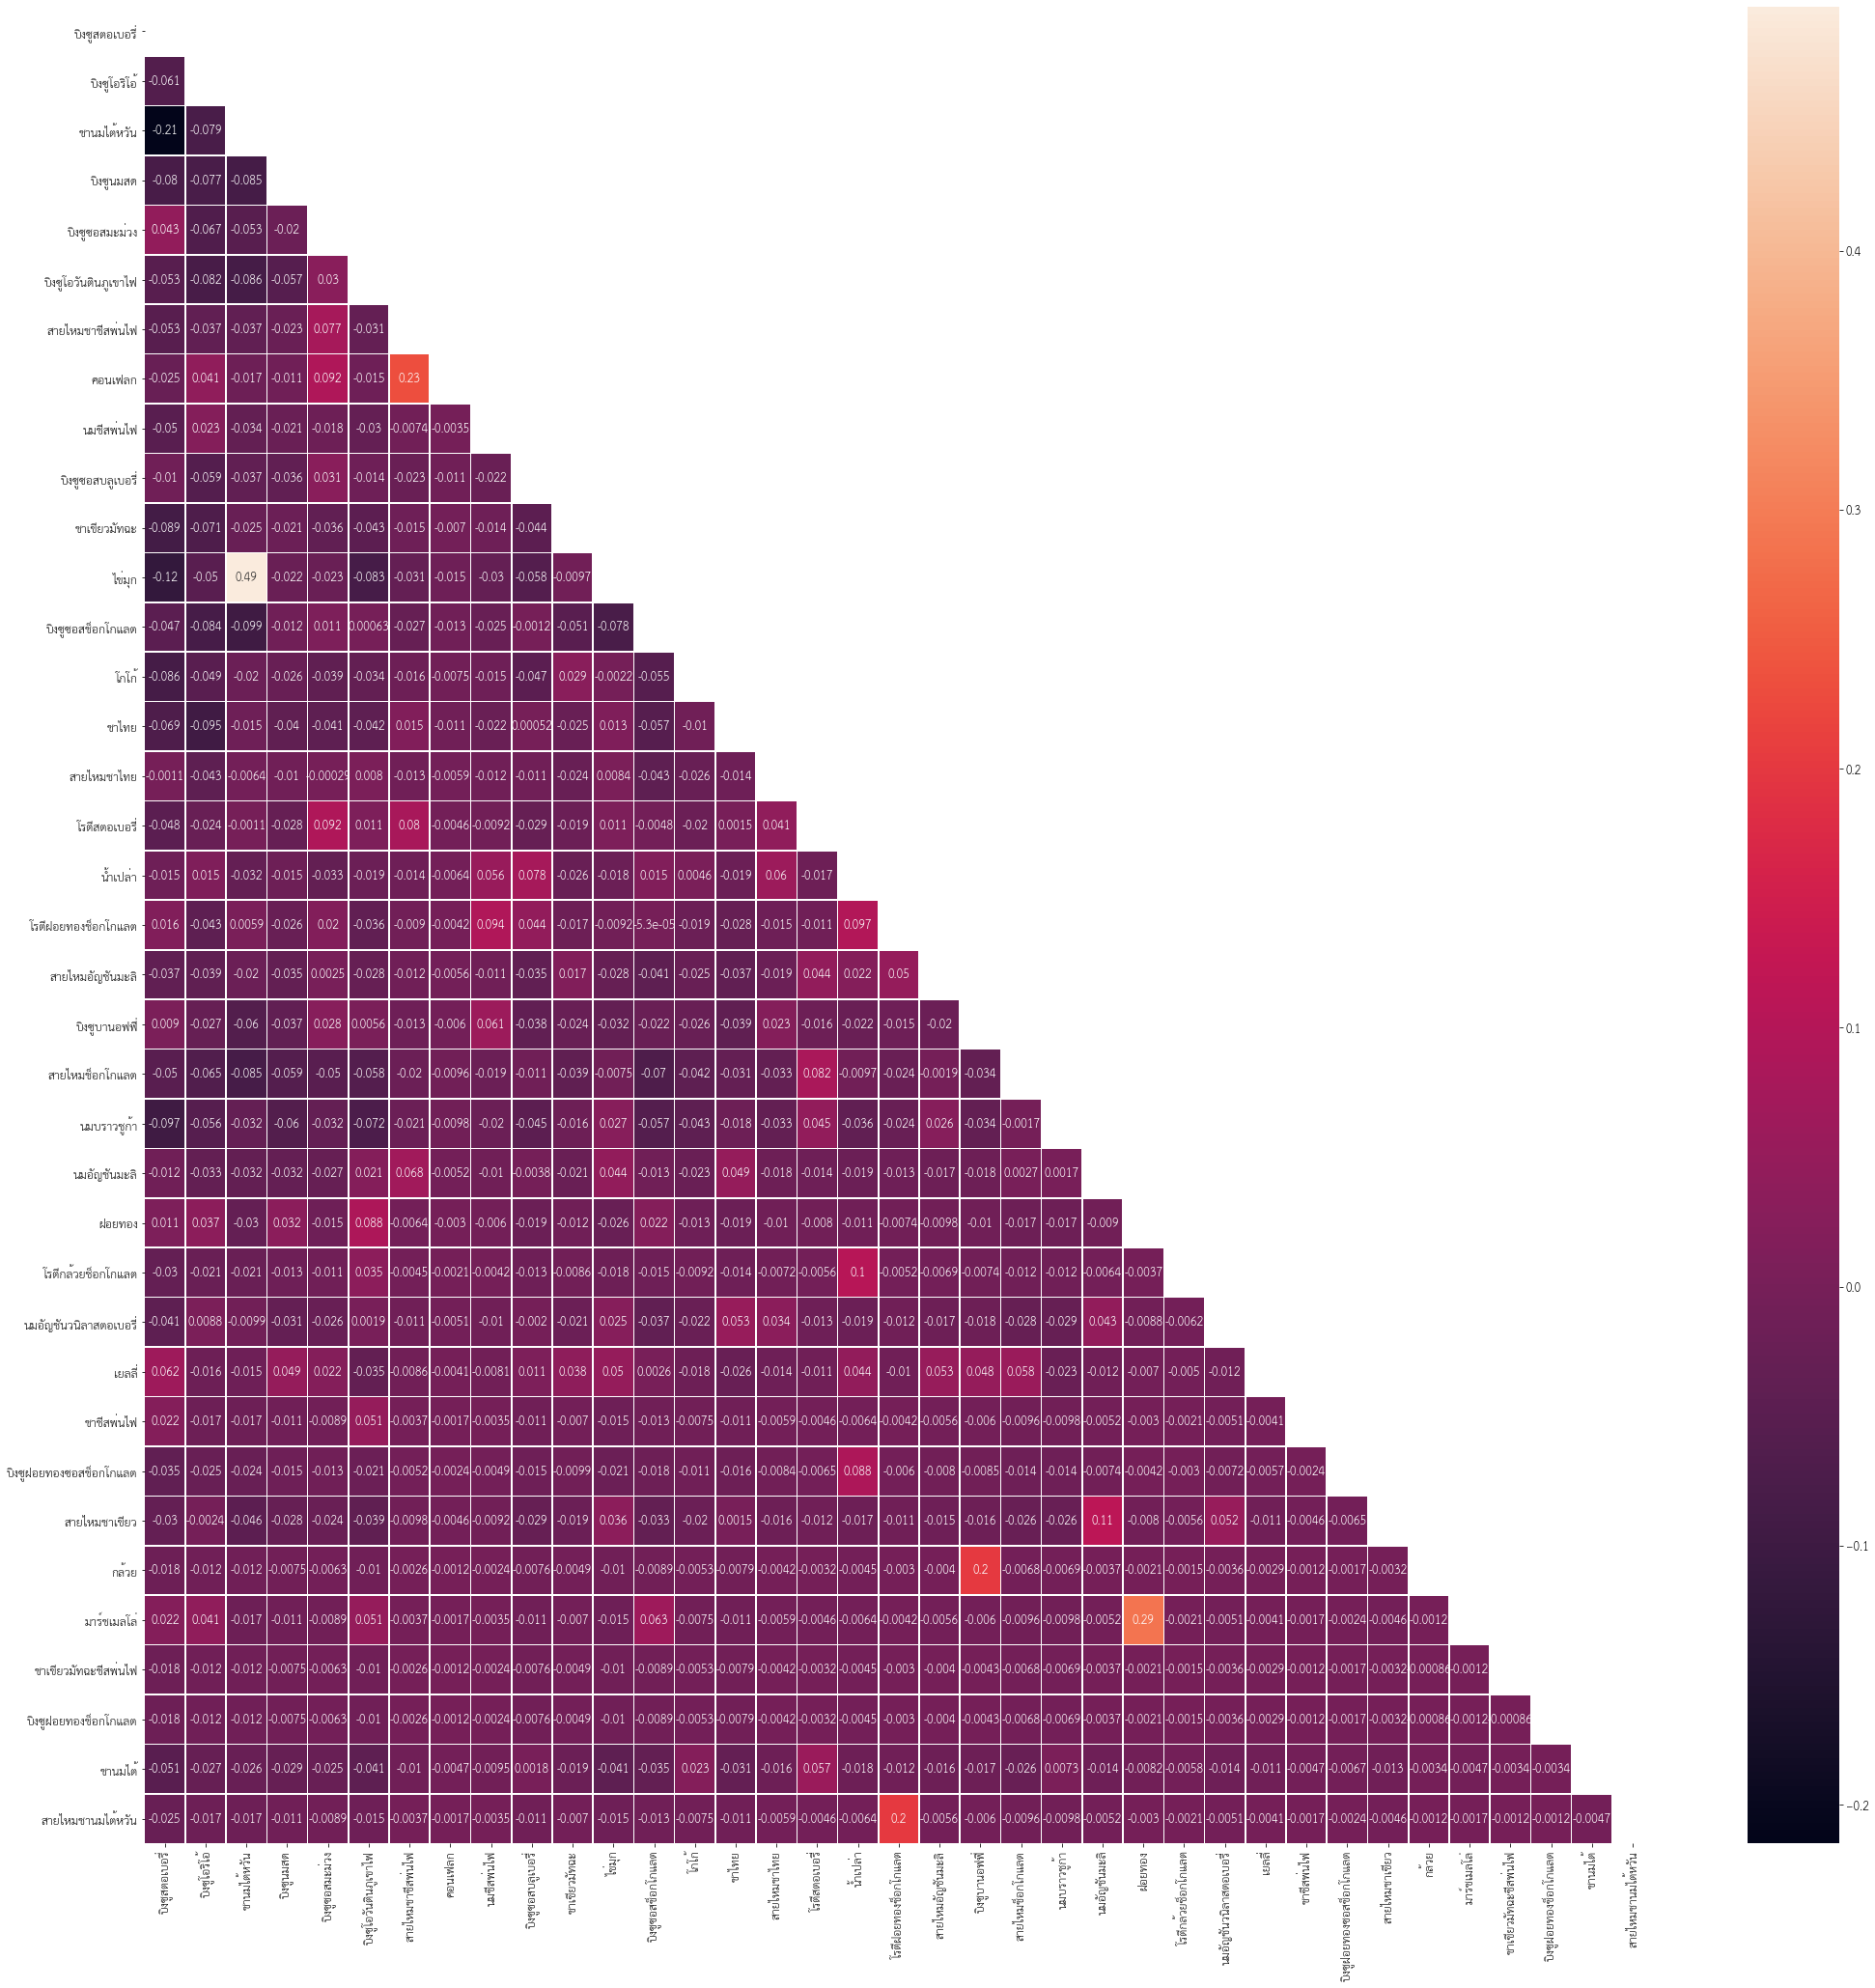

In [866]:
import seaborn as sns
mpl.font_manager.fontManager.addfont('/Users/frukkurt/Documents/Business analysis/thsarabunnew-webfont.ttf')
mpl.rc('font',family='TH Sarabun New',size=12)
fig, ax = plt.subplots(figsize=(35,35)) 
matrix = np.triu(corrMatrix)
ax = sns.heatmap(corrMatrix, annot=True, linewidths=.6, ax=ax,mask=matrix)
#ax = sns.heatmap(corrMatrix, annot=True, linewidths=.6, ax=ax)

In [597]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_low_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

def get_High_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(transaction_count_df, 10))
print("")

print("low  Correlations")
print(get_low_correlations(transaction_count_df, 10))

print("")

print("High  Correlations")
print(get_High_correlations(transaction_count_df, 10))#0.553508

Top Absolute Correlations
ชานมไต้หวัน          ไข่มุก                0.494272
ฝอยทอง               มาร์ชเมลโล่           0.286681
สายไหมชาชีสพ่นไฟ     คอนเฟลก               0.233156
บิงซูสตอเบอรี่       ชานมไต้หวัน           0.214921
บิงซูบานอฟฟี่        กล้วย                 0.202092
โรตีฝอยทองช็อกโกแลต  สายไหมชานมไต้หวัน     0.201122
บิงซูสตอเบอรี่       ไข่มุก                0.119793
นมอัญชันมะลิ         สายไหมชาเขียว         0.113895
น้ำเปล่า             โรตีกล้วยช็อกโกแลต    0.104723
ชานมไต้หวัน          บิงซูซอสช็อกโกแลต     0.098523
dtype: float64

low  Correlations
บิงซูสตอเบอรี่  ชานมไต้หวัน            -0.214921
                ไข่มุก                 -0.119793
ชานมไต้หวัน     บิงซูซอสช็อกโกแลต      -0.098523
บิงซูสตอเบอรี่  นมบราวชูก้า            -0.097286
บิงซูโอริโอ้    ชาไทย                  -0.094609
บิงซูสตอเบอรี่  ชาเขียวมัทฉะ           -0.088910
                โกโก้                  -0.086437
ชานมไต้หวัน     บิงซูโอวันตินภูเขาไฟ   -0.085966
                บิงซูนมสด   

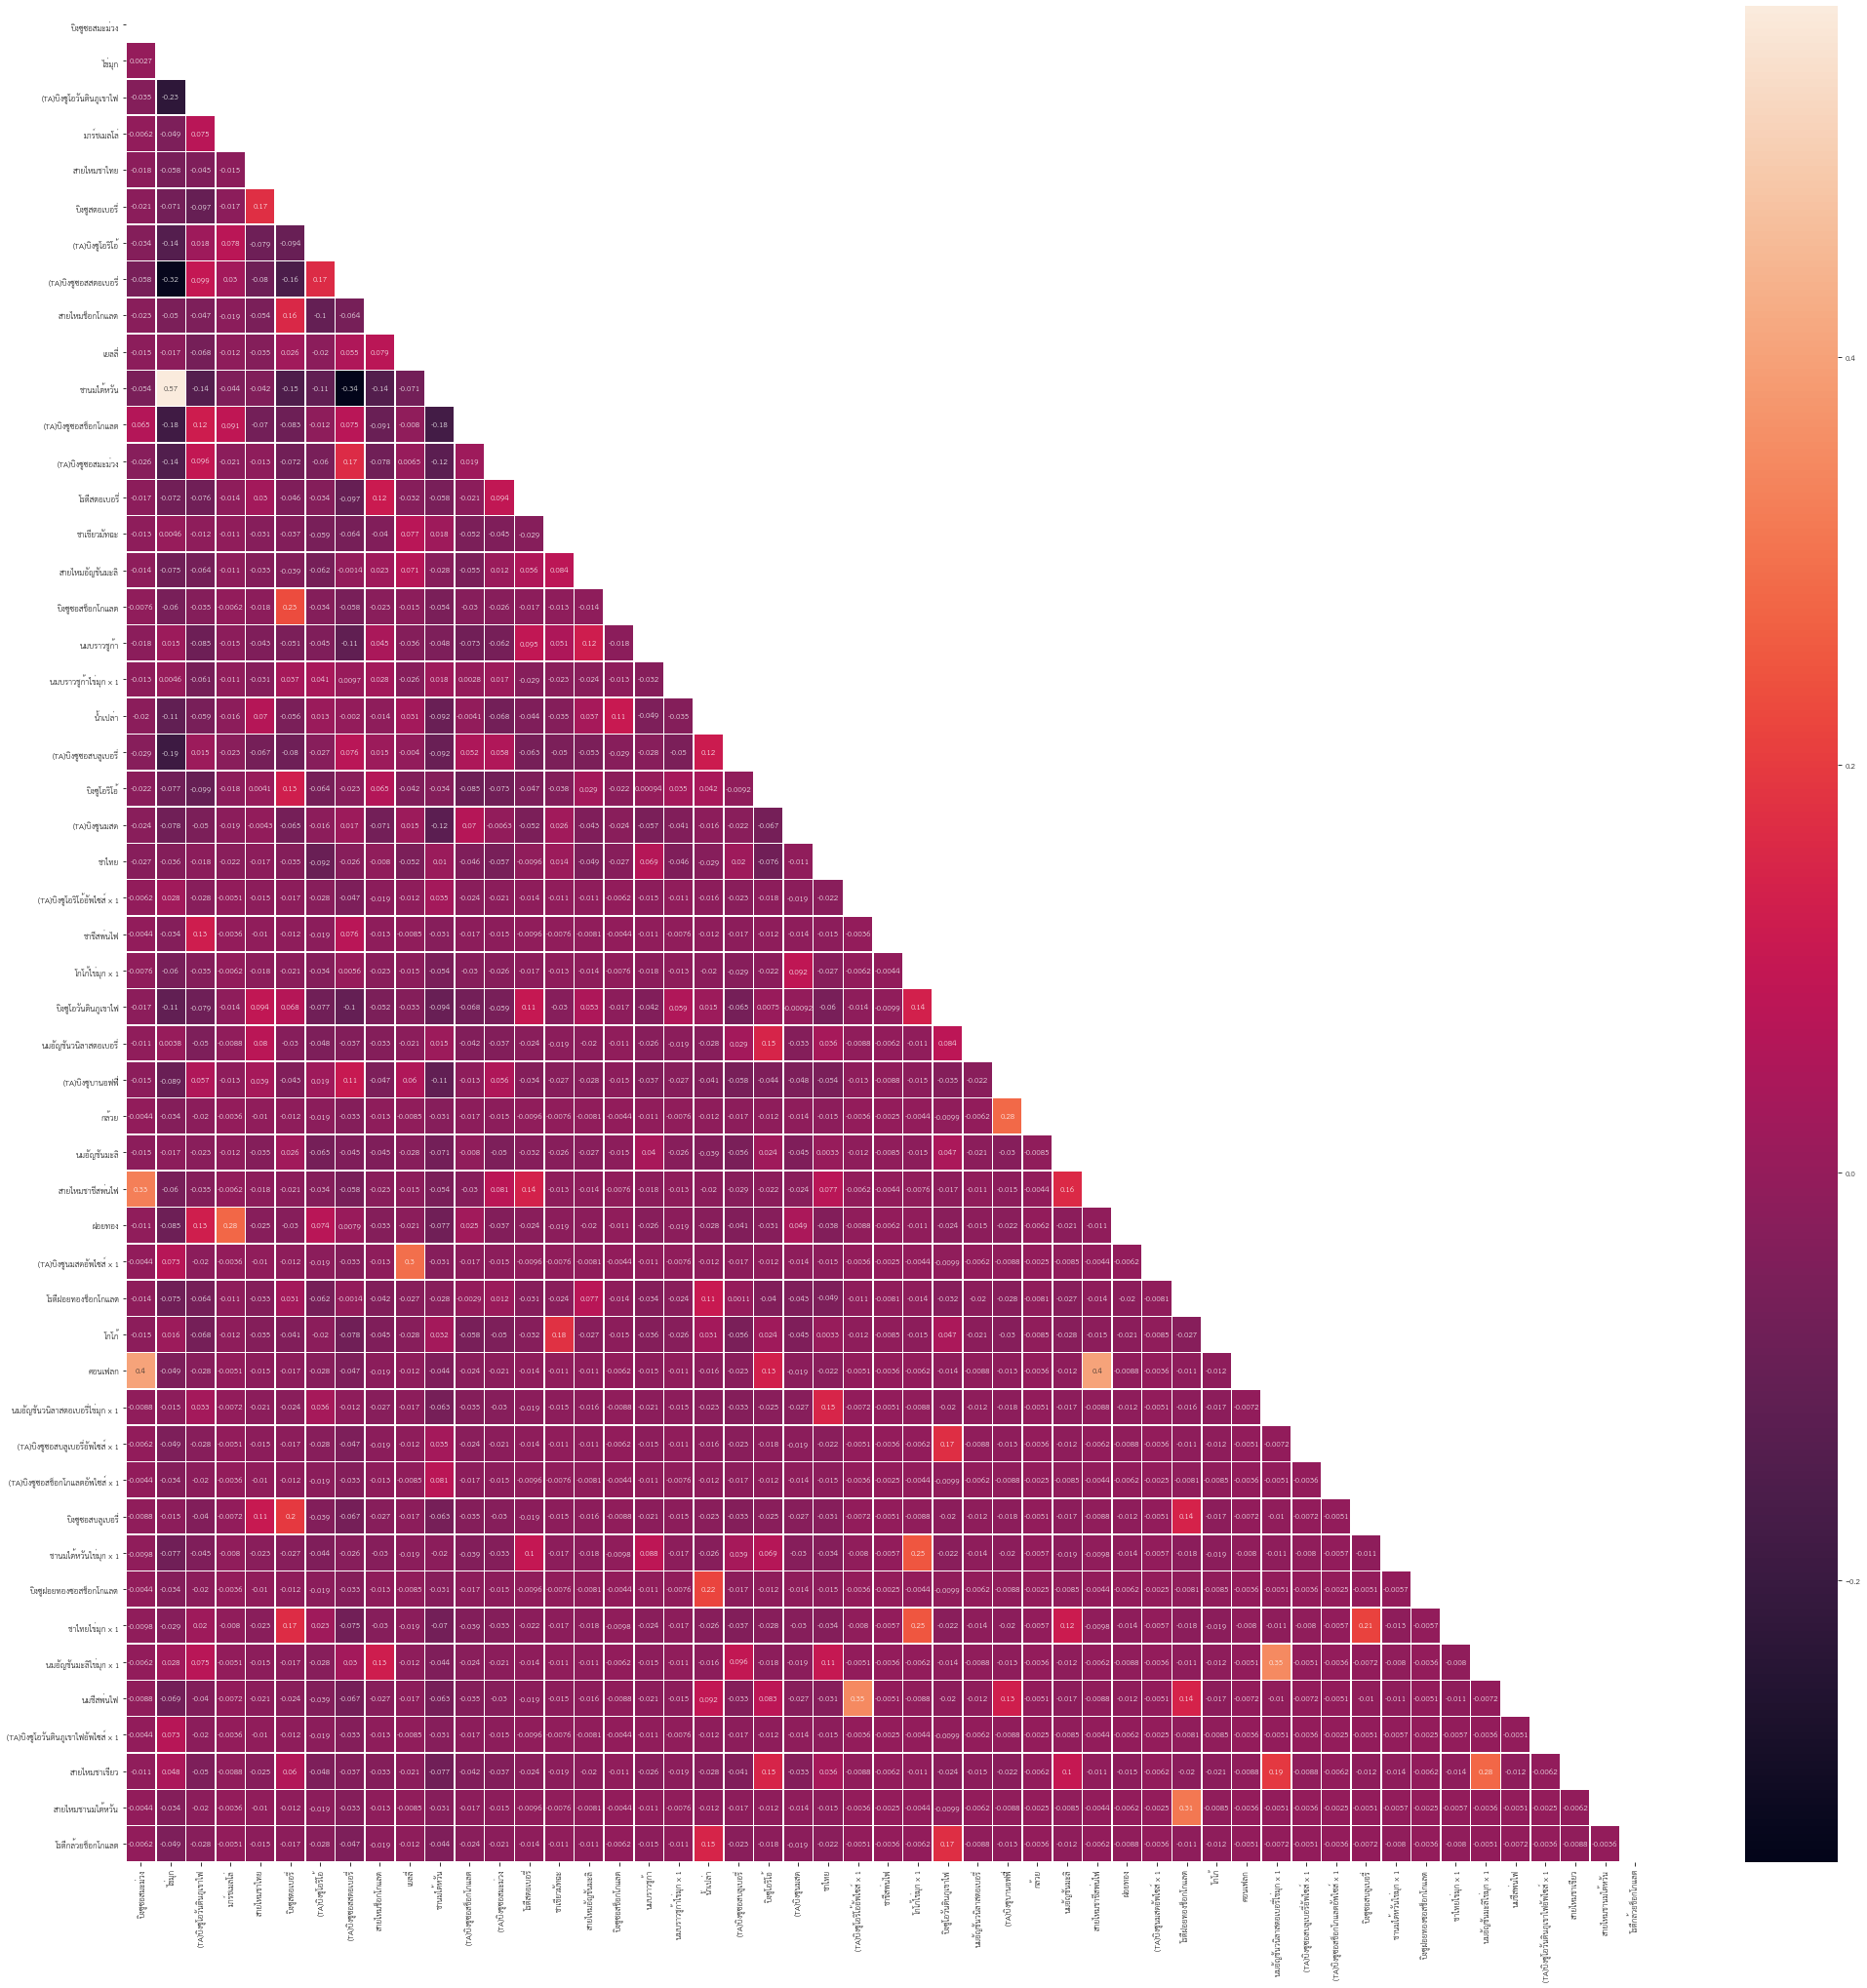

In [598]:
#Group transaction
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="ชื่อเมนู"#NameOfProduct

#transaction_count_df=transaction_count(UserNumber,Quantity,NameOfProduct,group)
transaction_count_df=transaction_matrix(UserNumber,Quantity,NameOfProduct,group)
corrMatrix=transaction_count_df.corr()
fig, ax = plt.subplots(figsize=(35,35)) 
matrix = np.triu(corrMatrix)
ax = sns.heatmap(corrMatrix, annot=True, linewidths=.6, ax=ax,mask=matrix)


In [599]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(transaction_count_df, 10))
print("")

print("low  Correlations")
print(get_low_correlations(transaction_count_df, 10))

print("")

print("High  Correlations")
print(get_High_correlations(transaction_count_df, 10))#0.518774

Top Absolute Correlations
ไข่มุก                            ชานมไต้หวัน                 0.571903
บิงซูซอสมะม่วง                    คอนเฟลก                     0.404636
สายไหมชาชีสพ่นไฟ                  คอนเฟลก                     0.404636
นมอัญชันวนิลาสตอเบอรี่ไข่มุก x 1  นมอัญชันมะลิไข่มุก x 1      0.349079
(TA)บิงซูโอริโอ้อัพไซส์ x 1       นมชีสพ่นไฟ                  0.349079
(TA)บิงซูซอสสตอเบอรี่             ชานมไต้หวัน                 0.337950
บิงซูซอสมะม่วง                    สายไหมชาชีสพ่นไฟ            0.328270
ไข่มุก                            (TA)บิงซูซอสสตอเบอรี่       0.323548
โรตีฝอยทองช็อกโกแลต               สายไหมชานมไต้หวัน           0.312623
เยลลี่                            (TA)บิงซูนมสดอัพไซส์ x 1    0.297690
dtype: float64

low  Correlations
(TA)บิงซูซอสสตอเบอรี่  ชานมไต้หวัน                -0.337950
ไข่มุก                 (TA)บิงซูซอสสตอเบอรี่      -0.323548
                       (TA)บิงซูโอวันตินภูเขาไฟ   -0.227268
                       (TA)บิงซูซอสบลูเบอรี่      

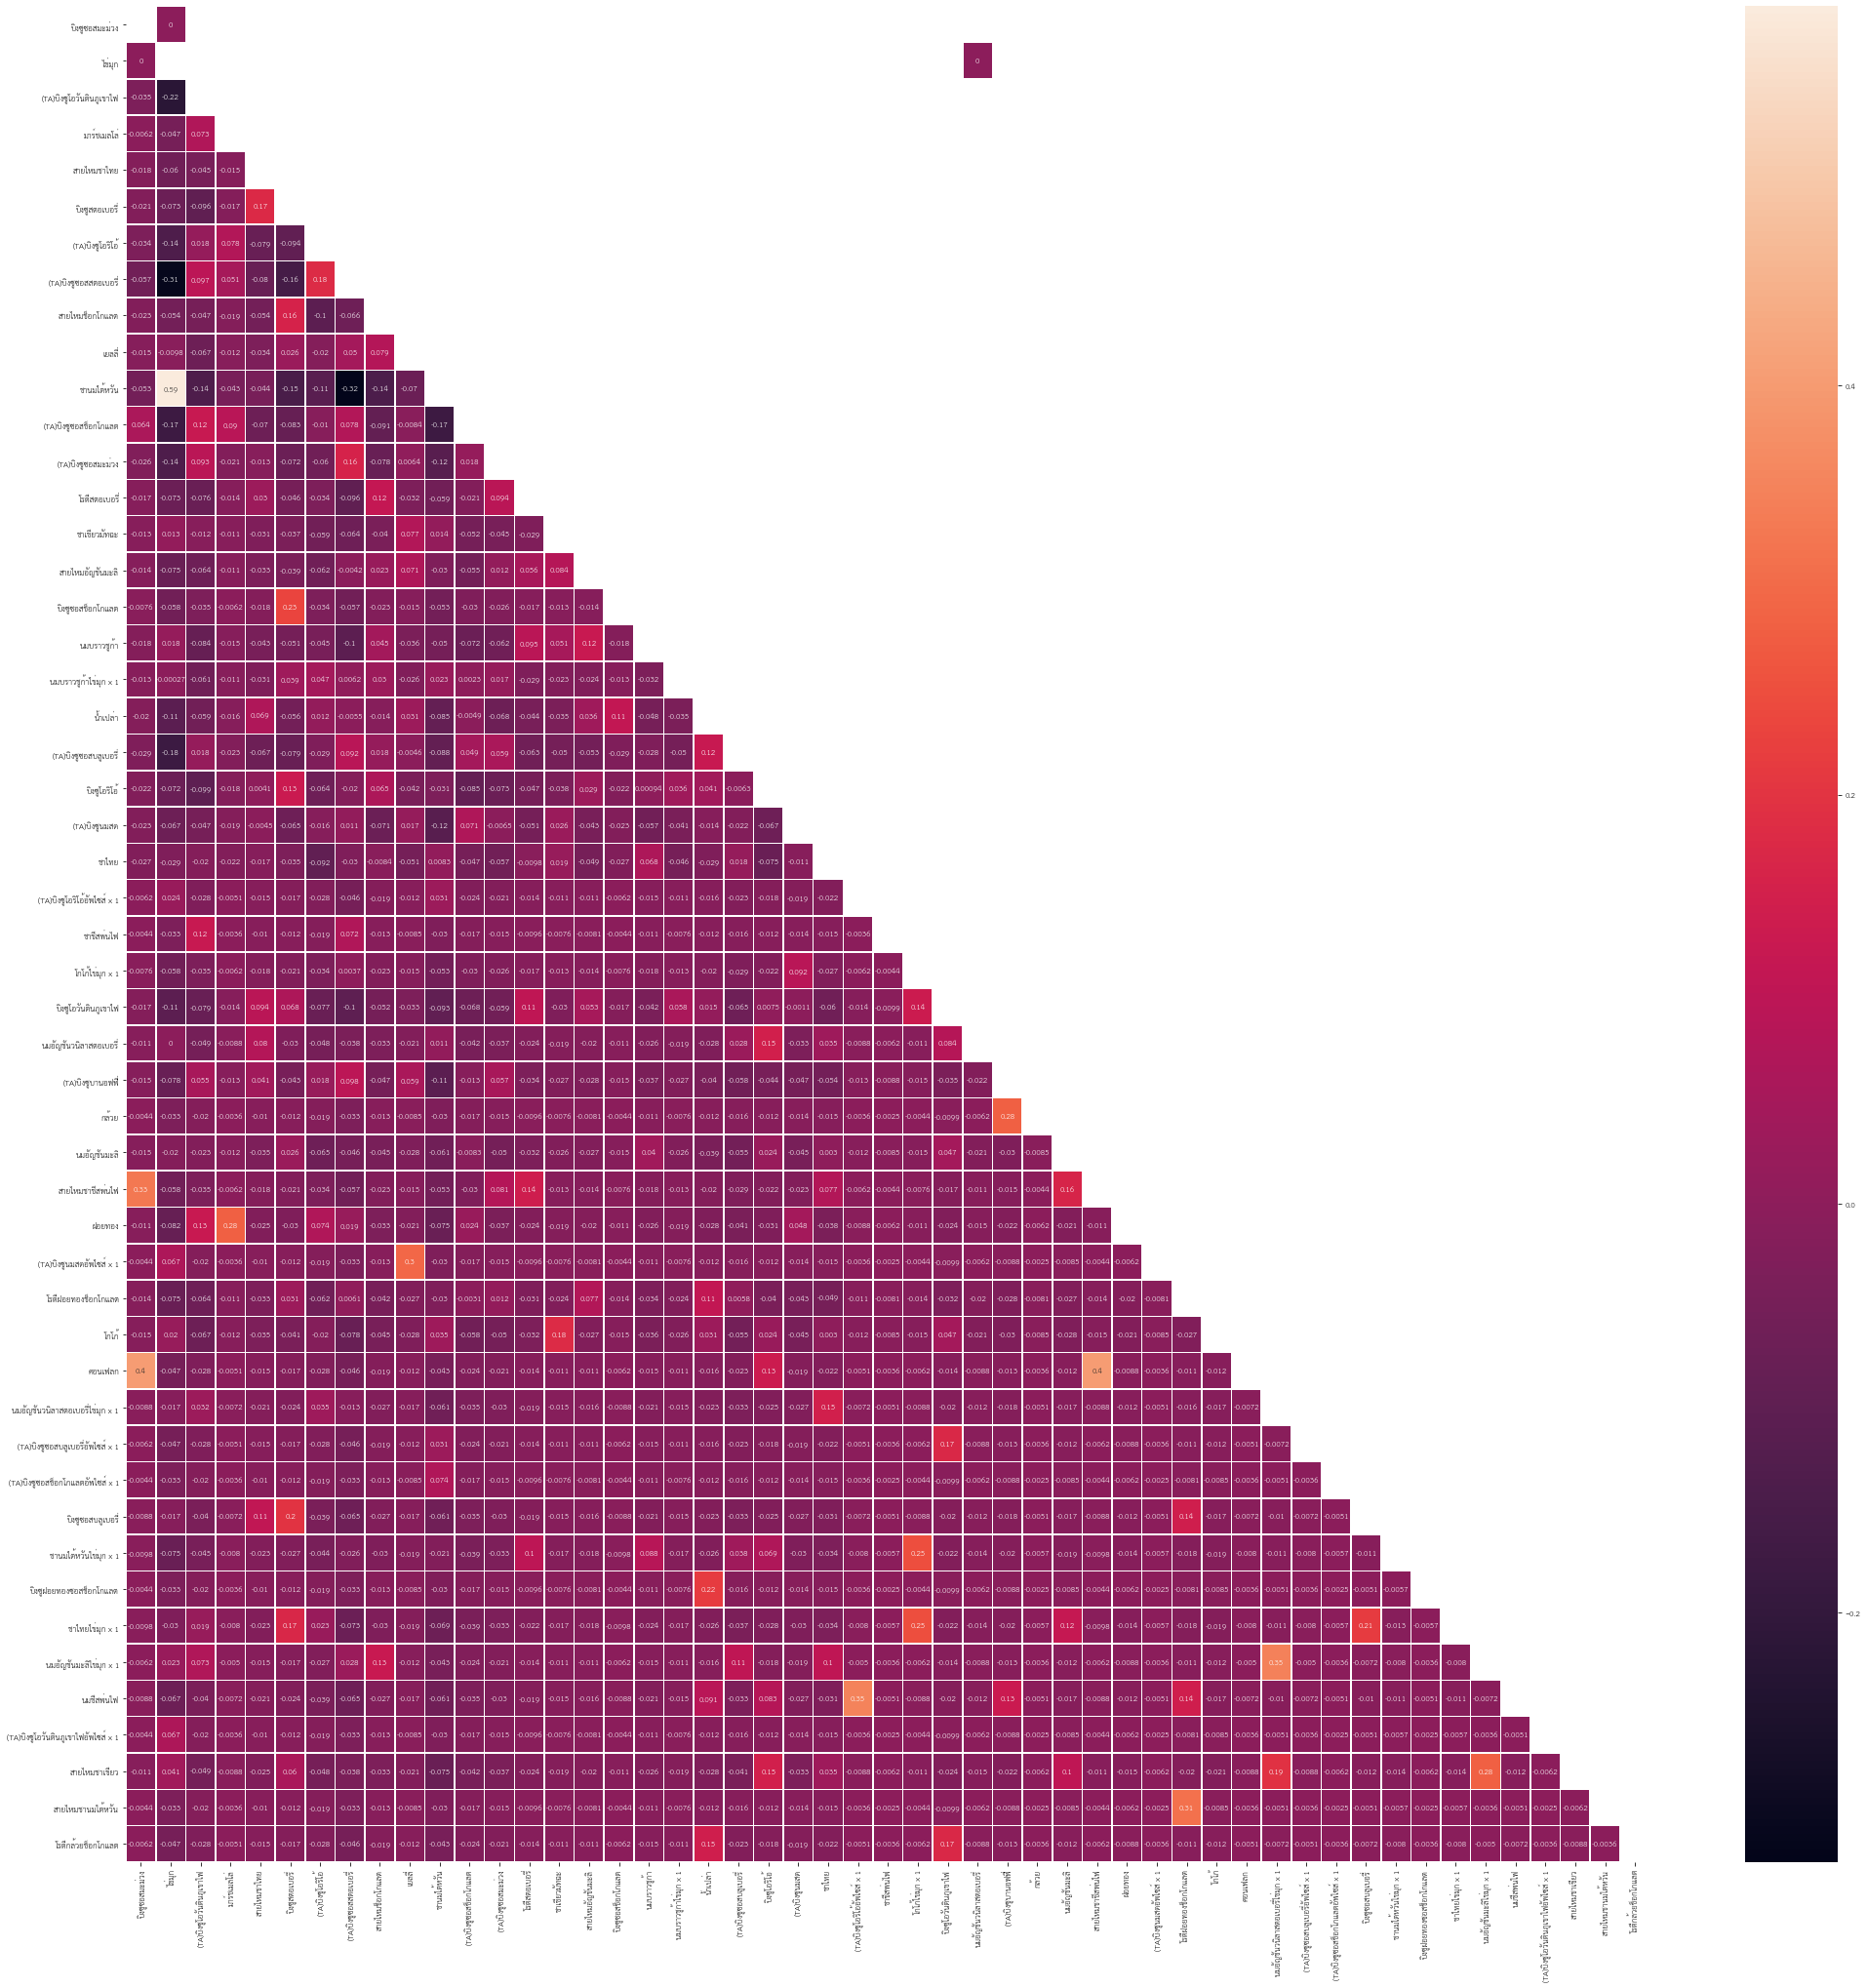

In [600]:
#Group transaction
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="ชื่อเมนู"#NameOfProduct

transaction_count_df=transaction_count(UserNumber,Quantity,NameOfProduct,group)
corrMatrix=transaction_count_df.corr(method='kendall')
fig, ax = plt.subplots(figsize=(35,35)) 
matrix = np.triu(corrMatrix)
ax = sns.heatmap(corrMatrix, annot=True, linewidths=.6, ax=ax,mask=matrix)



In [601]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(transaction_count_df, 10))
print("")

print("low  Correlations")
print(get_low_correlations(transaction_count_df, 10))

print("")

print("High  Correlations")
print(get_High_correlations(transaction_count_df, 10))

Top Absolute Correlations
ไข่มุก                       ชานมไต้หวัน                 0.638449
บิงซูซอสมะม่วง               คอนเฟลก                     0.404636
สายไหมชาชีสพ่นไฟ             คอนเฟลก                     0.404636
(TA)บิงซูโอริโอ้อัพไซส์ x 1  นมชีสพ่นไฟ                  0.349079
บิงซูซอสมะม่วง               สายไหมชาชีสพ่นไฟ            0.328270
โรตีฝอยทองช็อกโกแลต          สายไหมชานมไต้หวัน           0.312623
(TA)บิงซูซอสสตอเบอรี่        ชานมไต้หวัน                 0.293147
ไข่มุก                       (TA)บิงซูซอสสตอเบอรี่       0.288386
มาร์ชเมลโล่                  ฝอยทอง                      0.282817
เยลลี่                       (TA)บิงซูนมสดอัพไซส์ x 1    0.262949
dtype: float64

low  Correlations
(TA)บิงซูซอสสตอเบอรี่     ชานมไต้หวัน                -0.293147
ไข่มุก                    (TA)บิงซูซอสสตอเบอรี่      -0.288386
                          (TA)บิงซูโอวันตินภูเขาไฟ   -0.210664
ชานมไต้หวัน               (TA)บิงซูซอสช็อกโกแลต      -0.166927
ไข่มุก                    (T

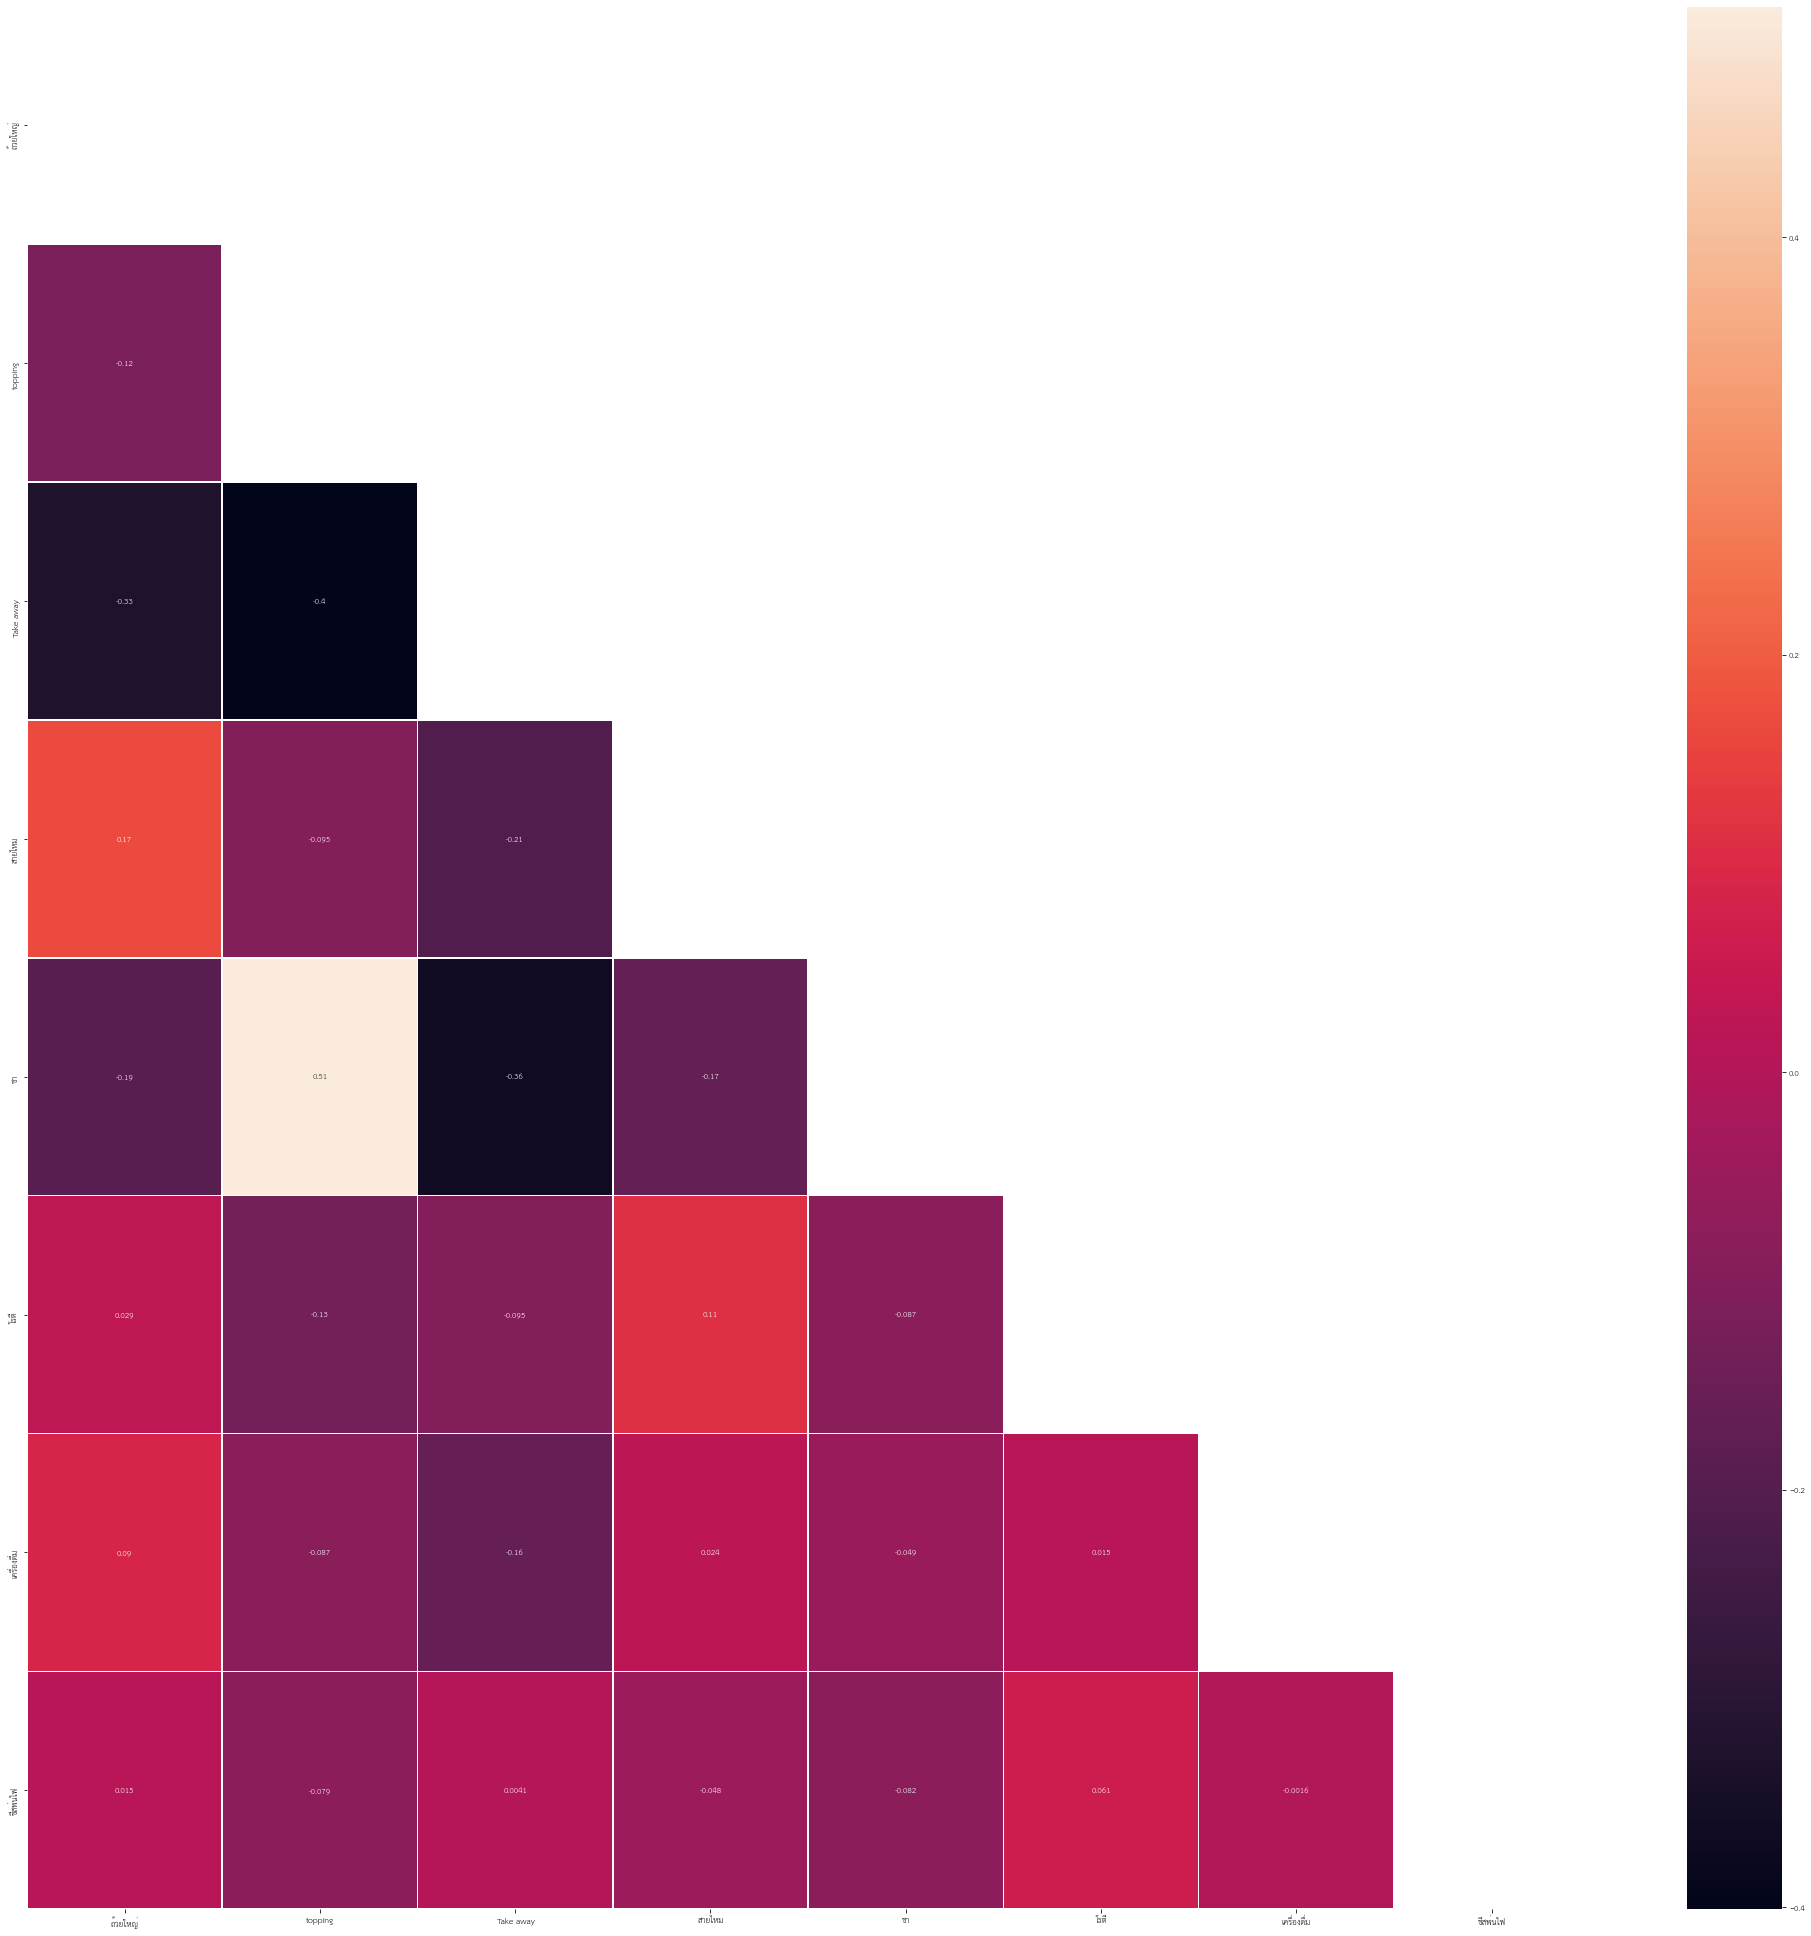

In [602]:
#Group transaction
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="หมวดสินค้า"#NameOfProduct

transaction_count_df=transaction_count(UserNumber,Quantity,NameOfProduct,group)
corrMatrix=transaction_count_df.corr()
fig, ax = plt.subplots(figsize=(35,35)) 
matrix = np.triu(corrMatrix)
ax = sns.heatmap(corrMatrix, annot=True, linewidths=.6, ax=ax,mask=matrix)

In [603]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(transaction_count_df, 10))
print("")

print("low  Correlations")
print(get_low_correlations(transaction_count_df, 10))

print("")

print("High  Correlations")
print(get_High_correlations(transaction_count_df, 10))

Top Absolute Correlations
topping    ชา             0.510357
           Take away      0.400942
Take away  ชา             0.363824
ถ้วยใหญ่   Take away      0.326900
Take away  สายไหม         0.211090
ถ้วยใหญ่   ชา             0.188875
           สายไหม         0.167486
สายไหม     ชา             0.165120
Take away  เครื่องดื่ม    0.160042
topping    โรตี           0.132919
dtype: float64

low  Correlations
topping    Take away     -0.400942
Take away  ชา            -0.363824
ถ้วยใหญ่   Take away     -0.326900
Take away  สายไหม        -0.211090
ถ้วยใหญ่   ชา            -0.188875
สายไหม     ชา            -0.165120
Take away  เครื่องดื่ม   -0.160042
topping    โรตี          -0.132919
ถ้วยใหญ่   topping       -0.118998
Take away  โรตี          -0.095495
dtype: float64

High  Correlations
topping    ชา             0.510357
ถ้วยใหญ่   สายไหม         0.167486
สายไหม     โรตี           0.113328
ถ้วยใหญ่   เครื่องดื่ม    0.089636
โรตี       ชีสพ่นไฟ       0.061475
ถ้วยใหญ่   โรตี           0.02

In [884]:
import networkx as nx
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct


fig, ax = plt.subplots(figsize=(10,10)) 

transaction_count_df=transaction_matrix(UserNumber,Quantity,NameOfProduct,group)
corrMatrix=transaction_count_df.corr()
corr = corrMatrix

# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
print(links)
links.columns = ['var1', 'var2','value']
links
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ ((links['value'] > 0.2) & (links['var1'] != links['var2']) ]
links_filtered
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True,node_color='orange', node_size=200, edge_color='black', linewidths=4,font_family='TH Sarabun New',font_size=12)


SyntaxError: invalid syntax (<ipython-input-884-fc404eee6920>, line 20)

# support correlation


In [944]:
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct
dft=transaction_matrix(UserNumber,Quantity,NameOfProduct,transaction)
dft


,บิงซูสตอเบอรี่,บิงซูโอริโอ้,ชานมไต้หวัน,บิงซูนมสด,บิงซูซอสมะม่วง,บิงซูโอวันตินภูเขาไฟ,สายไหมชาชีสพ่นไฟ,คอนเฟลก,นมชีสพ่นไฟ,บิงซูซอสบลูเบอรี่,...,เยลลี่,ชาชีสพ่นไฟ,บิงซูฝอยทองซอสช็อกโกแลต,สายไหมชาเขียว,กล้วย,มาร์ชเมลโล่,ชาเขียวมัทฉะชีสพ่นไฟ,บิงซูฝอยทองช็อกโกแลต,ชานมไต้,สายไหมชานมไต้หวัน
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [945]:
frequent_itemsets = apriori(dft,min_support=0.01,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules_cor = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.01)

rules_cor.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(ชานมไต้หวัน),(ไข่มุก),0.146299,0.111876,0.071429,0.488235,4.364072,0.055061,1.735415
18,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299
1,(บิงซูสตอเบอรี่),(บิงซูโอริโอ้),0.264200,0.150602,0.030120,0.114007,0.757003,-0.009669,0.958695
0,(บิงซูโอริโอ้),(บิงซูสตอเบอรี่),0.150602,0.264200,0.030120,0.200000,0.757003,-0.009669,0.919750
4,(บิงซูโอวันตินภูเขาไฟ),(บิงซูสตอเบอรี่),0.112737,0.264200,0.022375,0.198473,0.751225,-0.007410,0.917999
5,(บิงซูสตอเบอรี่),(บิงซูโอวันตินภูเขาไฟ),0.264200,0.112737,0.022375,0.084691,0.751225,-0.007410,0.969359
11,(บิงซูสตอเบอรี่),(บิงซูซอสช็อกโกแลต),0.264200,0.083477,0.016351,0.061889,0.741395,-0.005703,0.976988
10,(บิงซูซอสช็อกโกแลต),(บิงซูสตอเบอรี่),0.083477,0.264200,0.016351,0.195876,0.741395,-0.005703,0.915034
6,(บิงซูซอสบลูเบอรี่),(บิงซูสตอเบอรี่),0.062823,0.264200,0.015491,0.246575,0.933292,-0.001107,0.976608
7,(บิงซูสตอเบอรี่),(บิงซูซอสบลูเบอรี่),0.264200,0.062823,0.015491,0.058632,0.933292,-0.001107,0.995548


In [946]:
import math as math
Sup_Cor_a=rules_cor["antecedent support"]
Sup_Cor_c=rules_cor["consequent support"]
Sup_Cor_s=rules_cor["support"]
Sup_cor=[]
for i in range (len(Sup_Cor_a)):
    fi=(Sup_Cor_s[i]-(Sup_Cor_a[i]*Sup_Cor_c[i]))/math.sqrt(Sup_Cor_a[i]*Sup_Cor_c[i]*(1-Sup_Cor_a[i])*(1-Sup_Cor_c[i]))
    Sup_cor.append(fi)
Sup_cor

[-0.061312218444407166,
 -0.06131221844440715,
 0.04312298428869983,
 0.04312298428869983,
 -0.053137346987814825,
 -0.053137346987814825,
 -0.010349361991771706,
 -0.010349361991771704,
 -0.11979330226482163,
 -0.11979330226482164,
 -0.04676642878841813,
 -0.04676642878841813,
 -0.06879177580544471,
 -0.06879177580544471,
 -0.07899442193445082,
 -0.07899442193445082,
 -0.05021477868138806,
 -0.05021477868138806,
 0.4942717461734875,
 0.4942717461734875]

In [947]:
rules_cor["Support_Correlation"]=Sup_cor
rules_cor.sort_values(by='Support_Correlation', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Support_Correlation
19,(ชานมไต้หวัน),(ไข่มุก),0.146299,0.111876,0.071429,0.488235,4.364072,0.055061,1.735415,0.494272
18,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299,0.494272
2,(บิงซูซอสมะม่วง),(บิงซูสตอเบอรี่),0.043890,0.264200,0.015491,0.352941,1.335888,0.003895,1.137146,0.043123
3,(บิงซูสตอเบอรี่),(บิงซูซอสมะม่วง),0.264200,0.043890,0.015491,0.058632,1.335888,0.003895,1.015660,0.043123
7,(บิงซูสตอเบอรี่),(บิงซูซอสบลูเบอรี่),0.264200,0.062823,0.015491,0.058632,0.933292,-0.001107,0.995548,-0.010349
6,(บิงซูซอสบลูเบอรี่),(บิงซูสตอเบอรี่),0.062823,0.264200,0.015491,0.246575,0.933292,-0.001107,0.976608,-0.010349
11,(บิงซูสตอเบอรี่),(บิงซูซอสช็อกโกแลต),0.264200,0.083477,0.016351,0.061889,0.741395,-0.005703,0.976988,-0.046766
10,(บิงซูซอสช็อกโกแลต),(บิงซูสตอเบอรี่),0.083477,0.264200,0.016351,0.195876,0.741395,-0.005703,0.915034,-0.046766
16,(ไข่มุก),(บิงซูโอริโอ้),0.111876,0.150602,0.011188,0.100000,0.664000,-0.005661,0.943775,-0.050215
17,(บิงซูโอริโอ้),(ไข่มุก),0.150602,0.111876,0.011188,0.074286,0.664000,-0.005661,0.959393,-0.050215


# BUNDLE

Text(0, 0.5, 'Support_Correlation')

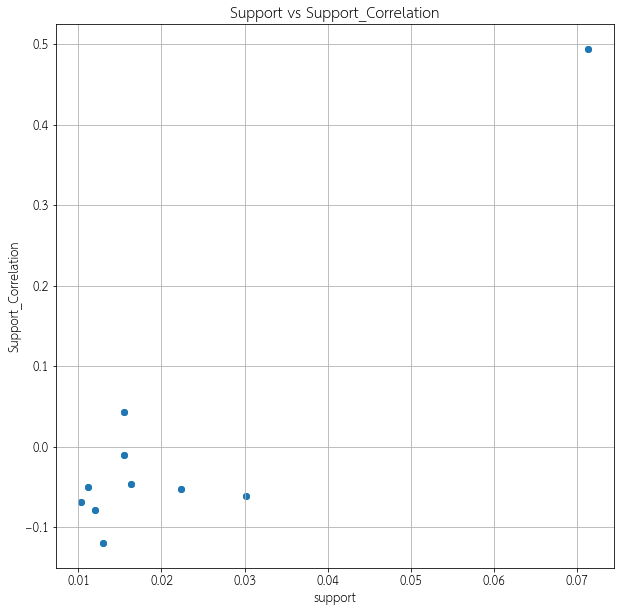

In [948]:
plt.figure(figsize=(10,10))

plt.scatter(rules_cor["support"],rules_cor["Support_Correlation"])
plt.grid()
plt.title('Support vs Support_Correlation') 
plt.xlabel('support')
plt.ylabel('Support_Correlation')

In [949]:
xx1=rules_cor["support"]
zz1=rules_cor["Support_Correlation"]
inputPoint=np.zeros(shape=(len(xx1),2))
ii=0
for i in xx1.index :
    xxx=xx1[i]
    zzz=zz1[i]
    inputPoint[ii]=[xxx,zzz]
    ii=ii+1
inputPoints=inputPoint.tolist()

    
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates)


print ("*"*8 + " non-dominated answers " + ("*"*8))
for p in paretoPoints:
    print (p)

print("Pareto Front")
print(paretoPoints)


y=xx1
z=zz1

idxx=[]
for i in y.index:
    xxx1=y[i]
    xxx2=z[i]
    xxx3=(xxx1,xxx2)in paretoPoints
    #print(xxx3,i)
    if xxx3 == True :
        idxx.append(i)

print(idxx)
print("len",len(idxx))       
print(rules_cor.iloc[idxx][:])

******** non-dominated answers ********
(0.07142857142857142, 0.4942717461734875)
Pareto Front
{(0.07142857142857142, 0.4942717461734875)}
[18, 19]
len 2
      antecedents    consequents  antecedent support  consequent support  \
18       (ไข่มุก)  (ชานมไต้หวัน)            0.111876            0.146299   
19  (ชานมไต้หวัน)       (ไข่มุก)            0.146299            0.111876   

     support  confidence      lift  leverage  conviction  Support_Correlation  
18  0.071429    0.638462  4.364072  0.055061    2.361299             0.494272  
19  0.071429    0.488235  4.364072  0.055061    1.735415             0.494272  


In [950]:
rules_cor.iloc[idxx][:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Support_Correlation
18,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299,0.494272
19,(ชานมไต้หวัน),(ไข่มุก),0.146299,0.111876,0.071429,0.488235,4.364072,0.055061,1.735415,0.494272


Text(0, 0.5, 'Support_Correlation')

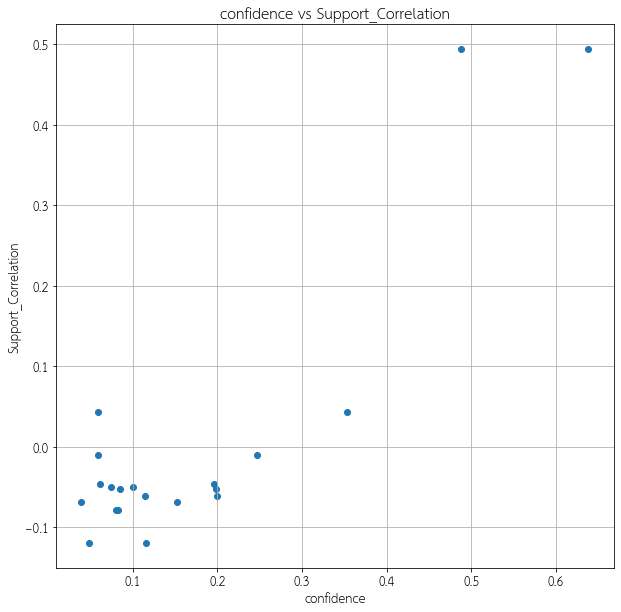

In [951]:
plt.figure(figsize=(10,10))

plt.scatter(rules_cor["confidence"],rules_cor["Support_Correlation"])
plt.grid()
plt.title('confidence vs Support_Correlation') 
plt.xlabel('confidence')
plt.ylabel('Support_Correlation')

In [952]:
xx1=rules_cor["confidence"]
zz1=rules_cor["Support_Correlation"]
inputPoint=np.zeros(shape=(len(xx1),2))
ii=0
for i in xx1.index :
    xxx=xx1[i]
    zzz=zz1[i]
    inputPoint[ii]=[xxx,zzz]
    ii=ii+1
inputPoints=inputPoint.tolist()

    
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates)

print ("*"*8 + " non-dominated answers " + ("*"*8))
for p in paretoPoints:
    print (p)

print("Pareto Front")
print(paretoPoints)


y=xx1
z=zz1

idxx=[]
for i in y.index:
    xxx1=y[i]
    xxx2=z[i]
    xxx3=(xxx1,xxx2)in paretoPoints
    #print(xxx3,i)
    if xxx3 == True :
        idxx.append(i)

print(idxx)
print("len",len(idxx))       
print(rules_cor.iloc[idxx][:])

******** non-dominated answers ********
(0.6384615384615384, 0.4942717461734875)
Pareto Front
{(0.6384615384615384, 0.4942717461734875)}
[18]
len 1
   antecedents    consequents  antecedent support  consequent support  \
18    (ไข่มุก)  (ชานมไต้หวัน)            0.111876            0.146299   

     support  confidence      lift  leverage  conviction  Support_Correlation  
18  0.071429    0.638462  4.364072  0.055061    2.361299             0.494272  


In [953]:
rules_cor.iloc[idxx][:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Support_Correlation
18,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299,0.494272


Text(0, 0.5, 'Support_Correlation')

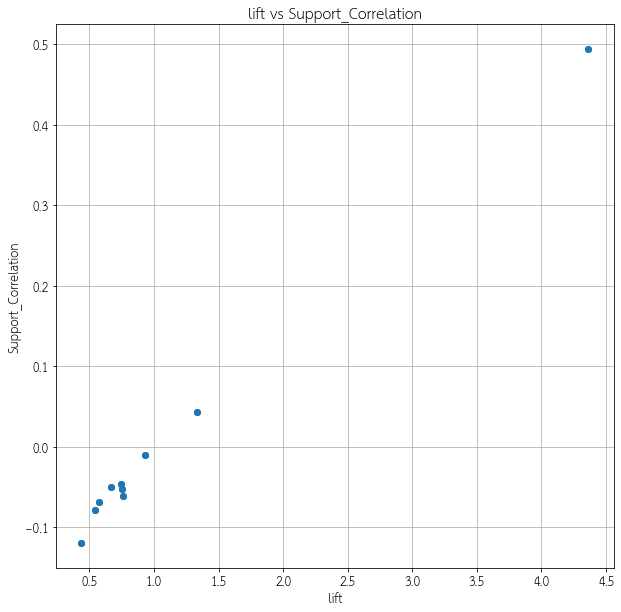

In [954]:
plt.figure(figsize=(10,10))

plt.scatter(rules_cor["lift"],rules_cor["Support_Correlation"])
plt.grid()
plt.title('lift vs Support_Correlation') 
plt.xlabel('lift')
plt.ylabel('Support_Correlation')

In [955]:
xx1=rules_cor["lift"]
zz1=rules_cor["Support_Correlation"]
inputPoint=np.zeros(shape=(len(xx1),2))
ii=0
for i in xx1.index :
    xxx=xx1[i]
    zzz=zz1[i]
    inputPoint[ii]=[xxx,zzz]
    ii=ii+1
inputPoints=inputPoint.tolist()

    
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates)

print ("*"*8 + " non-dominated answers " + ("*"*8))
for p in paretoPoints:
    print (p)

print("Pareto Front")
print(paretoPoints)


y=xx1
z=zz1

idxx=[]
for i in y.index:
    xxx1=y[i]
    xxx2=z[i]
    xxx3=(xxx1,xxx2)in paretoPoints
    #print(xxx3,i)
    if xxx3 == True :
        idxx.append(i)

print(idxx)
print("len",len(idxx))       
print(rules_cor.iloc[idxx][:])

******** non-dominated answers ********
(4.364072398190045, 0.4942717461734875)
Pareto Front
{(4.364072398190045, 0.4942717461734875)}
[18, 19]
len 2
      antecedents    consequents  antecedent support  consequent support  \
18       (ไข่มุก)  (ชานมไต้หวัน)            0.111876            0.146299   
19  (ชานมไต้หวัน)       (ไข่มุก)            0.146299            0.111876   

     support  confidence      lift  leverage  conviction  Support_Correlation  
18  0.071429    0.638462  4.364072  0.055061    2.361299             0.494272  
19  0.071429    0.488235  4.364072  0.055061    1.735415             0.494272  


In [956]:
rules_cor.iloc[idxx][:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Support_Correlation
18,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299,0.494272
19,(ชานมไต้หวัน),(ไข่มุก),0.146299,0.111876,0.071429,0.488235,4.364072,0.055061,1.735415,0.494272


# Unbundle

In [905]:
UserNumber="หมายเลขใบเสร็จ / ID"#UserNumber
Quantity="จำนวน"#Quantity
NameOfProduct="R_menu"#NameOfProduct
dft=transaction_matrix(UserNumber,Quantity,NameOfProduct,transaction)

frequent_itemsets = apriori(dft,min_support=0.000000001,use_colnames=True)
#frequent_itemsets = apriori(Transaction_matrix_df,use_colnames=True)
rules_cor = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.01)

rules_cor.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
96,(ไข่มุก),(ชานมไต้หวัน),0.111876,0.146299,0.071429,0.638462,4.364072,0.055061,2.361299
97,(ชานมไต้หวัน),(ไข่มุก),0.146299,0.111876,0.071429,0.488235,4.364072,0.055061,1.735415
0,(บิงซูโอริโอ้),(บิงซูสตอเบอรี่),0.150602,0.264200,0.030120,0.200000,0.757003,-0.009669,0.919750
1,(บิงซูสตอเบอรี่),(บิงซูโอริโอ้),0.264200,0.150602,0.030120,0.114007,0.757003,-0.009669,0.958695
8,(บิงซูโอวันตินภูเขาไฟ),(บิงซูสตอเบอรี่),0.112737,0.264200,0.022375,0.198473,0.751225,-0.007410,0.917999
...,...,...,...,...,...,...,...,...,...
997,"(ไข่มุก, ชานมไต้หวัน)",(โรตีสตอเบอรี่),0.071429,0.012048,0.000861,0.012048,1.000000,0.000000,1.000000
996,(สายไหมชาไทย),"(ไข่มุก, ชานมไต้หวัน)",0.019793,0.071429,0.000861,0.043478,0.608696,-0.000553,0.970779
995,"(ชานมไต้หวัน, สายไหมชาไทย)",(ไข่มุก),0.002582,0.111876,0.000861,0.333333,2.979487,0.000572,1.332186
994,"(ไข่มุก, สายไหมชาไทย)",(ชานมไต้หวัน),0.002582,0.146299,0.000861,0.333333,2.278431,0.000483,1.280551


In [906]:
Sup_Cor_a=rules_cor["antecedent support"]
Sup_Cor_c=rules_cor["consequent support"]
Sup_Cor_s=rules_cor["support"]
Sup_cor=[]
for i in range (len(Sup_Cor_a)):
    fi=(Sup_Cor_s[i]-(Sup_Cor_a[i]*Sup_Cor_c[i]))/math.sqrt(Sup_Cor_a[i]*Sup_Cor_c[i]*(1-Sup_Cor_a[i])*(1-Sup_Cor_c[i]))
    Sup_cor.append(fi)
rules_cor["Support_Correlation"]=Sup_cor
rules_cor.sort_values(by='Support_Correlation', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Support_Correlation
2076,"(มาร์ชเมลโล่, บิงซูโอริโอ้)","(ฝอยทอง, บิงซูซอสช็อกโกแลต, บิงซูสตอเบอรี่)",0.000861,0.000861,0.000861,1.000000,1162.000000,0.000860,inf,1.000000
2069,"(มาร์ชเมลโล่, บิงซูโอริโอ้, บิงซูสตอเบอรี่)","(ฝอยทอง, บิงซูซอสช็อกโกแลต)",0.000861,0.000861,0.000861,1.000000,1162.000000,0.000860,inf,1.000000
2051,"(ชาไทย, สายไหมชาเขียว)","(นมอัญชันวนิลาสตอเบอรี่, นมอัญชันมะลิ)",0.000861,0.000861,0.000861,1.000000,1162.000000,0.000860,inf,1.000000
2146,"(บิงซูสตอเบอรี่, บิงซูซอสช็อกโกแลต, เยลลี่)","(ไข่มุก, บิงซูบานอฟฟี่)",0.000861,0.000861,0.000861,1.000000,1162.000000,0.000860,inf,1.000000
2065,"(บิงซูโอริโอ้, ฝอยทอง, บิงซูซอสช็อกโกแลต)","(มาร์ชเมลโล่, บิงซูสตอเบอรี่)",0.000861,0.000861,0.000861,1.000000,1162.000000,0.000860,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
13,(ไข่มุก),(บิงซูสตอเบอรี่),0.111876,0.264200,0.012909,0.115385,0.436733,-0.016649,0.831774,-0.119793
14,(บิงซูสตอเบอรี่),(ไข่มุก),0.264200,0.111876,0.012909,0.048860,0.436733,-0.016649,0.933747,-0.119793
459,"(ไข่มุก, ชานมไต้หวัน)",(บิงซูสตอเบอรี่),0.071429,0.264200,0.002582,0.036145,0.136808,-0.016290,0.763393,-0.143457
3,(บิงซูสตอเบอรี่),(ชานมไต้หวัน),0.264200,0.146299,0.005164,0.019544,0.133589,-0.033489,0.870718,-0.214921


Text(0, 0.5, 'Support_Correlation')

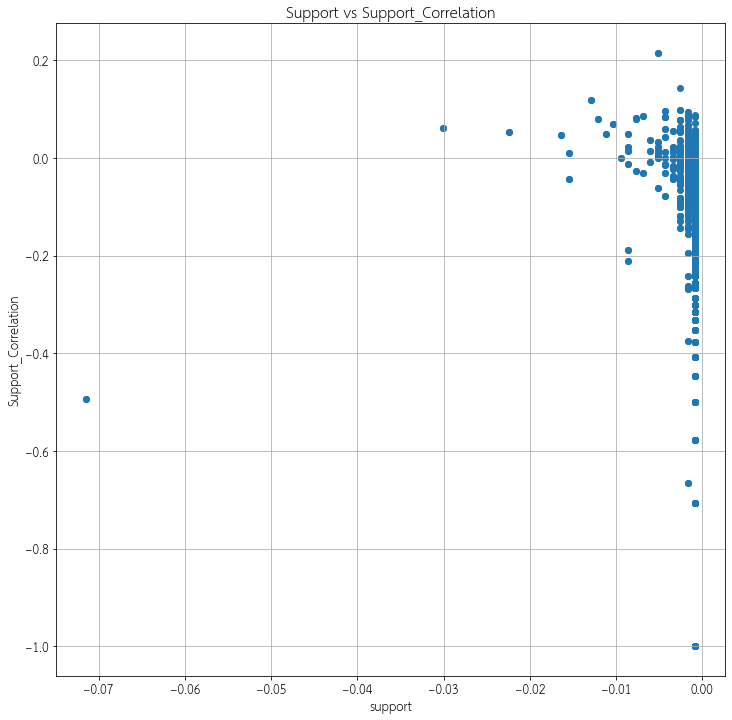

In [908]:
plt.figure(figsize=(12,12))

plt.scatter(rules_cor["support"]*(-1),rules_cor["Support_Correlation"]*(-1))
plt.grid()
plt.title('Support vs Support_Correlation') 
plt.xlabel('support')
plt.ylabel('Support_Correlation')

In [909]:
xx1=rules_cor["support"]
zz1=rules_cor["Support_Correlation"]
inputPoint=np.zeros(shape=(len(xx1),2))
ii=0
for i in xx1.index :
    xxx=xx1[i]*(-1)
    zzz=zz1[i]*(-1)
    inputPoint[ii]=[xxx,zzz]
    ii=ii+1
inputPoints=inputPoint.tolist()

    
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates)


print ("*"*8 + " non-dominated answers " + ("*"*8))
for p in paretoPoints:
    print (p)

print("Pareto Front")
print(paretoPoints)


y=xx1
z=zz1

idxx=[]
for i in y.index:
    xxx1=y[i]*(-1)
    xxx2=z[i]*(-1)
    xxx3=(xxx1,xxx2)in paretoPoints
    #print(xxx3,i)
    if xxx3 == True :
        idxx.append(i)

print(idxx)
print("len",len(idxx))       
print(rules_cor.iloc[idxx][:])

******** non-dominated answers ********
(-0.0008605851979345956, 0.08891022788628)
(-0.0051635111876075735, 0.21492097774384766)
(-0.0025817555938037868, 0.14345706875155168)
(-0.0017211703958691911, 0.0946085156702319)
Pareto Front
{(-0.0008605851979345956, 0.08891022788628), (-0.0051635111876075735, 0.21492097774384766), (-0.0025817555938037868, 0.14345706875155168), (-0.0017211703958691911, 0.0946085156702319)}
[2, 12, 64, 459]
len 4
               antecedents       consequents  antecedent support  \
2            (ชานมไต้หวัน)  (บิงซูสตอเบอรี่)            0.146299   
12          (ชาเขียวมัทฉะ)  (บิงซูสตอเบอรี่)            0.027539   
64          (บิงซูโอริโอ้)           (ชาไทย)            0.150602   
459  (ไข่มุก, ชานมไต้หวัน)  (บิงซูสตอเบอรี่)            0.071429   

     consequent support   support  confidence      lift  leverage  conviction  \
2              0.264200  0.005164    0.035294  0.133589 -0.033489    0.762720   
12             0.264200  0.000861    0.031250  0.118282 

In [910]:
rules_cor.iloc[idxx][:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Support_Correlation
2,(ชานมไต้หวัน),(บิงซูสตอเบอรี่),0.146299,0.264200,0.005164,0.035294,0.133589,-0.033489,0.762720,-0.214921
12,(ชาเขียวมัทฉะ),(บิงซูสตอเบอรี่),0.027539,0.264200,0.000861,0.031250,0.118282,-0.006415,0.759536,-0.088910
64,(บิงซูโอริโอ้),(ชาไทย),0.150602,0.067986,0.001721,0.011429,0.168101,-0.008518,0.942788,-0.094609
459,"(ไข่มุก, ชานมไต้หวัน)",(บิงซูสตอเบอรี่),0.071429,0.264200,0.002582,0.036145,0.136808,-0.016290,0.763393,-0.143457


Text(0, 0.5, 'Support_Correlation')

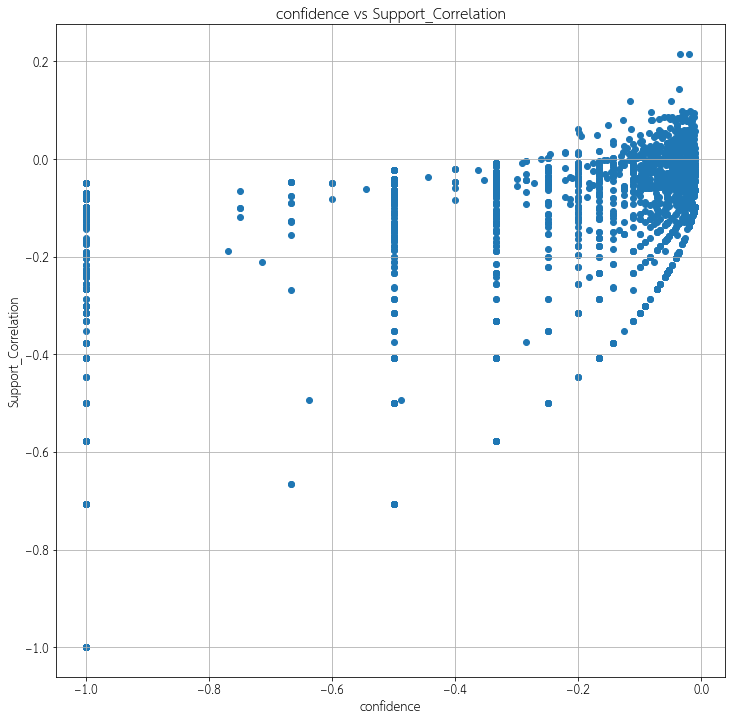

In [911]:
plt.figure(figsize=(12,12))

plt.scatter(rules_cor["confidence"]*(-1),rules_cor["Support_Correlation"]*(-1))
plt.grid()
plt.title('confidence vs Support_Correlation') 
plt.xlabel('confidence')
plt.ylabel('Support_Correlation')

In [912]:
xx1=rules_cor["confidence"]
zz1=rules_cor["Support_Correlation"]
inputPoint=np.zeros(shape=(len(xx1),2))
ii=0
for i in xx1.index :
    xxx=xx1[i]*(-1)
    zzz=zz1[i]*(-1)
    inputPoint[ii]=[xxx,zzz]
    ii=ii+1
inputPoints=inputPoint.tolist()

    
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates)


print ("*"*8 + " non-dominated answers " + ("*"*8))
for p in paretoPoints:
    print (p)

print("Pareto Front")
print(paretoPoints)


y=xx1
z=zz1

idxx=[]
for i in y.index:
    xxx1=y[i]*(-1)
    xxx2=z[i]*(-1)
    xxx3=(xxx1,xxx2)in paretoPoints
    #print(xxx3,i)
    if xxx3 == True :
        idxx.append(i)

print(idxx)
print("len",len(idxx))       
print(rules_cor.iloc[idxx][:])

******** non-dominated answers ********
(-0.017647058823529415, 0.09852262920507901)
(-0.010309278350515465, 0.05708621821043114)
(-0.016286644951140065, 0.09728610979283192)
(-0.03529411764705883, 0.21492097774384766)
(-0.01954397394136808, 0.2149209777438476)
(-0.011428571428571429, 0.0946085156702319)
Pareto Front
{(-0.017647058823529415, 0.09852262920507901), (-0.010309278350515465, 0.05708621821043114), (-0.016286644951140065, 0.09728610979283192), (-0.03529411764705883, 0.21492097774384766), (-0.01954397394136808, 0.2149209777438476), (-0.011428571428571429, 0.0946085156702319)}
[2, 3, 33, 64, 98, 294]
len 6
             antecedents          consequents  antecedent support  \
2          (ชานมไต้หวัน)     (บิงซูสตอเบอรี่)            0.146299   
3       (บิงซูสตอเบอรี่)        (ชานมไต้หวัน)            0.264200   
33      (บิงซูสตอเบอรี่)        (นมบราวชูก้า)            0.264200   
64        (บิงซูโอริโอ้)              (ชาไทย)            0.150602   
98         (ชานมไต้หวัน)  (บิงซูซ

In [913]:
rules_cor.iloc[idxx][:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Support_Correlation
2,(ชานมไต้หวัน),(บิงซูสตอเบอรี่),0.146299,0.264200,0.005164,0.035294,0.133589,-0.033489,0.762720,-0.214921
3,(บิงซูสตอเบอรี่),(ชานมไต้หวัน),0.264200,0.146299,0.005164,0.019544,0.133589,-0.033489,0.870718,-0.214921
33,(บิงซูสตอเบอรี่),(นมบราวชูก้า),0.264200,0.052496,0.004303,0.016287,0.310247,-0.009566,0.963191,-0.097286
64,(บิงซูโอริโอ้),(ชาไทย),0.150602,0.067986,0.001721,0.011429,0.168101,-0.008518,0.942788,-0.094609
98,(ชานมไต้หวัน),(บิงซูซอสช็อกโกแลต),0.146299,0.083477,0.002582,0.017647,0.211401,-0.009631,0.932988,-0.098523
294,(บิงซูซอสช็อกโกแลต),(นมบราวชูก้า),0.083477,0.052496,0.000861,0.010309,0.196383,-0.003522,0.957374,-0.057086


Text(0, 0.5, 'Support_Correlation')

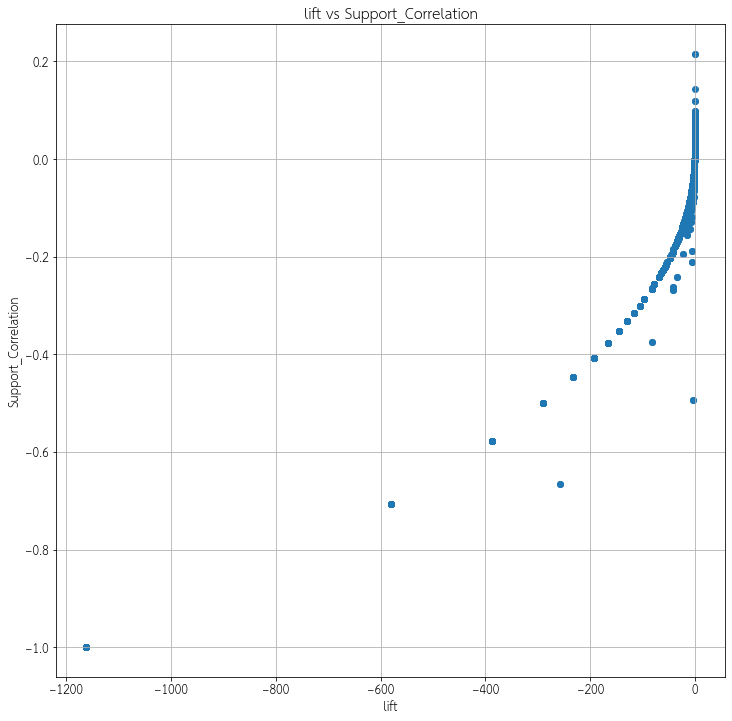

In [914]:
plt.figure(figsize=(12,12))

plt.scatter(rules_cor["lift"]*(-1),rules_cor["Support_Correlation"]*(-1))
plt.grid()
plt.title('lift vs Support_Correlation') 
plt.xlabel('lift')
plt.ylabel('Support_Correlation')

In [915]:
xx1=rules_cor["lift"]
zz1=rules_cor["Support_Correlation"]
inputPoint=np.zeros(shape=(len(xx1),2))
ii=0
for i in xx1.index :
    xxx=xx1[i]*(-1)
    zzz=zz1[i]*(-1)
    inputPoint[ii]=[xxx,zzz]
    ii=ii+1
inputPoints=inputPoint.tolist()

    
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates)


print ("*"*8 + " non-dominated answers " + ("*"*8))
for p in paretoPoints:
    print (p)

print("Pareto Front")
print(paretoPoints)


y=xx1
z=zz1

idxx=[]
for i in y.index:
    xxx1=y[i]*(-1)
    xxx2=z[i]*(-1)
    xxx3=(xxx1,xxx2)in paretoPoints
    #print(xxx3,i)
    if xxx3 == True :
        idxx.append(i)

print(idxx)
print("len",len(idxx))       
print(rules_cor.iloc[idxx][:])

******** non-dominated answers ********
(-0.13358881011688065, 0.2149209777438476)
(-0.13358881011688067, 0.21492097774384766)
(-0.11585244267198405, 0.08465090892511394)
(-0.11828175895765473, 0.08891022788628)
Pareto Front
{(-0.13358881011688065, 0.2149209777438476), (-0.13358881011688067, 0.21492097774384766), (-0.11585244267198405, 0.08465090892511394), (-0.11828175895765473, 0.08891022788628)}
[2, 3, 12, 114]
len 4
           antecedents       consequents  antecedent support  \
2        (ชานมไต้หวัน)  (บิงซูสตอเบอรี่)            0.146299   
3     (บิงซูสตอเบอรี่)     (ชานมไต้หวัน)            0.264200   
12      (ชาเขียวมัทฉะ)  (บิงซูสตอเบอรี่)            0.027539   
114  (สายไหมช็อกโกแลต)     (ชานมไต้หวัน)            0.050775   

     consequent support   support  confidence      lift  leverage  conviction  \
2              0.264200  0.005164    0.035294  0.133589 -0.033489    0.762720   
3              0.146299  0.005164    0.019544  0.133589 -0.033489    0.870718   
12          

In [916]:
rules_cor.iloc[idxx][:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Support_Correlation
2,(ชานมไต้หวัน),(บิงซูสตอเบอรี่),0.146299,0.264200,0.005164,0.035294,0.133589,-0.033489,0.762720,-0.214921
3,(บิงซูสตอเบอรี่),(ชานมไต้หวัน),0.264200,0.146299,0.005164,0.019544,0.133589,-0.033489,0.870718,-0.214921
12,(ชาเขียวมัทฉะ),(บิงซูสตอเบอรี่),0.027539,0.264200,0.000861,0.031250,0.118282,-0.006415,0.759536,-0.088910
114,(สายไหมช็อกโกแลต),(ชานมไต้หวัน),0.050775,0.146299,0.000861,0.016949,0.115852,-0.006568,0.868419,-0.084651
